In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, LogNorm, ListedColormap
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import seaborn as sns
import h5py
import warnings
warnings.filterwarnings('ignore')

fontsize = 14

fig_dir = 'figs/'



In [3]:
### get results from WCU reevaluation, after recauculating Pareto set with original 5 objs from MOO
# results = pd.read_csv('../results_arx/infra_wcu/objs_wcu_pareto_5objs_coarse.csv', sep=', ')
results = pd.read_csv('../results_arx/infra_wcu/objs_wcu_pareto_5objs.csv', sep=', ')

### map all costs >1000 to 1000 for visual clarity
for c in ['cog_wp_p90','cog_wp_p50','cog_p_p90','cog_p_p50']:
    results.loc[results[c] > 1000, c] = 1000
results

results.loc[results['label'] == 'soln2']

,label,proj,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,share_PRT,...,share_OTL,share_OFK,cwg_p,ap_p,cwg_np,cog_wp_p90,n_p,cog_wp_p50,cog_p_p90,cog_p_p50
129,soln2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,48.81738,19.822239,-12.647172,78.094915,3,62.339247,64.527984,51.815153


In [4]:
shares = results.loc[:,['share' in c for c in results.columns]]
objs = results.iloc[:, -8:]
objs['proj'] = results['proj']
print(shares.columns)
print(objs.columns)

Index(['share_FRS', 'share_COF', 'share_TUL', 'share_KWD', 'share_EXE',
       'share_LDS', 'share_LND', 'share_PRT', 'share_LWT', 'share_TPD',
       'share_SAU', 'share_TBA', 'share_PIX', 'share_DLE', 'share_KRT',
       'share_SSJ', 'share_SFW', 'share_NKN', 'share_ARV', 'share_DLR',
       'share_ID4', 'share_SMI', 'share_TJC', 'share_BLR', 'share_LHL',
       'share_BDM', 'share_WRM', 'share_COB', 'share_BVA', 'share_CWO',
       'share_HML', 'share_KND', 'share_RRB', 'share_CNS', 'share_ALT',
       'share_CWC', 'share_MAD', 'share_SOC', 'share_SOB', 'share_CCA',
       'share_OTL', 'share_OFK'],
      dtype='object')
Index(['cwg_p', 'ap_p', 'cwg_np', 'cog_wp_p90', 'n_p', 'cog_wp_p50',
       'cog_p_p90', 'cog_p_p50', 'proj'],
      dtype='object')


In [5]:
ef_results = pd.read_csv('../results_arx/infra_wcu/objs_wcu_pareto_5objs_coarse_withBaselines.csv', sep=', ').iloc[-3:,:]
### map all costs >1000 to 1000 for visual clarity
for c in ['cog_wp_p90','cog_wp_p50','cog_p_p90','cog_p_p50']:
    ef_results.loc[ef_results[c] > 1000, c] = 1000
    
ef_shares = ef_results.loc[:,['share' in c for c in ef_results.columns]]
ef_objs = ef_results.iloc[:, -8:]
ef_objs['proj'] = ef_results['proj']

In [6]:
ef_results

,label,proj,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,share_PRT,...,share_OTL,share_OFK,cwg_p,ap_p,cwg_np,cog_wp_p90,n_p,cog_wp_p50,cog_p_p90,cog_p_p50
96,friant16,1.0,0.02289,0.061623,0.073846,0.0,0.017611,0.028244,0.040608,0.025589,...,0.000000,0.075813,50.793163,40.140243,-0.592862,1000.000000,16,1000.000000,71.834523,50.754024
97,alt3,3.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,77.502383,40.984979,6.211429,113.757334,3,86.769882,84.238906,66.701589
98,alt8,3.0,0.00000,0.000000,0.022338,0.0,0.000000,0.000000,0.000000,0.000000,...,0.149274,0.000000,44.914626,25.288021,2.640060,1000.000000,8,300.739962,243.816583,105.374187


In [60]:
# sns.pairplot(objs, hue='proj', vars=['cwg_p', 'ap_p', 'cwg_np', 'cog_wp_p90', 'n_p'])
# sns.pairplot(objs, hue='proj', vars=['cwg_p', 'ap_p', 'cwg_np', 'cog_wp_p50', 'n_p'])
# sns.pairplot(objs, hue='proj', vars=['cwg_p', 'ap_p', 'cwg_np', 'cog_p_p90', 'n_p'])
# sns.pairplot(objs, hue='proj', vars=['cwg_p', 'ap_p', 'cwg_np', 'cog_p_p50', 'n_p'])
# sns.pairplot(objs, hue='proj', vars=['cwg_p', 'ap_p', 'cwg_np', 'n_p', 'cog_wp_p90', 'cog_wp_p50', 'cog_p_p90', 'cog_p_p50'])

In [7]:
### get list of solns to highlight
# results.loc[results['n_p'] == results['n_p'].max(),:]  ## soln196
# results.loc[results['cwg_p'] == results['cwg_p'].max(),:]  ## soln1224
# results.loc[results['cog_wp_p90'] == results['cog_wp_p90'].min(),:]  ## soln2



# ### get satisficing condition
thres_cwg_np = 0
thres_cog = 150
thres_np = 8

# thres_cwg_np = 0
# thres_cog = 200
# thres_np = -1

# satisfice = np.logical_and(np.logical_and(results['cwg_np'] >= thres_cwg_np, 
#                                           results['cog_wp_p90'] <= thres_cog), 
#                            results['n_p'] >= thres_np)

# # satisfice = results['cog_wp_p90'] <= 100

# results.loc[satisfice].loc[results.loc[satisfice]['ap_p'] == results.loc[satisfice]['ap_p'].max()] ## soln599

# thres_np = ef_results['n_p'].loc[ef_results['label']=='friant16'].iloc[0]
# thres_cwg_p = ef_results['cwg_p'].loc[ef_results['label'] == 'friant16'].iloc[0]
# thres_ap_p = ef_results['ap_p'].loc[ef_results['label'] == 'friant16'].iloc[0]
# thres_cwg_np = ef_results['cwg_np'].loc[ef_results['label'] == 'friant16'].iloc[0]
# thres_cog = ef_results['cog_wp_p90'].loc[ef_results['label'] == 'friant16'].iloc[0]
# satisfice = np.logical_and(np.logical_and(np.logical_and(np.logical_and(results['n_p'] >= thres_np, results['cwg_p'] >= thres_cwg_p),
#                                                          results['ap_p'] >= thres_ap_p),
#                                           results['cwg_np'] >= thres_cwg_np),
#                            results['cog_wp_p90'] <= thres_cog)

# results.loc[satisfice].loc[results.loc[satisfice]['cog_wp_p90'] == results.loc[satisfice]['cog_wp_p90'].min()] ## soln599


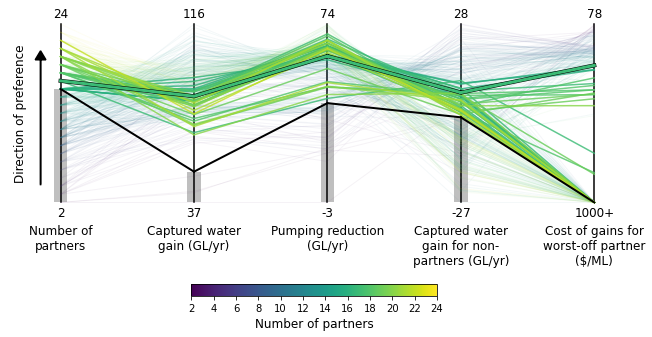

In [8]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

### reorganize for parallel coordinate plot
curvy = False
fontsize=12

cost_type = 'cog_wp_p90'
color_by = 'n_p'   # 'n_p','proj'

fig_stage = 13   # 0 = axes only, 1 = friant16 only, 2 = friant16+alt3+alt8, 3 = all w/ hilite friant16+alt3+alt8,
                #       4 = all w/ hilite friant16
                #       5 = all brushed except friant16+alt3+alt8, 
                #       6 = all except friant16+alt3+alt8,
                #       7 = all w/ hilite maxs+compromise, 
                #       8 = all brushed except satisfice - n_p
                #       9 = all brushed except satisfice - cog_wp
                #       10 = all brushed except satisfice - cwg_np
                #       11 = all brushed except satisfice - cwg_p & a_p
                #       12 = all brushed except satisfice - old compromise soln
                #       13 = all brushed except satisfice - better than or equal to friant on all objectives
        
ideal = 'top'

cols = ['n_p', 'cwg_p', 'ap_p', 'cwg_np', cost_type]
# cost_type_labels = {'cog_wp_p90': 'p90 Cost for\nworst-off partner\n($/ML)',
#                    'cog_wp_p50': 'Median cost of gains,\nworst-off\npartner\n($/ML)',
#                    'cog_p_p90': '90%ile cost of gains,\npartnership\n($/ML)',
#                    'cog_p_p50': 'Median cost of gains,\npartnership\n($/ML)'}
cost_type_labels = {'cog_wp_p90': 'Cost of gains for\nworst-off partner\n($/ML)'}

### get satisficing if brushing
if fig_stage == 8:
    thres_np = 20
    satisfice = results['n_p'] >= thres_np
elif fig_stage == 9:
    thres_cog = 150
    satisfice = results['cog_wp_p90'] <= thres_cog
elif fig_stage == 10:
    thres_cwg_np = 0
    satisfice = results['cwg_np'] >= thres_cwg_np
elif fig_stage == 11:
    thres_cwg_p = 95
    thres_ap_p = 55
    satisfice = np.logical_and(results['cwg_p'] >= thres_cwg_p, results['ap_p'] >= thres_ap_p)
elif fig_stage == 12:
    thres_cwg_np = 0
    thres_cog = 150
    thres_np = 8
    satisfice = np.logical_and(np.logical_and(results['cwg_np'] >= thres_cwg_np, 
                                              results['cog_wp_p90'] <= thres_cog), 
                               results['n_p'] >= thres_np)
elif fig_stage == 13:
    thres_np = ef_results['n_p'].loc[ef_results['label']=='friant16'].iloc[0]
    thres_cwg_p = ef_results['cwg_p'].loc[ef_results['label'] == 'friant16'].iloc[0]
    thres_ap_p = ef_results['ap_p'].loc[ef_results['label'] == 'friant16'].iloc[0]
    thres_cwg_np = ef_results['cwg_np'].loc[ef_results['label'] == 'friant16'].iloc[0]
    thres_cog = ef_results['cog_wp_p90'].loc[ef_results['label'] == 'friant16'].iloc[0]
    satisfice = np.logical_and(np.logical_and(np.logical_and(np.logical_and(results['n_p'] >= thres_np, results['cwg_p'] >= thres_cwg_p),
                                                             results['ap_p'] >= thres_ap_p),
                                              results['cwg_np'] >= thres_cwg_np),
                               results['cog_wp_p90'] <= thres_cog)

ressat = results.loc[:,cols]
ressat = ressat.append(ef_results.loc[:,cols])

ideal = 'top'


if ideal == 'bottom':
    tops = ressat.min(axis=0)
    bottoms = ressat.max(axis=0)
    switch = bottoms[-1]
    bottoms[-1] = tops[-1]
    tops[-1] = switch
    ressat.iloc[:, :-1] = (ressat.iloc[:, :-1].max(axis=0) - ressat.iloc[:, :-1]) / (ressat.iloc[:, :-1].max(axis=0) - ressat.iloc[:, :-1].min(axis=0))
    ressat.iloc[:, -1] = (ressat.iloc[:, -1] - ressat.iloc[:, -1].min(axis=0)) / (ressat.iloc[:, -1].max(axis=0) - ressat.iloc[:, -1].min(axis=0))
elif ideal == 'top':
    tops = ressat.max(axis=0)
    bottoms = ressat.min(axis=0)
    switch = bottoms[-1]
    bottoms[-1] = tops[-1]
    tops[-1] = switch
    ressat.iloc[:, -1] = (ressat.iloc[:, -1].max(axis=0) - ressat.iloc[:, -1]) / (ressat.iloc[:, -1].max(axis=0) - ressat.iloc[:, -1].min(axis=0))
    ressat.iloc[:, :-1] = (ressat.iloc[:, :-1] - ressat.iloc[:, :-1].min(axis=0)) / (ressat.iloc[:, :-1].max(axis=0) - ressat.iloc[:, :-1].min(axis=0))
else:
    print('ideal should be "top" or "bottom" based on direction of preference')
    
### parallel coord plot
fig,ax = plt.subplots(1,1,figsize=(11,6), gridspec_kw={'hspace':0.1, 'wspace':0.1})

def get_color(color_by, results, ef_results, row, cmap):
    start_num = 2 if color_by == 'n_p' else 1
    if row < results.shape[0]:
        numnorm = (results[color_by].iloc[row]-start_num) / (results[color_by].max()-start_num)
    else:
        numnorm = (ef_results[color_by].iloc[row - results.shape[0]]-start_num) / (results[color_by].max()-start_num)
    return cmap(numnorm), numnorm

cmap_vir = cm.get_cmap('viridis')

### plot all satisficing solns
for i in range(ressat.shape[0]):
    for j in range(len(cols)-1):
        c, numnorm = get_color(color_by, results, ef_results, i, cmap_vir)
        zorder = 2+numnorm if color_by == 'n_p' else 2-numnorm
        y1 = ressat.iloc[i, j]
        y2 = ressat.iloc[i, j+1]
        if curvy:
            ### add sin shape to help distinguish lines
            t = np.arange(-np.pi/2, np.pi/2+0.001, 0.01)
            y = y1 + (np.sin(t) + 1) / 2 * (y2 - y1)
            x = j + t / np.pi + 1/2
        else:
            y = [y1, y2]
            x = [j, j+1]
        if fig_stage < 3:
            alpha = 0
        elif fig_stage == 5 or fig_stage >= 7:
            alpha = 0.05
        else:
            alpha=0.8
        if i < ressat.shape[0] - 3:
            ### plot solns from MOO/WCU
            ax.plot(x, y, c=c, alpha=alpha, zorder=zorder, lw=1)
        ### plot extra solns from EF paper
        if fig_stage < 6 or fig_stage == 13:
            lsdict = {ressat.shape[0]-3: '-', ressat.shape[0]-2: '--', ressat.shape[0]-1: ':'}
            if i == ressat.shape[0] - 3:   
                ### friant16
                if fig_stage > 0:
                    ax.plot(x, y, c='k', alpha=1, zorder=4, lw=2, ls=lsdict[i])
            elif i > ressat.shape[0] - 3:
                if fig_stage > 1 and fig_stage not in (4, 13):
                    ### alt3, alt8
                    ax.plot(x, y, c='k', alpha=1, zorder=4, lw=2, ls=lsdict[i])

                    
### hilite example solns from WCU
solns = ['soln196', 'soln1224', 'soln2', 'soln599']
labels = ['max_NP', 'max_CWG_P', 'min_COG_WP', 'compromise']
label_dict = {solns[i]:labels[i] for i in range(4)}
if fig_stage == 7:
    marker_dict = {solns[i]:['o', 'v', 'P', 's'][i] for i in range(4)}
    ### plot all satisficing solns
    for s, soln in enumerate(solns):
        ressat_soln = ressat.loc[results['label'] == soln,:]
        for j in range(len(cols)-1):
            c, numnorm = get_color(color_by, results, ef_results, i, cmap_vir)
            y1 = ressat_soln.iloc[0,j]
            y2 = ressat_soln.iloc[0,j+1]
            if curvy:
                ### add sin shape to help distinguish lines
                t = np.arange(-np.pi/2, np.pi/2+0.001, np.pi/10)
                y = y1 + (np.sin(t) + 1) / 2 * (y2 - y1)
                x = j + t / np.pi + 1/2
            else:
                x = np.arange(j, j+1+0.001, 1/10)
                y = y1 + (x - j) * (y2 - y1)
            alpha=0.8
            if j == 0:
                ax.plot(x, y, c=c, alpha=alpha, zorder=3, lw=2.5, marker=marker_dict[soln], ms=9, label=label_dict[soln])
            else:
                ax.plot(x, y, c=c, alpha=alpha, zorder=3, lw=2.5, marker=marker_dict[soln], ms=9)
     
    ax.legend(ncol=4, loc='lower center')
               
### highlight satisficing solns
if fig_stage >= 8:
    for i in range(ressat.shape[0] - 3):
        if satisfice[i]:
            for j in range(len(cols)-1):
                c, numnorm = get_color(color_by, results, ef_results, i, cmap_vir)
                y1 = ressat.iloc[i, j]
                y2 = ressat.iloc[i, j+1]
                if curvy:
                    ### add sin shape to help distinguish lines
                    t = np.arange(-np.pi/2, np.pi/2+0.001, 0.01)
                    y = y1 + (np.sin(t) + 1) / 2 * (y2 - y1)
                    x = j + t / np.pi + 1/2
                else:
                    y = [y1, y2]
                    x = [j, j+1]
                alpha=0.8
                ax.plot(x, y, c=c, alpha=alpha, zorder=2+numnorm, lw=1.5)
    thresholds = []
    if ideal == 'bottom':
        if fig_stage == 8:
            thresholds = [(tops[0] - thres_np) / (tops[0] - bottoms[0])]
            xs = [0]
        if fig_stage  == 9:
            thresholds = [(tops[4] - thres_cog) / (tops[4] - bottoms[4])]
            xs = [4]
        if fig_stage  == 10:
            thresholds = [(tops[3] - thres_cwg_np) / (tops[3] - bottoms[3])]
            xs = [3]
        if fig_stage == 12:
            thresholds = [(tops[0] - thres_np) / (tops[0] - bottoms[0]), 
                          (tops[4] - thres_cog) / (tops[4] - bottoms[4]),
                          (tops[3] - thres_cwg_np) / (tops[3] - bottoms[3])]
            xs = [0,4,3]
        if fig_stage == 13:
            thresholds = [(tops[0] - thres_np) / (tops[0] - bottoms[0]), 
                          (tops[1] - thres_cwg_p) / (tops[1] - bottoms[1]), 
                          (tops[2] - thres_ap_p) / (tops[2] - bottoms[2]), 
                          (tops[4] - thres_cog) / (tops[4] - bottoms[4]),
                          (tops[3] - thres_cwg_np) / (tops[3] - bottoms[3])]
            xs = [0,1,2,4,3]
    elif ideal == 'top':
        if fig_stage == 8:
            thresholds = [(bottoms[0] - thres_np) / (bottoms[0] - tops[0])]
            xs = [0]            
        if fig_stage  == 9:
            thresholds = [(bottoms[4] - thres_cog) / (bottoms[4] - tops[4])]
            xs = [4]            
        if fig_stage  == 10:
            thresholds = [(bottoms[3] - thres_cwg_np) / (bottoms[3] - tops[3])]
            xs = [3]
        if fig_stage == 11:
            thresholds = [(bottoms[1] - thres_cwg_p) / (bottoms[1] - tops[1]), 
                          (bottoms[2] - thres_ap_p) / (bottoms[2] - tops[2])]
            xs = [1,2]
        if fig_stage == 12:
            thresholds = [(bottoms[0] - thres_np) / (bottoms[0] - tops[0]), 
                          (bottoms[4] - thres_cog) / (bottoms[4] - tops[4]),
                          (bottoms[3] - thres_cwg_np) / (bottoms[3] - tops[3])]
            xs = [0,4,3]
        if fig_stage == 13:
            thresholds = [(bottoms[0] - thres_np) / (bottoms[0] - tops[0]), 
                          (bottoms[1] - thres_cwg_p) / (bottoms[1] - tops[1]), 
                          (bottoms[2] - thres_ap_p) / (bottoms[2] - tops[2]), 
                          (bottoms[4] - thres_cog) / (bottoms[4] - tops[4]),
                          (bottoms[3] - thres_cwg_np) / (bottoms[3] - tops[3])]
            xs = [0,1,2,4,3]
            
    pc = PatchCollection([Rectangle([x-0.05, 0], 0.1, t) for x,t in zip(xs,thresholds)],
                        facecolor='grey', alpha=0.5)
    ax.add_collection(pc)
    
    if fig_stage == 13:
        ### highlight compromise soln
        soln = 'soln375'
        ressat_soln = ressat.loc[results['label'] == soln,:]
        i = ressat_soln.index[0]
        xx = []
        yy = []
        for j in range(len(cols)-1):
            c, numnorm = get_color(color_by, results, ef_results, i, cmap_vir)
            y1 = ressat_soln.iloc[0,j]
            y2 = ressat_soln.iloc[0,j+1]
            if curvy:
                ### add sin shape to help distinguish lines
                t = np.arange(-np.pi/2, np.pi/2+0.001, np.pi/10)
                y = y1 + (np.sin(t) + 1) / 2 * (y2 - y1)
                x = j + t / np.pi + 1/2
            else:
                x = np.arange(j, j+1+0.001, 1/10)
                y = y1 + (x - j) * (y2 - y1)
                xx += list(x)
                yy += list(y)
        alpha=1
        ax.plot(xx, yy, c='k', alpha=alpha, zorder=3, lw=4)
        ax.plot(xx, yy, c=c, alpha=alpha, zorder=3, lw=3)
            

### add top/bottom ranges
for j in range(len(cols)):
    ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', zorder=5, fontsize=fontsize)
    if j == len(cols)-1:
        ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
    else:
        ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', zorder=5, fontsize=fontsize)    
        
    ax.plot([j,j], [0,1], c='k', zorder=1)
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_visible(False)

if ideal == 'top':
    ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    
ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

ax.set_xlim(-0.4, 4.2)
ax.set_ylim(-0.4,1.1)
labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
          'Captured water\ngain for non-\npartners (GL/yr)',cost_type_labels[cost_type]]
for i,l in enumerate(labels):
    ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
ax.patch.set_alpha(0)

### colorbar
mappable = cm.ScalarMappable(cmap='viridis')
if color_by == 'n_p':
    mappable.set_clim(vmin=2, vmax=24)
    cb = plt.colorbar(mappable, ax=ax, orientation='horizontal', shrink=0.4, label='Number of partners', pad=0.03, alpha=alpha)
    _ = cb.ax.set_xticks(range(2,25,2), fontsize=fontsize)
    _ = cb.ax.set_xlabel(cb.ax.get_xlabel(), fontsize=fontsize)
elif color_by == 'proj':
    leg = [Line2D([0], [0], color= cmap_vir(0.), lw=3, alpha=alpha, label='Canal expansion'),
          Line2D([0], [0], color= cmap_vir(0.5), lw=3, alpha=alpha, label='Groundwater bank'),
          Line2D([0], [0], color= cmap_vir(1.), lw=3, alpha=alpha, label='Canal + Bank')]
    _ = ax.legend(handles=leg, loc='lower center', ncol=3, bbox_to_anchor=[0.5,-0.07], frameon=False, fontsize=fontsize)


plt.savefig(f'{fig_dir}paraxis_{fig_stage}_{color_by}.png', bbox_inches='tight', dpi=300)


In [9]:
### print compromise soln vs friant16 objectives
print(results.loc[results['label'] == 'soln375'].iloc[0, -8:])
print()
print(ef_results.loc[ef_results['label'] == 'friant16'].iloc[0, -8:])
print()

### print highest captured water gain & pumping reduction with nonnegative cwg_np
satisfice = results['cwg_np'] >= 0
print(results.loc[results['cwg_p'] == results['cwg_p'].max()].iloc[0, -8:])
print()
print(results.loc[satisfice].loc[results.loc[satisfice]['cwg_p'] == results.loc[satisfice]['cwg_p'].max()].iloc[0, -8:])
print()
print(results.loc[results['ap_p'] == results['ap_p'].max()].iloc[0, -8:])
print()
print(results.loc[satisfice].loc[results.loc[satisfice]['ap_p'] == results.loc[satisfice]['ap_p'].max()].iloc[0, -8:])
print()

cwg_p          84.157996
ap_p           60.482668
cwg_np          7.093065
cog_wp_p90    291.314599
n_p                   17
cog_wp_p50    211.184873
cog_p_p90      79.260453
cog_p_p50      61.539729
Name: 188, dtype: object

cwg_p         50.793163
ap_p          40.140243
cwg_np        -0.592862
cog_wp_p90       1000.0
n_p                  16
cog_wp_p50       1000.0
cog_p_p90     71.834523
cog_p_p50     50.754024
Name: 96, dtype: object

cwg_p         116.088327
ap_p            50.02691
cwg_np        -27.034398
cog_wp_p90        1000.0
n_p                   11
cog_wp_p50    159.750191
cog_p_p90      55.422503
cog_p_p50      43.781459
Name: 88, dtype: object

cwg_p          98.058532
ap_p           56.021954
cwg_np          5.024216
cog_wp_p90        1000.0
n_p                   12
cog_wp_p50    178.966614
cog_p_p90      71.375865
cog_p_p50      52.308186
Name: 57, dtype: object

cwg_p          83.243126
ap_p           74.358152
cwg_np        -13.789462
cog_wp_p90        1000.0
n_p    

In [10]:
### comparing compromise soln to friant16
print(100 * 84.157996/50.793163)
print(100 * 60.482668/40.140243)

### comparing highest captured water gain & pumping reduction with nonnegative cwg_np
print(100 - 100* 98.058532/116.088327)
print(100 - 100* 70.128582/74.358152)

165.68764579595094
150.6783802977974
15.531100728155039
5.688105320315131


In [11]:
df_shares = shares
df_stats = df_shares.describe()
### first sort by median
order = df_stats.loc['50%'].sort_values(ascending=False).index
df_stats = df_stats[order]
### for those with zero median, sort by 75%
num_nonzero = sum([df_stats.loc['50%', order[i]] > 0 for i in range(len(order))])
order = list(order[:num_nonzero]) + list(df_stats.loc['75%', order[num_nonzero:]].sort_values(ascending=False).index)
df_stats = df_stats[order]
### for those with zero 75%, sort by max
num_nonzero = sum([df_stats.loc['75%', order[i]] > 0 for i in range(len(order))])
order = list(order[:num_nonzero]) + list(df_stats.loc['max', order[num_nonzero:]].sort_values(ascending=False).index)
df_stats = df_stats[order]

df_shares = df_shares.loc[:, order]
df_shares.reset_index(inplace=True, drop=True)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

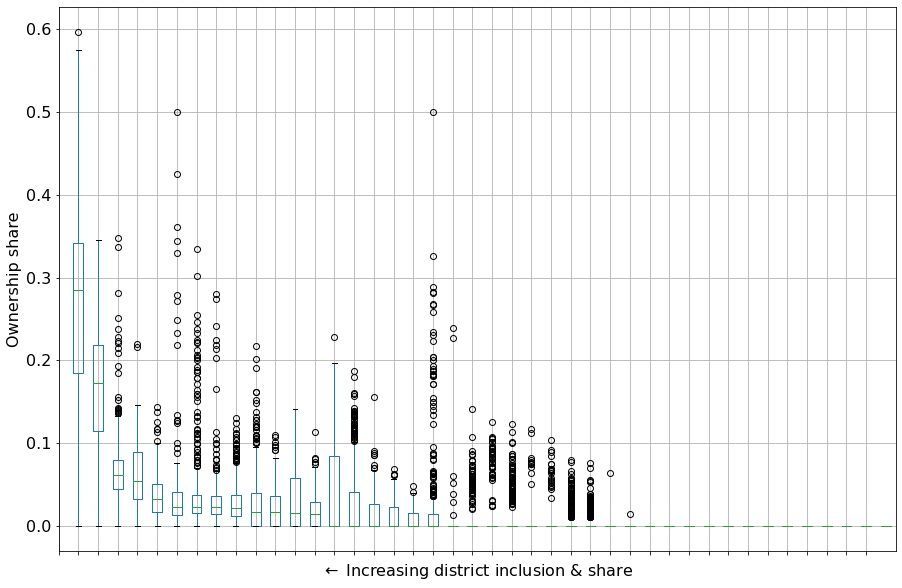

In [12]:
plt.figure(figsize=(15,10))
df_shares.boxplot()
dum = plt.xticks(rotation=90)
plt.xticks(range(df_shares.shape[1]), labels=[])
plt.xlabel(r'$\leftarrow$ Increasing district inclusion & share', fontsize=16)
plt.ylabel('Ownership share', fontsize=16)
plt.yticks(fontsize=16)

In [13]:
df_shares = shares.loc[:, shares.sum(axis=0) > 0]
df_stats = df_shares.describe()
### first sort by median
order = df_stats.loc['50%'].sort_values(ascending=False).index
df_stats = df_stats[order]
### for those with zero median, sort by 75%
num_nonzero = sum([df_stats.loc['50%', order[i]] > 0 for i in range(len(order))])
order = list(order[:num_nonzero]) + list(df_stats.loc['75%', order[num_nonzero:]].sort_values(ascending=False).index)
df_stats = df_stats[order]
### for those with zero 75%, sort by max
num_nonzero = sum([df_stats.loc['75%', order[i]] > 0 for i in range(len(order))])
order = list(order[:num_nonzero]) + list(df_stats.loc['max', order[num_nonzero:]].sort_values(ascending=False).index)
df_stats = df_stats[order]

df_shares = df_shares.loc[:, order]
df_shares.reset_index(inplace=True, drop=True)

### sort df_shares by N_P
df_shares = df_shares.iloc[objs.sort_values(['n_p', 'cwg_p'], ascending=False).index, :].reset_index(drop=True)

### patches plot, showing shares in different solutions. use custom scale
nonpartnercolor = '0.8'

ndistricts = df_shares.shape[1] 
nsolns = df_shares.shape[0]
cmap = cm.get_cmap('YlGnBu')
oldcolors = cmap(np.linspace(0.15, 1, 6))
# cmap = cm.get_cmap('viridis_r')
# oldcolors = cmap(np.linspace(0, 1, 6))
newcolors = cmap(np.linspace(0, 1, 2560))
breaks = [int(2560 * b) for b in [0.01,0.03, 0.07, 0.15, 0.3, 1]]
newcolors[:breaks[0]] = [nonpartnercolor,nonpartnercolor,nonpartnercolor, 1]
for i , b in enumerate(breaks[:-1]):
    newcolors[b:breaks[i+1]] = oldcolors[i]
cmap_class = ListedColormap(newcolors)
mappable = cm.ScalarMappable(cmap=cmap_class)

### separate cmap class with even intervals for colorbar
breaks_even = [int(2560 * b) for b in [1/6,2/6,3/6,4/6,5/6,1]]
newcolors_even = cmap(np.linspace(0, 1, 2560))
newcolors_even[:breaks_even[0]] = [nonpartnercolor,nonpartnercolor,nonpartnercolor, 1]
for i , b in enumerate(breaks_even[:-1]):
    newcolors_even[b:b+10] = [0,0,0,1]
    newcolors_even[b+10:breaks_even[i+1]] = oldcolors[i]
cmap_class_even = ListedColormap(newcolors_even)

mappable_even = cm.ScalarMappable(cmap=cmap_class_even)

# fig, ax = plt.subplots(1, figsize=(16,8))
# shareboxes = []
# colors = []
# for d in range(ndistricts):
#     for s in range(nsolns):
#         share = df_shares.iloc[s, d]
#         shareboxes = [Rectangle((s, ndistricts - d - 1), 1, 1)]
#         color = cmap_class(share)
#         if share == 0.:
#             alpha = 0
#         else:
#             alpha = 1
# #         pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
#         pc = PatchCollection(shareboxes, facecolor=color, alpha=alpha)
#         ax.add_collection(pc)
# ax.set_xlim([0,nsolns])
# ax.set_ylim([0,ndistricts])
# ax.set_xticks([])
# ax.set_xlabel(r'$\leftarrow$ Increasing size of partnership', fontsize=16)
# ax.set_ylabel(r'Increasing district inclusion & share $\rightarrow$', fontsize=16)
# # _ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), [s.split('_')[1] for s in df_shares.columns[:-1]], fontsize='14')
# _ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), labels=[], fontsize='14')
# cb = plt.colorbar(sm, ax=ax, ticks=[0.01,0.03, 0.07, 0.15, 0.3,0.6])
# _ = cb.ax.set_yticklabels([1,3,7,15,30,60], fontsize=16)
# _ = cb.set_label('ownership share (%)', fontsize=16)
# _ = cb.ax.set_ylim([0.01,0.6])


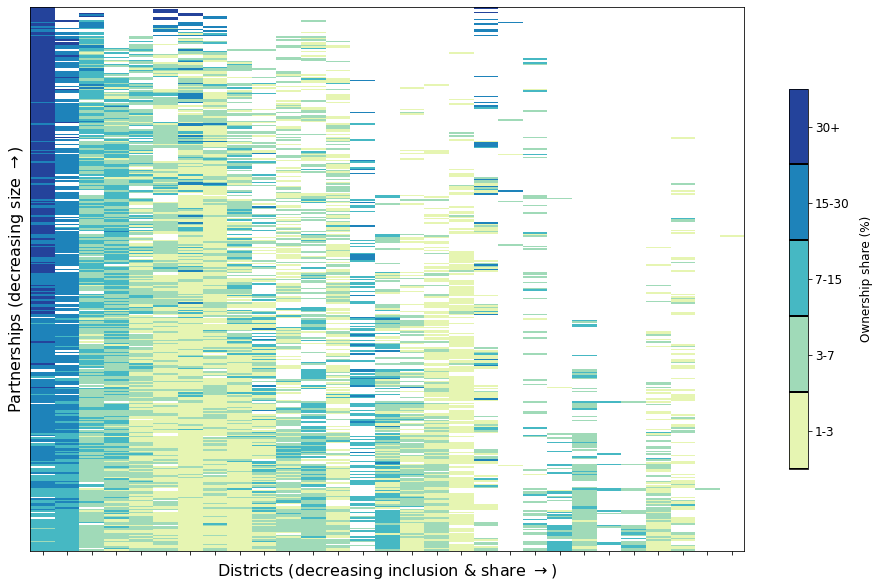

In [14]:
### quilt plot
fig_stage = 3   # 0 = none, 1 = single soln, 2 = single district, 3 = all 

fig, ax = plt.subplots(1, figsize=(16,10))
shareboxes = []
colors = []
for d in range(ndistricts):
    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        color = cmap_class(share)
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        shareboxes = [Rectangle((d, s), 1, 1)]
        
        if fig_stage == 0:
            alpha = 0
        elif fig_stage == 1:
            if s != int(nsolns/2):
                alpha = 0
            shareboxes = [Rectangle((d, s-6), 1, 7)]
        elif fig_stage == 2:
            if d != int(ndistricts/2):
                alpha = 0
            
        
#         pc = PatchCollection(shareboxes, facecolor=color, edgecolor='k', alpha=alpha)
        pc = PatchCollection(shareboxes, facecolor=color, alpha=alpha)
        ax.add_collection(pc)
        
ax.set_ylim([0,nsolns])
ax.set_xlim([0,ndistricts])
ax.set_yticks([])
ax.set_ylabel(r'Partnerships (decreasing size $\rightarrow$)', fontsize=16)
ax.set_xlabel(r'Districts (decreasing inclusion & share $\rightarrow$)', fontsize=16)
# _ = ax.set_yticks(np.arange(ndistricts - 0.5, 0, -1), [s.split('_')[1] for s in df_shares.columns[:-1]], fontsize=16)
_ = ax.set_xticks(np.arange(ndistricts - 0.5, 0, -1), labels=[], fontsize=16)

cb = plt.colorbar(mappable_even, ax=ax, ticks=[3/12,5/12,7/12,9/12,11/12], shrink=0.7)
_ = cb.ax.set_yticklabels(['1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)
_ = cb.ax.set_ylim([2/12,1])

# plt.savefig(f'{fig_dir}ownership_quilt_{fig_stage}.png', bbox_inches='tight', dpi=300)


In [15]:
# https://chart-studio.plotly.com/~empet/15191/texas-bivariate-choropleth-assoc/#/
jstevens = ["#e8e8e8", "#ace4e4", "#5ac8c8", "#dfb0d6", "#a5add3", 
            "#5698b9", "#be64ac", "#8c62aa", "#3b4994"]  # second example, pink/aqua

# jstevens = ["#e8e8e8", "#e4acac", "#c85a5a", "#b0d5df", "#ad9ea5", 
#             "#985356", "#64acbe", "#627f8c", "#574249"]  # first example, blue/red

# jstevens = ["#e8e8e8", "#b0d5df",  "#64acbe", "#e4acac", "#ad9ea5", 
#             "#627f8c", "#c85a5a", "#985356","#574249"]  # first example, but transpose

share_bounds = [0.05, 0.1, 1]
inclusion_bounds = [0.25, 0.75, 1]

# jstevens = ['#E8E8E8', '#C5E0E0', '#A1D8D8', '#7ED0D0', '#5AC8C8',
#             '#DEC7D9', '#BBBFD2', '#98B8CA', '#75B0C3', '#52A8BB',
#             '#D3A6CA', '#B19FC3', '#8F98BC', '#6D90B5', '#4B89AE',
#             '#C985BB', '#A87EB5', '#8677AE', '#6570A8', '#4369A1',
#             '#BE64AC', '#9D5DA6', '#7D57A0', '#5C509A', '#3B4994']
# share_bounds = [0.01, 0.03, 0.07, 0.15, 1]
# inclusion_bounds = [0.01, 0.25, 0.5, 0.75, 1]


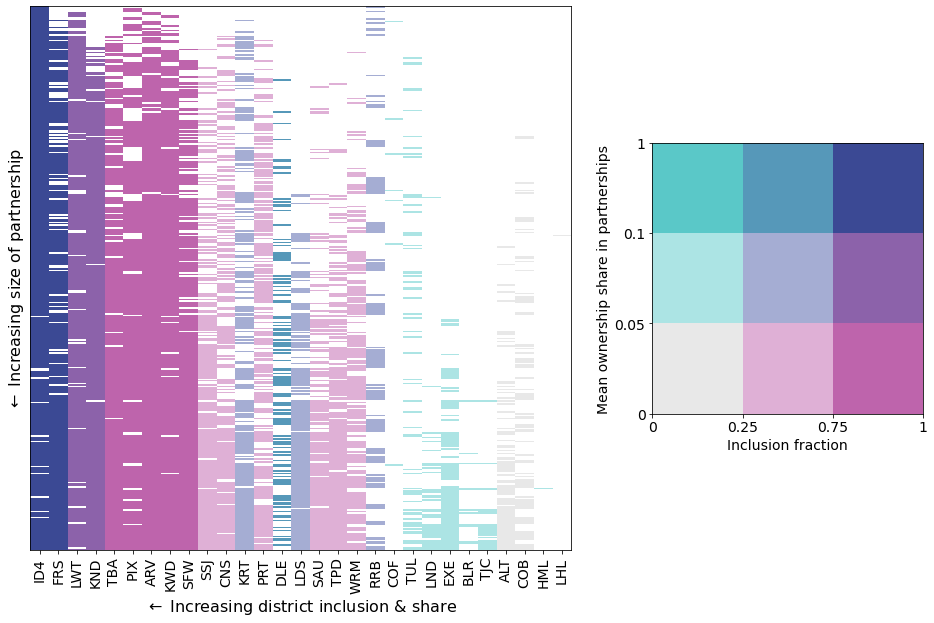

In [13]:
### test bivariate chloropleth 
fig, axs = plt.subplots(1,2, figsize=(16,10), gridspec_kw={'width_ratios': [0.66,0.33]})
ax = axs[0]

for d in range(ndistricts):
    count = 0
    stop = False
    for inclusion_bound in inclusion_bounds:
        for share_bound in share_bounds:
            if (not stop) and (np.mean(df_shares.iloc[:, d] > 0) < inclusion_bound):
                if (not stop) and (df_shares.iloc[:,d].loc[df_shares.iloc[:,d] > 0].mean() < share_bound):
                    color = jstevens[count]
                    stop = True
            count += 1

    for s in range(nsolns):
        share = df_shares.iloc[s, d]
        shareboxes = [Rectangle((d, s), 1, 1)]
        if share == 0.:
            alpha = 0
        else:
            alpha = 1
        pc = PatchCollection(shareboxes, facecolor=color, alpha=alpha)
        ax.add_collection(pc)
        
ax.set_ylim([0,nsolns])
ax.set_xlim([0,ndistricts])
ax.set_yticks([])
ax.set_ylabel(r'$\leftarrow$ Increasing size of partnership', fontsize=16)
ax.set_xlabel(r'$\leftarrow$ Increasing district inclusion & share', fontsize=16)
# _ = ax.set_xticks(np.arange(ndistricts - 0.5, 0, -1), labels=[], fontsize='14')
_ = ax.set_xticks(np.arange(0.5, ndistricts, 1), [s.split('_')[1] for s in df_shares.columns], fontsize='14', rotation=90)


ax = axs[1]
ax.set_aspect('equal', adjustable='box')
count = 0
xticks = [0]
yticks = [0]
for i,inclusion_bound in enumerate(inclusion_bounds):
    for j,share_bound in enumerate(share_bounds):
        shareboxes = [Rectangle((i,j), 1, 1)]
        pc = PatchCollection(shareboxes, facecolor=jstevens[count], alpha=1)
        count += 1
        ax.add_collection(pc)
        if i == 0:
            yticks.append(share_bound)
    xticks.append(inclusion_bound)

        
_=ax.set_xlim([0,len(share_bounds)])
_=ax.set_ylim([0,len(inclusion_bounds)])
_=ax.set_xticks(list(range(len(share_bounds)+1)), xticks, fontsize='14')
_=ax.set_xlabel('Inclusion fraction', fontsize='14')
_=ax.set_yticks(list(range(len(share_bounds)+1)), yticks, fontsize='14')
_=ax.set_ylabel('Mean ownership share in partnerships', fontsize='14')

In [15]:
results.columns

Index(['label', 'proj', 'share_FRS', 'share_COF', 'share_TUL', 'share_KWD',
       'share_EXE', 'share_LDS', 'share_LND', 'share_PRT', 'share_LWT',
       'share_TPD', 'share_SAU', 'share_TBA', 'share_PIX', 'share_DLE',
       'share_KRT', 'share_SSJ', 'share_SFW', 'share_NKN', 'share_ARV',
       'share_DLR', 'share_ID4', 'share_SMI', 'share_TJC', 'share_BLR',
       'share_LHL', 'share_BDM', 'share_WRM', 'share_COB', 'share_BVA',
       'share_CWO', 'share_HML', 'share_KND', 'share_RRB', 'share_CNS',
       'share_ALT', 'share_CWC', 'share_MAD', 'share_SOC', 'share_SOB',
       'share_CCA', 'share_OTL', 'share_OFK', 'cwg_p', 'ap_p', 'cwg_np',
       'cog_wp_p90', 'n_p', 'cog_wp_p50', 'cog_p_p90', 'cog_p_p50'],
      dtype='object')

### Analyze district-level distributions of outcomes using full MC

In [50]:
### first look at cwg_p-maximizing partnership
soln = 'soln1224'

# ### cog_wp_p90-minimizing partership
# soln = 'soln2'

### n_p-maximizing partnership
# soln = 'soln196'

### ap_p-maximizing partnership
# soln = 'soln817'

### ap_p-max within satisficing partnerships
# soln = 'soln375'

results_soln = results.loc[results['label'] == soln]
results_soln

,label,proj,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,share_PRT,...,share_OTL,share_OFK,cwg_p,ap_p,cwg_np,cog_wp_p90,n_p,cog_wp_p50,cog_p_p90,cog_p_p50
88,soln1224,3.0,0.231543,0.0,0.0,0.015864,0.0,0.0,0.0,0.015498,...,0.0,0.0,116.088327,50.02691,-27.034398,1000.0,11,159.750191,55.422503,43.781459


In [51]:
### get partners with nonzero shares, ordered by share
sharecols = [c for c in results_soln.columns if 'share' in c]
partners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] > 0]
shares = [results_soln[f'share_{c}'].iloc[0] for c in partners]
order = np.argsort(shares)[::-1]
shares = [shares[o] for o in order]
partners = [partners[o] for o in order]
print(shares)
print(partners)

[0.3151231048908899, 0.2315433203365748, 0.2007342769725852, 0.0875916633630454, 0.0710752818209862, 0.018748831876183, 0.0176393971866728, 0.0158644956971007, 0.0154984566214593, 0.0146257185780351, 0.0115554526564671]
['ID4', 'FRS', 'RRB', 'KND', 'PIX', 'CNS', 'WRM', 'KWD', 'PRT', 'COB', 'KRT']


In [52]:
import h5py

kaf_to_gl = 1.23
baseline = 'soln1294'

with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
    mc_soln = f[soln][...].transpose()
    mc_baseline = f[baseline][...].transpose()
    df_mc = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])

## filter for cwg
df_mc = df_mc.loc[:, [f'{d}_avg_captured_water' for d in partners]] * kaf_to_gl
df_mc.columns = [f'{d}_cwg' for d in partners]
df_mc

,ID4_cwg,FRS_cwg,RRB_cwg,KND_cwg,PIX_cwg,CNS_cwg,WRM_cwg,KWD_cwg,PRT_cwg,COB_cwg,KRT_cwg
mc33,24.680414,9.469294,37.201144,4.983742,32.262903,3.620189,-3.773465,13.114463,1.253911,11.003019,3.841792
mc34,24.779873,6.047999,24.548794,4.940693,27.660569,2.092541,8.323574,11.693935,1.588405,6.924047,2.788111
mc35,19.173019,7.754656,17.544329,3.526096,26.560508,1.466524,6.221259,8.913492,1.447561,3.851872,3.642651
mc36,19.742335,18.975754,16.507191,4.506844,34.408533,2.544159,8.306472,12.680290,2.569449,2.640104,4.637641
mc37,13.433645,7.083530,12.812104,2.707874,16.237055,1.707695,3.680123,3.429581,1.492642,6.467050,1.765163
...,...,...,...,...,...,...,...,...,...,...,...
mc92,20.416002,5.482656,21.315017,4.084819,30.655265,-0.084341,6.620903,10.587860,1.225120,7.683277,3.752381
mc93,23.216544,7.689758,20.518643,8.156210,43.210368,2.011301,10.691640,22.226721,1.165022,0.790718,5.211282
mc94,21.581342,16.661024,19.413574,3.051834,23.120531,2.625855,7.087580,11.820663,1.424809,8.179512,2.393686
mc95,22.724715,6.780791,25.330538,4.944276,22.728810,1.540346,6.736249,7.429254,2.139837,12.833665,2.940006


In [53]:
print(df_mc.mean(axis=0).sum())

116.08832722461901


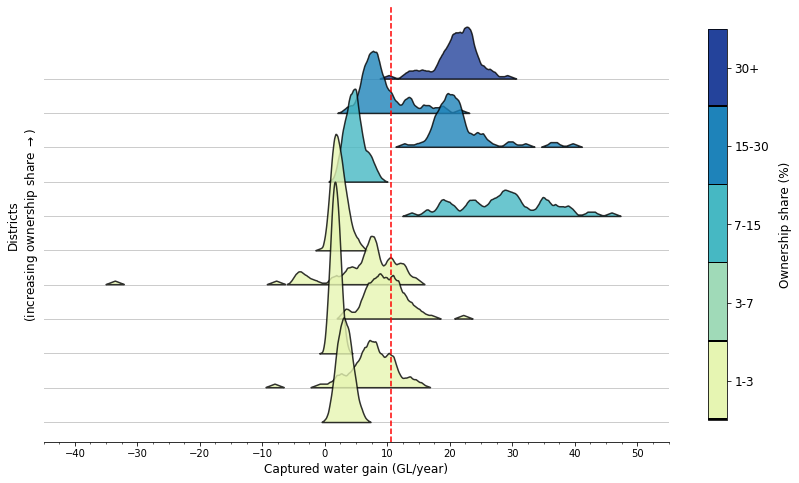

In [54]:
### ridge plot for CWG of each partner, using statsmodels triangular kde
import statsmodels.api as sm
from matplotlib import cm
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(1, figsize=(14,8))
ridgesep = 0.1
xmin = -45
xmax = 55
for i,d in enumerate(partners):
    ### set bottom of "ridge" in decreasing order (smallest share at bottom)
    bottom = (-i * ridgesep)
    plt.axhline(bottom, color='0.8', zorder=1, lw=1)

    ### evaluate & plot kde
    c = f'{d}_cwg'
    kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
    kde_district.fit(kernel='tri', fft=False, bw=1.5)
    x = np.arange(xmin, xmax, 0.1)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx)
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)
    color = cmap_class(shares[i])
    plt.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

plt.axvline(results_soln['cwg_p'].iloc[0] / len(partners), color='r', ls='--')
plt.yticks([])
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(2.5))

plt.xlim([xmin, xmax])
plt.ylabel('Districts\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
plt.xlabel('Captured water gain (GL/year)', fontsize=fontsize)
ax.spines[['top', 'left', 'right']].set_visible(False)


### add colorbar 
cb = plt.colorbar(mappable_even, ax=ax, ticks=[3/12,5/12,7/12,9/12,11/12], shrink=0.9)
_ = cb.ax.set_yticklabels(['1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)
_ = cb.ax.set_ylim([2/12,1])

In [55]:
#### get annual paymetns for infrastructure
FKC_participant_payment = 50e6
CFWB_cost = 50e6
interest_annual = 0.03
time_horizon = 30
cap = 1000
projects = {0: 'none', 1: 'FKC', 2: 'CFWB', 3: 'FKC_CFWB'}
principle = {'none': 0., 'FKC': FKC_participant_payment, 'CFWB': CFWB_cost, 'FKC_CFWB': FKC_participant_payment + CFWB_cost}
payments_per_yr = 1
interest_rt = interest_annual / payments_per_yr
num_payments = time_horizon * payments_per_yr
annual_debt_payment_dict = {k: principle[k] / (((1 + interest_rt) ** num_payments - 1) / (interest_rt * (1 + interest_rt) ** num_payments)) for k in principle}

project = projects[results_soln['proj'].iloc[0]]
annual_debt_payment = annual_debt_payment_dict[project]

### get cost of gains in each MC sample for each partner
partner_shares = [results_soln[f'share_{d}'].iloc[0] for d in partners]
for i,d in enumerate(partners):
    df_mc[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / df_mc[f'{d}_cwg'] / 1000
    df_mc[f'{d}_cog'].loc[df_mc[f'{d}_cog'] > cap] = cap
    df_mc[f'{d}_cog'].loc[df_mc[f'{d}_cog'] < 0] = cap
    
df_mc

,ID4_cwg,FRS_cwg,RRB_cwg,KND_cwg,PIX_cwg,CNS_cwg,WRM_cwg,KWD_cwg,PRT_cwg,COB_cwg,...,FRS_cog,RRB_cog,KND_cog,PIX_cog,CNS_cog,WRM_cog,KWD_cog,PRT_cog,COB_cog,KRT_cog
mc33,24.680414,9.469294,37.201144,4.983742,32.262903,3.620189,-3.773465,13.114463,1.253911,11.003019,...,124.752365,27.529568,89.668802,11.239560,26.422694,1000.000000,6.171773,63.060291,6.781715,15.345718
mc34,24.779873,6.047999,24.548794,4.940693,27.660569,2.092541,8.323574,11.693935,1.588405,6.924047,...,195.323599,41.718197,90.450105,13.109666,45.712444,10.812049,6.921493,49.780750,10.776838,21.145163
mc35,19.173019,7.754656,17.544329,3.526096,26.560508,1.466524,6.221259,8.913492,1.447561,3.851872,...,152.336470,58.373930,126.736806,13.652631,65.225768,14.465706,9.080558,54.624273,19.372228,16.184660
mc36,19.742335,18.975754,16.507191,4.506844,34.408533,2.544159,8.306472,12.680290,2.569449,2.640104,...,62.254016,62.041530,99.157238,10.538689,37.597942,10.834310,6.383094,30.773901,28.263783,12.712295
mc37,13.433645,7.083530,12.812104,2.707874,16.237055,1.707695,3.680123,3.429581,1.492642,6.467050,...,166.769511,79.934677,165.032124,22.332918,56.014180,24.454318,23.600401,52.974518,11.538388,33.399214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mc92,20.416002,5.482656,21.315017,4.084819,30.655265,-0.084341,6.620903,10.587860,1.225120,7.683277,...,215.464360,48.047412,109.401702,11.828990,1000.000000,13.592542,7.644555,64.542223,9.711915,15.711373
mc93,23.216544,7.689758,20.518643,8.156210,43.210368,2.011301,10.691640,22.226721,1.165022,0.790718,...,153.622117,49.912239,54.790911,8.391987,47.558853,8.417315,3.641539,67.871684,94.369071,11.312967
mc94,21.581342,16.661024,19.413574,3.051834,23.120531,2.625855,7.087580,11.820663,1.424809,8.179512,...,70.903016,52.753369,146.432023,15.683932,36.428188,12.697550,6.847288,55.496530,9.122712,24.629401
mc95,22.724715,6.780791,25.330538,4.944276,22.728810,1.540346,6.736249,7.429254,2.139837,12.833665,...,174.215206,40.430701,90.384554,15.954237,62.099798,13.359794,10.894698,36.952334,5.814343,20.052699


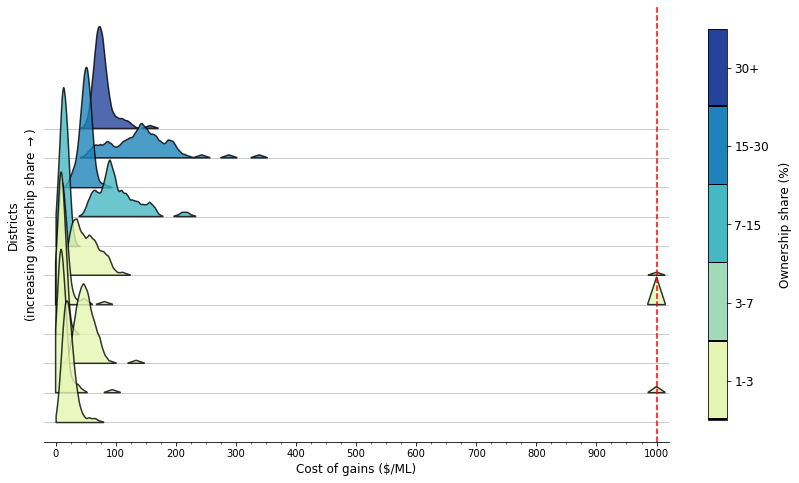

In [19]:
### ridge plot for COG of each partner, using statsmodels triangular kde
import statsmodels.api as sm

fig, ax = plt.subplots(1, figsize=(14,8))
ridgesep = 0.01
xmin = -20
xmax = 1020
for i,d in enumerate(partners):
    ### set bottom of "ridge" in decreasing order (smallest share at bottom)
    bottom = (-i * ridgesep)
    plt.axhline(bottom, color='0.8', zorder=1, lw=1)

    ### evaluate & plot kde
    c = f'{d}_cog'
    kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
    kde_district.fit(kernel='tri', fft=False, bw=15)
    x = np.arange(xmin, xmax, 0.5)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx)
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)
    color = cmap_class(shares[i])
    plt.fill_between(x, y + bottom, bottom, where=np.logical_and(y > 0.0001, x >= 0), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

plt.axvline(results_soln['cog_wp_p90'].iloc[0], color='red', ls='--')
plt.yticks([])
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_minor_locator(MultipleLocator(25))

plt.xlim([xmin, xmax])
plt.ylabel('Districts\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
plt.xlabel('Cost of gains ($/ML)', fontsize=fontsize)
ax.spines[['top', 'left', 'right']].set_visible(False)

### add colorbar 
cb = plt.colorbar(mappable_even, ax=ax, ticks=[3/12,5/12,7/12,9/12,11/12], shrink=0.9)
_ = cb.ax.set_yticklabels(['1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)
_ = cb.ax.set_ylim([2/12,1])

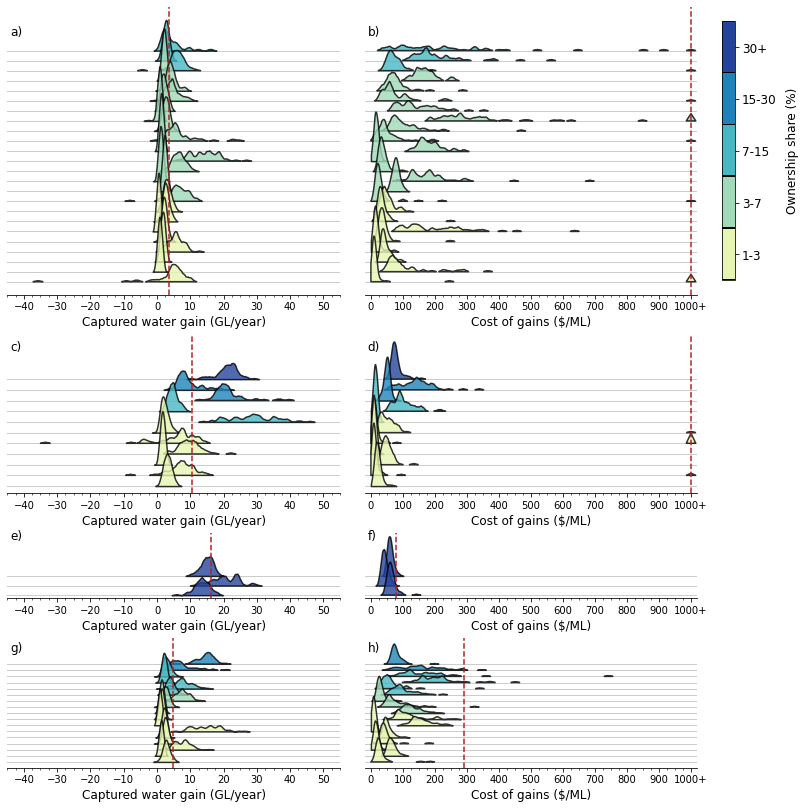

In [67]:
### 8-part figure with district-level CWG & COG MC results, 4 example partnerships

solns = ['soln196', 'soln1224', 'soln2', 'soln375'] #soln599
labels = [['a)', 'b)'], ['c)','d)'], ['e)','f)'], ['g)','h)']]
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(nrows=4, ncols=3, height_ratios=[20,11,4.5,9], width_ratios=[5,5,1], hspace=0.25, wspace=0.1)
for row, soln in enumerate(solns):
    ax0 = fig.add_subplot(gs[row, 0])
    results_soln = results.loc[results['label'] == soln]
    
    ### get partners with nonzero shares, ordered by share
    sharecols = [c for c in results_soln.columns if 'share' in c]
    partners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] > 0]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in partners]
    order = np.argsort(shares)[::-1]
    shares = [shares[o] for o in order]
    partners = [partners[o] for o in order]
    
    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])

    ## filter for cwg
    cap = 1000
    df_mc = df_mc.loc[:, [f'{d}_avg_captured_water' for d in partners]] * kaf_to_gl
    df_mc.columns = [f'{d}_cwg' for d in partners]
    
    ### get cost of gains in each MC sample for each partner
    project = projects[results_soln['proj'].iloc[0]]
    annual_debt_payment = annual_debt_payment_dict[project]
    partner_shares = [results_soln[f'share_{d}'].iloc[0] for d in partners]
    for i,d in enumerate(partners):
        df_mc[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / df_mc[f'{d}_cwg'] / 1000
        df_mc[f'{d}_cog'].loc[df_mc[f'{d}_cog'] > cap] = cap
        df_mc[f'{d}_cog'].loc[df_mc[f'{d}_cog'] < 0] = cap
    
    ridgesep = 0.1
    xmin = -45
    xmax = 55
    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax0.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cwg'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax0.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ax0.axvline(results_soln['cwg_p'].iloc[0] / len(partners), color='firebrick', ls='--')
    ax0.set_yticks([])
    ax0.xaxis.set_major_locator(MultipleLocator(10))
    ax0.xaxis.set_minor_locator(MultipleLocator(2.5))

    ax0.set_xlim([xmin, xmax])
#     ax0.set_ylabel('Districts')#\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
#     if row == 3:
    ax0.set_xlabel('Captured water gain (GL/year)', fontsize=fontsize)
    ax0.spines[['top', 'left', 'right']].set_visible(False)

    
    ### now do cost of gains figures
    ax1 = fig.add_subplot(gs[row, 1])
    ridgesep = 0.01
    xmin = -20
    xmax = 1020
    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax1.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cog'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=15)
        x = np.arange(xmin, xmax, 0.5)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax1.fill_between(x, y + bottom, bottom, where=np.logical_and(y > 0.0001, x >= 0), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ax1.axvline(min(results_soln['cog_wp_p90'].iloc[0], cap), color='firebrick', ls='--')
    ax1.set_yticks([])
#     ax1.xaxis.set_major_locator(MultipleLocator(100))
    xticks = list(range(0,1001,100))
    xticklabels = [str(x) for x in xticks]
    xticklabels[-1] += '+'
    ax1.set_xticks(xticks, xticklabels)
    ax1.xaxis.set_minor_locator(MultipleLocator(25))

    ax1.set_xlim([xmin, xmax])
#     ax1.set_ylabel('Districts\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
#     if row == 3:
    ax1.set_xlabel('Cost of gains ($/ML)', fontsize=fontsize)
    ax1.spines[['top', 'left', 'right']].set_visible(False)

    ### adjust ylims so that right and left match
    ylim0 = ax0.get_ylim()
    ylim1 = ax1.get_ylim()
    ylim0_new = [min(ylim0[0], ylim1[0]*10), max(ylim0[1], ylim1[1]*10)]
    ylim1_new = [y/10 for y in ylim0_new]
    ax0.set_ylim(ylim0_new)
    ax1.set_ylim(ylim1_new)
    
    ### label subfigs
    ax0.annotate(labels[row][0], xy=(0.01,0.9), xycoords='axes fraction', fontsize=fontsize)
    ax1.annotate(labels[row][1], xy=(0.01,0.9), xycoords='axes fraction', fontsize=fontsize)

### add colorbar 
ax2 = fig.add_subplot(gs[0,2])
ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
cb = plt.colorbar(mappable_even, ax=ax2, ticks=[3/12,5/12,7/12,9/12,11/12], shrink=0.9, fraction=1)
_ = cb.ax.set_yticklabels(['1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)
_ = cb.ax.set_ylim([2/12,1])

plt.savefig(f'{fig_dir}partners_cwg_cog_pdfs.png', bbox_inches='tight', dpi=300)


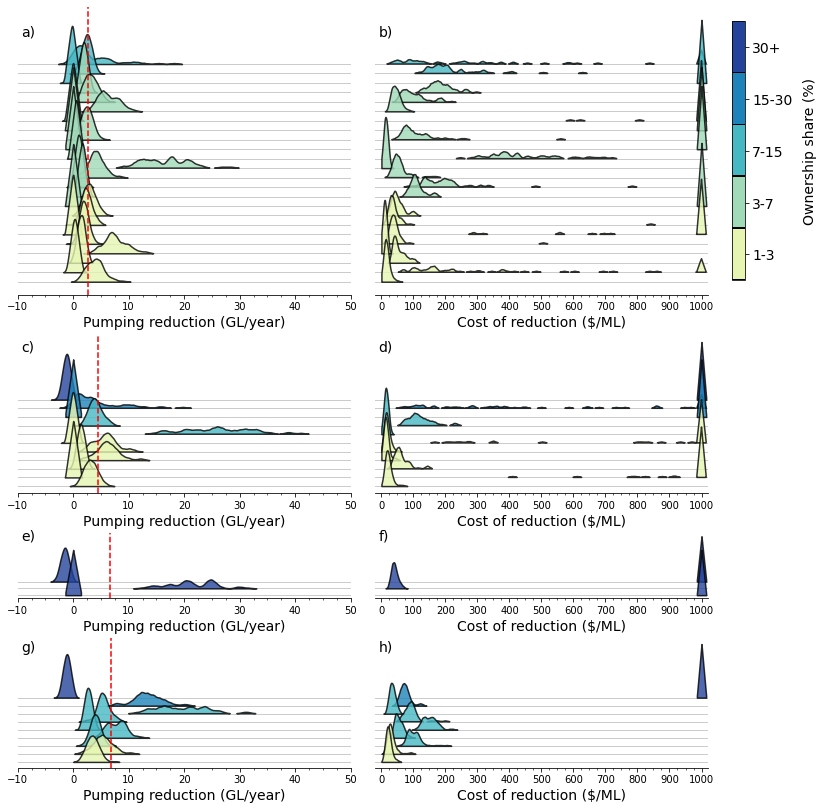

In [242]:
### 8-part figure with district-level pumping reduction (PR) & cost of reduction (CR) MC results, 4 example partnerships
import matplotlib.gridspec as gridspec

# solns = ['soln196', 'soln1224', 'soln2', 'soln599']
labels = [['a)', 'b)'], ['c)','d)'], ['e)','f)'], ['g)','h)']]
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(nrows=4, ncols=3, height_ratios=[20,11,4.5,9], width_ratios=[5,5,1], hspace=0.25, wspace=0.1)
for row, soln in enumerate(solns):
    ax0 = fig.add_subplot(gs[row, 0])
    results_soln = results.loc[results['label'] == soln]
    
    ### get partners with nonzero shares, ordered by share
    sharecols = [c for c in results_soln.columns if 'share' in c]
    partners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] > 0]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in partners]
    order = np.argsort(shares)[::-1]
    shares = [shares[o] for o in order]
    partners = [partners[o] for o in order]
    
    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_baseline - mc_soln, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])

    ## filter for pr
    cap = 1000
    df_mc = df_mc.loc[:, [f'{d}_avg_pumping' for d in partners]] * kaf_to_gl
    df_mc.columns = [f'{d}_pr' for d in partners]
    
    ### get cost of reductions in each MC sample for each partner
    project = projects[results_soln['proj'].iloc[0]]
    annual_debt_payment = annual_debt_payment_dict[project]
    partner_shares = [results_soln[f'share_{d}'].iloc[0] for d in partners]
    for i,d in enumerate(partners):
        df_mc[f'{d}_cor'] = (annual_debt_payment * partner_shares[i]) / df_mc[f'{d}_pr'] / 1000
        df_mc[f'{d}_cor'].loc[df_mc[f'{d}_cor'] > cap] = cap
        df_mc[f'{d}_cor'].loc[df_mc[f'{d}_cor'] < 0] = cap
    
    ridgesep = 0.1
    xmin = -10
    xmax = 50
    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax0.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_pr'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax0.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ax0.axvline(results_soln['ap_p'].iloc[0] / len(partners), color='r', ls='--')
    ax0.set_yticks([])
    ax0.xaxis.set_major_locator(MultipleLocator(10))
    ax0.xaxis.set_minor_locator(MultipleLocator(2.5))

    ax0.set_xlim([xmin, xmax])
#     ax0.set_ylabel('Districts')#\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
#     if row == 3:
    ax0.set_xlabel('Pumping reduction (GL/year)', fontsize=fontsize)
    ax0.spines[['top', 'left', 'right']].set_visible(False)

    
    ### now do cost of reductions figures
    ax1 = fig.add_subplot(gs[row, 1])
    ridgesep = 0.01
    xmin = -20
    xmax = 1020
    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax1.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cor'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=15)
        x = np.arange(xmin, xmax, 0.5)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax1.fill_between(x, y + bottom, bottom, where=np.logical_and(y > 0.0001, x >= 0), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

#     ax1.axvline(min(results_soln['cog_wp_p90'].iloc[0], cap), color='red', ls='--')
    ax1.set_yticks([])
    ax1.xaxis.set_major_locator(MultipleLocator(100))
    ax1.xaxis.set_minor_locator(MultipleLocator(25))

    ax1.set_xlim([xmin, xmax])
#     ax1.set_ylabel('Districts\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
#     if row == 3:
    ax1.set_xlabel('Cost of reduction ($/ML)', fontsize=fontsize)
    ax1.spines[['top', 'left', 'right']].set_visible(False)

    ### adjust ylims so that right and left match
    ylim0 = ax0.get_ylim()
    ylim1 = ax1.get_ylim()
    ylim0_new = [min(ylim0[0], ylim1[0]*10), max(ylim0[1], ylim1[1]*10)]
    ylim1_new = [y/10 for y in ylim0_new]
    ax0.set_ylim(ylim0_new)
    ax1.set_ylim(ylim1_new)
    
    ### label subfigs
    ax0.annotate(labels[row][0], xy=(0.01,0.9), xycoords='axes fraction', fontsize=fontsize)
    ax1.annotate(labels[row][1], xy=(0.01,0.9), xycoords='axes fraction', fontsize=fontsize)

### add colorbar 
ax2 = fig.add_subplot(gs[0,2])
ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
cb = plt.colorbar(mappable_even, ax=ax2, ticks=[3/12,5/12,7/12,9/12,11/12], shrink=0.9, fraction=1)
_ = cb.ax.set_yticklabels(['1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)
_ = cb.ax.set_ylim([2/12,1])

# plt.savefig(f'{fig_dir}partners_pr_cor_pdfs.png', bbox_inches='tight', dpi=300)


KND -14.670833693399715
OFK -25.976150840256413
OFK -14.34381984388425
OFK 10.425045875502413


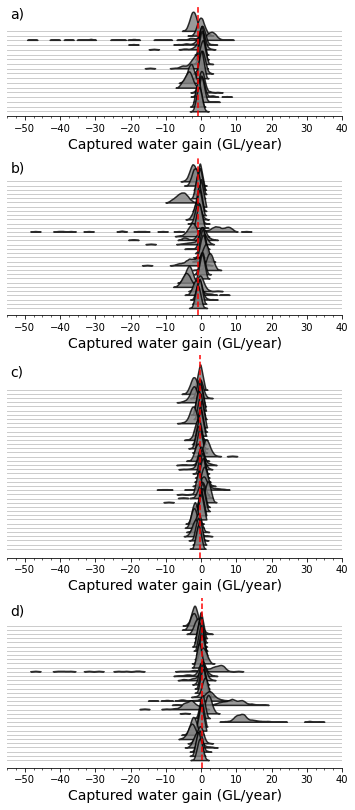

In [243]:
### repeat district-level CWG results for non-partners
import matplotlib.gridspec as gridspec

# solns = ['soln196', 'soln1224', 'soln2', 'soln599']
labels = ['a)', 'b)', 'c)', 'd)']
fig = plt.figure(figsize=(6,14))
gs = gridspec.GridSpec(nrows=4, ncols=1, height_ratios=[40-20,40-11,40-3,40-9], width_ratios=[1], hspace=0.25, wspace=0.1)
for row, soln in enumerate(solns):
    ax0 = fig.add_subplot(gs[row, 0])
    results_soln = results.loc[results['label'] == soln]
    
    ### get nonpartners with zero shares
    sharecols = [c for c in results_soln.columns if 'share' in c]
    nonpartners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] == 0]
    
    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])

    ## filter for cwg
    df_mc = df_mc.loc[:, [f'{d}_avg_captured_water' for d in nonpartners]] * kaf_to_gl
    df_mc.columns = [f'{d}_cwg' for d in nonpartners]
    print(d, df_mc.sum(axis=1).mean())
    
    ### ridgeplot
    ridgesep = 0.1
    xmin = -55
    xmax = 40
    for i,d in enumerate(nonpartners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax0.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cwg'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = '0.5'
        ax0.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ax0.axvline(results_soln['cwg_np'].iloc[0] / len(nonpartners), color='r', ls='--')
    ax0.set_yticks([])
    ax0.xaxis.set_major_locator(MultipleLocator(10))
    ax0.xaxis.set_minor_locator(MultipleLocator(2.5))

    ax0.set_xlim([xmin, xmax])
#     ax0.set_ylabel('Districts')#\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
#     if row == 3:
    ax0.set_xlabel('Captured water gain (GL/year)', fontsize=fontsize)
    ax0.spines[['top', 'left', 'right']].set_visible(False)
    
    ### label subfigs
    ax0.annotate(labels[row], xy=(0.01,0.9), xycoords='axes fraction', fontsize=fontsize)

plt.savefig(f'{fig_dir}nonpartners_cwg_pdfs.png', bbox_inches='tight', dpi=300)


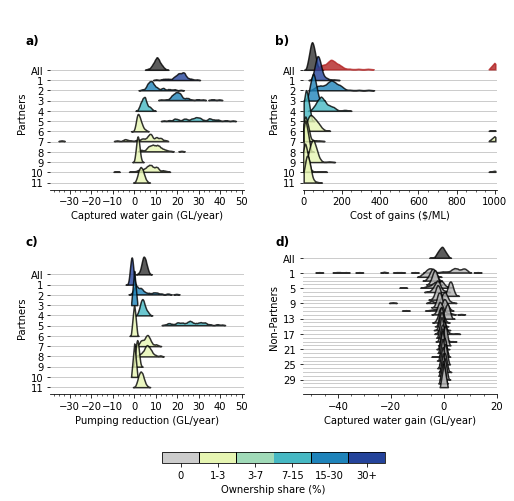

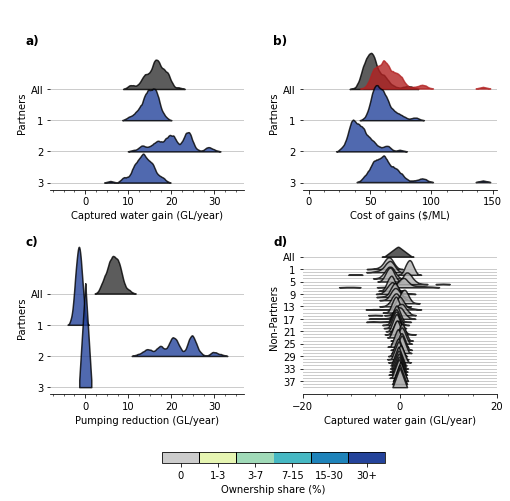

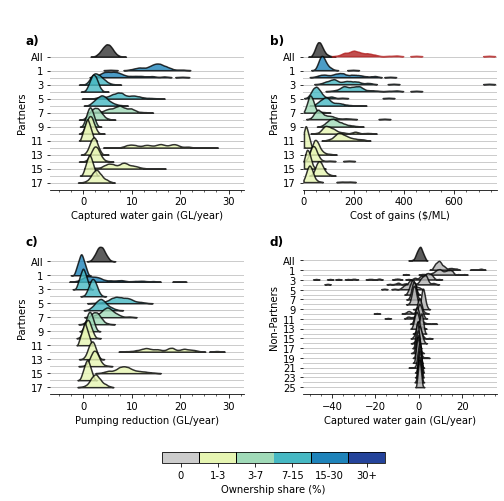

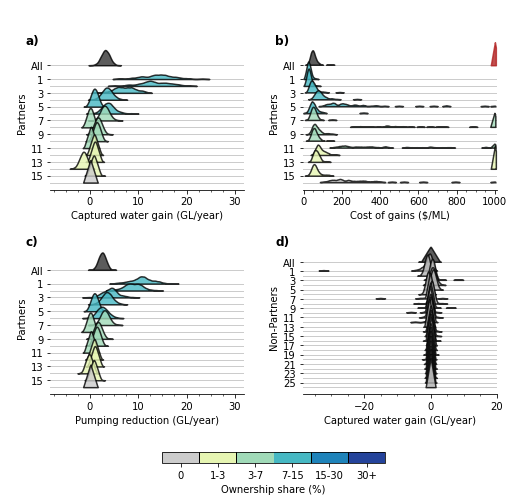

In [132]:
### 4-part figure with district-level CWG, COG, AP, & CWG-NP for example "compromise" solution
import matplotlib.gridspec as gridspec

fontsize=10
labels = ['a)', 'b)', 'c)','d)']
use_all_nonpartners = True
solns = ['soln1224', 'soln2', 'soln375', 'friant16'] #soln599, soln196, 

for soln in solns:
    
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(nrows=3, ncols=2, hspace=0.45, wspace=0.3, height_ratios=[6,6,1])

    ax0 = fig.add_subplot(gs[0,0])
    if soln == 'friant16':
        results_soln = ef_results.loc[ef_results['label'] == soln]
    else:
        results_soln = results.loc[results['label'] == soln]

    ### friant16 labeled differently in aggregated ef_results vs MC resutls
    soln_mc = soln if soln != 'friant16' else 'soln1293'

    ### get partners with nonzero shares, ordered by share
    sharecols = [c for c in results_soln.columns if 'share' in c]
    partners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] > 0]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in partners]
    order = np.argsort(shares)[::-1]
    shares = [shares[o] for o in order]
    partners = [partners[o] for o in order]

    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        ### friant16 labeled differently in aggregated ef_results vs MC resutls
        soln_mc = soln if soln != 'friant16' else 'soln1293'
        ### get results with and without infra, transform into baseline regret
        mc_soln = f[soln_mc][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln_mc].attrs['colnames']], columns = f[soln_mc].attrs['rownames'])

    ## filter for cwg
    cap = 1000
    df_mc = df_mc.loc[:, [f'{d}_avg_captured_water' for d in partners]] * kaf_to_gl
    df_mc.columns = [f'{d}_cwg' for d in partners]

    ### add column for partnership-wide avg cwg
    df_mc['overall_cwg'] = df_mc.loc[:, [p + '_cwg' for p in partners]].sum(axis=1) / len(partners)

    ### get cost of gains in each MC sample for each partner
    project = projects[results_soln['proj'].iloc[0]]
    annual_debt_payment = annual_debt_payment_dict[project]
    partner_shares = [results_soln[f'share_{d}'].iloc[0] for d in partners]
    for i,d in enumerate(partners):
        df_mc[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / df_mc[f'{d}_cwg'] / 1000
        df_mc[f'{d}_cog'].loc[df_mc[f'{d}_cog'] > cap] = cap
        df_mc[f'{d}_cog'].loc[df_mc[f'{d}_cog'] < 0] = cap
    ### repeat for partnership as a whole. get both avg and worst-off partnership cost
    df_mc['overall_cog'] = annual_debt_payment / df_mc['overall_cwg'] / len(partners) / 1000
    df_mc['worst_off_cog'] = df_mc[[f'{d}_cog' for d in partners]].max(axis=1) 

    ridgesep = 0.2
    xmin = -100
    xmax = 120

    ### first do kde for overall partnership 
    if len(partners) > 30:
        avg_gap = 4
    elif len(partners) > 15:
        avg_gap = 2
    else:
        avg_gap = 1

    ax0.axhline(avg_gap * ridgesep, color='0.8', zorder=1, lw=1)
    c = f'overall_cwg'
    kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
    kde_district.fit(kernel='tri', fft=False, bw=1.5)
    x = np.arange(xmin, xmax, 0.1)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx)
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)
    color = '0.2'
    ax0.fill_between(x, y + avg_gap * ridgesep, avg_gap * ridgesep, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ### now plot kdes for individual partners
    xlim = [0,0]
    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax0.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cwg'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax0.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')
        xlim = [min(xlim[0], x[y > 0.00005][0]), max(xlim[1], x[y > 0.00005][-1])]

    # ax0.axvline(results_soln['cwg_p'].iloc[0] / len(partners), color='firebrick', ls='--')
    ax0.set_yticks([avg_gap * ridgesep] + [-i*ridgesep for i in range(len(partners)) if i%avg_gap == 0], ['All']+[i+1 for i in range(len(partners)) if i%avg_gap == 0])
    ax0.set_ylabel('Partners')
    ax0.xaxis.set_major_locator(MultipleLocator(10))
    ax0.xaxis.set_minor_locator(MultipleLocator(2.5))

    xlim = [min(xlim[0]-2, 0), max(xlim[1]+2, 30)]
    ax0.set_xlim(xlim)
    ax0.set_xlabel('Captured water gain (GL/year)', fontsize=fontsize)
    ax0.spines[['top', 'left', 'right']].set_visible(False)





    ### now do cost of gains figures
    ax1 = fig.add_subplot(gs[0,1])
    ridgesep = 0.2
    xmin = 0
    xmax = 1005

    kde_scaler = {'soln196': 1000/70, 'soln375': 800/50, 'soln2': 200/50, 'soln1224': 1000/50, 'soln599': 200/50, 'friant16':1000/70}[soln]

    ### first do kde for overall partnership - avg cost
    ax1.axhline(avg_gap * ridgesep, color='0.8', zorder=1, lw=1)
    c = f'overall_cog'
    kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
    kde_district.fit(kernel='tri', fft=False, bw=1.5* kde_scaler)
    x = np.arange(xmin, xmax, 0.1)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx)* kde_scaler
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)
    color = '0.2'
    ax1.fill_between(x, y + avg_gap * ridgesep, avg_gap * ridgesep, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ### now do kde for overall partnership - worst-off cost
    c = f'worst_off_cog'
    kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
    kde_district.fit(kernel='tri', fft=False, bw=1.5* kde_scaler)
    x = np.arange(xmin, xmax, 0.1)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx)* kde_scaler
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)
    color = 'firebrick'
    ax1.fill_between(x, y + avg_gap * ridgesep, avg_gap * ridgesep, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = color)

    ### now plot kdes for individual partners
    xlim = [0,0]
    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax1.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cog'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5*kde_scaler)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx) * kde_scaler
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax1.fill_between(x, y + bottom, bottom, where=np.logical_and(y > 0.0001, x >= 0), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')
        xlim = [min(xlim[0], x[y > 0.00005][0]), max(xlim[1], x[y > 0.00005][-1])]

    # ax1.axvline(min(results_soln['cog_wp_p90'].iloc[0], cap), color='firebrick', ls='--')
    ax1.set_yticks([avg_gap * ridgesep] + [-i*ridgesep for i in range(len(partners)) if i%avg_gap == 0], ['All']+[i+1 for i in range(len(partners)) if i%avg_gap == 0])
    ax1.set_ylabel('Partners')

    xlim = [min(xlim[0]-5, -5), max(xlim[1]+5, 30)]
    ax1.set_xlim(xlim)

    ax1.set_xlabel('Cost of gains ($/ML)', fontsize=fontsize)
    ax1.spines[['top', 'left', 'right']].set_visible(False)

    if xlim[1] < 300:
        ax1.xaxis.set_major_locator(MultipleLocator(50))
        ax1.xaxis.set_minor_locator(MultipleLocator(12.5))
    else:
        ax1.xaxis.set_major_locator(MultipleLocator(200))
        ax1.xaxis.set_minor_locator(MultipleLocator(50))





    ### now do averted pumping
    ax2 = fig.add_subplot(gs[1,0])

    sharecols = [c for c in results_soln.columns if 'share' in c]
    partners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] > 0]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in partners]
    order = np.argsort(shares)[::-1]
    shares = [shares[o] for o in order]
    partners = [partners[o] for o in order]

    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln_mc][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_baseline - mc_soln, index = ['mc' + mc for mc in f[soln_mc].attrs['colnames']], columns = f[soln_mc].attrs['rownames'])

    ## filter for pr
    df_mc = df_mc.loc[:, [f'{d}_avg_pumping' for d in partners]] * kaf_to_gl
    df_mc.columns = [f'{d}_pr' for d in partners]

    ### add column for partnership-wide avg pr
    df_mc['overall_pr'] = df_mc.loc[:, [p + '_pr' for p in partners]].sum(axis=1) / len(partners)

    ridgesep = 0.2
    xmin = -100
    xmax = 120

    ### first do kde for overall partnership
    ax2.axhline(avg_gap * ridgesep, color='0.8', zorder=1, lw=1)
    c = f'overall_pr'
    kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
    kde_district.fit(kernel='tri', fft=False, bw=1.5)
    x = np.arange(xmin, xmax, 0.1)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx)
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)
    color = '0.2'
    ax2.fill_between(x, y + avg_gap * ridgesep, avg_gap * ridgesep, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ### now plot kdes for individual partners
    xlim = [0,0]
    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax2.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_pr'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax2.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')
        xlim = [min(xlim[0], x[y > 0.00005][0]), max(xlim[1], x[y > 0.00005][-1])]

    # ax2.axvline(results_soln['ap_p'].iloc[0] / len(partners), color='firebrick', ls='--')
    ax2.set_yticks([avg_gap * ridgesep] + [-i*ridgesep for i in range(len(partners)) if i%avg_gap == 0], ['All']+[i+1 for i in range(len(partners)) if i%avg_gap == 0])
    ax2.set_ylabel('Partners')
    ax2.xaxis.set_major_locator(MultipleLocator(10))
    ax2.xaxis.set_minor_locator(MultipleLocator(2.5))
    ax2.set_xlabel('Pumping reduction (GL/year)', fontsize=fontsize)
    ax2.spines[['top', 'left', 'right']].set_visible(False)

    xlim = [min(xlim[0]-2, 0), max(xlim[1]+2, 30)]
    ax2.set_xlim(xlim)

    ### reset xlim to be equivalent for CWG & PR
    xlim = [min(ax0.get_xlim()[0], ax2.get_xlim()[0])-2, max(ax0.get_xlim()[1], ax2.get_xlim()[1])+2]
    ax0.set_xlim(xlim)
    ax2.set_xlim(xlim)







    ### now do captured water gains for nonpartners
    ax3 = fig.add_subplot(gs[1,1])

    ### get nonpartners with zero shares
    sharecols = [c for c in results_soln.columns if 'share' in c]
    nonpartners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] == 0]

    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln_mc][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln_mc].attrs['colnames']], columns = f[soln_mc].attrs['rownames'])

    ## filter for cwg
    df_mc = df_mc.loc[:, [f'{d}_avg_captured_water' for d in nonpartners]] * kaf_to_gl
    df_mc.columns = [f'{d}_cwg' for d in nonpartners]

    ### add column for non-partnership-wide avg cwg
    df_mc['overall_cwg_np'] = df_mc.loc[:, [p + '_cwg' for p in nonpartners]].sum(axis=1) / len(nonpartners)

    ### get order of nonpartners based on expected value of abs of cwg
    ridgesep = 0.2
    xmin = -100
    xmax = 100

    ### first do kde for overall partnership
    if (use_all_nonpartners and len(nonpartners) > 30) or (not use_all_nonpartners and len(partners) > 30):
        avg_gap = 4
    elif (use_all_nonpartners and len(nonpartners) > 15) or (not use_all_nonpartners and len(partners) > 15):
        avg_gap = 2
    else:
        avg_gap = 1

    ax3.axhline(avg_gap * ridgesep, color='0.8', zorder=1, lw=1)
    c = f'overall_cwg_np'
    kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
    kde_district.fit(kernel='tri', fft=False, bw=1.5*95/50)
    x = np.arange(xmin, xmax, 0.1)
    y = []
    for xx in x:
        yy = kde_district.evaluate(xx)*95/50
        if np.isnan(yy):
            y.append(0.)
        else:
            y.append(yy[0])
    y = np.array(y)
    color = '0.2'
    ax3.fill_between(x, y + avg_gap * ridgesep, avg_gap * ridgesep, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ### now repeat for individual non-partners, ordering by exp val of abs val of cwg
    expvals = []
    expvalabs = []
    for i,d in enumerate(nonpartners):
        ### evaluate & plot kde
        c = f'{d}_cwg'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx) * 95/50
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        expvals.append((x * y).sum() * (x[1] - x[0]))
        expvalabs.append((abs(x) * y).sum() * (x[1] - x[0]))

    ### reorder by expected value of CWG
    expvals = np.array(expvals)
    expvalabs = np.array(expvalabs)
    order = np.argsort(expvalabs)
    nonpartners = [nonpartners[o] for o in order]     
    nonpartners = [nonpartners[-o] for o in range(1,len(nonpartners)+1)]

    if not use_all_nonpartners:
        nonpartners = nonpartners[:len(partners)]

    ### now create ridgeplot with nonpartners ordered by epected value of abs of cwg, only take first 9 to line up with other plots
    xlim = [0,0]
    for i,d in enumerate(nonpartners):

        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax3.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cwg'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx) * 95/50
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = '0.7'
        ax3.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')
        xlim = [min(xlim[0], x[y > 0.00005][0]), max(xlim[1], x[y > 0.00005][-1])]

    ax3.set_yticks([avg_gap * ridgesep] + [-i*ridgesep for i in range(len(nonpartners)) if i%avg_gap == 0], ['All']+[i+1 for i in range(len(nonpartners)) if i%avg_gap == 0])

    ax3.set_ylabel('Non-Partners')
    ax3.set_xlabel('Captured water gain (GL/year)', fontsize=fontsize)
    ax3.spines[['top', 'left', 'right']].set_visible(False)
    ax3.xaxis.set_major_locator(MultipleLocator(20))
    ax3.xaxis.set_minor_locator(MultipleLocator(5))

    xlim = [min(xlim[0]-5, -20), max(xlim[1]+5, 20)]
    ax3.set_xlim(xlim)



    ### adjust ylims so that first 3 have equally spaced lines
    if not use_all_nonpartners:
        ylim0 = ax0.get_ylim()
        ylim1 = ax1.get_ylim()
        ylim2 = ax2.get_ylim()
        ylim3 = ax3.get_ylim()
        ylim0_new = [min(ylim0[0], ylim1[0], ylim2[0], ylim3[0]), max(ylim0[1], ylim1[1], ylim2[1], ylim3[1])]
        ylim1_new = ylim0_new
        ylim2_new = ylim0_new
        ylim3_new = ylim0_new
        ax0.set_ylim(ylim0_new)
        ax1.set_ylim(ylim1_new)
        ax2.set_ylim(ylim2_new)
        ax3.set_ylim(ylim3_new)
    else:
        ylim0 = ax0.get_ylim()
        ylim1 = ax1.get_ylim()
        ylim2 = ax2.get_ylim()
        ylim0_new = [min(ylim0[0], ylim1[0], ylim2[0]), max(ylim0[1], ylim1[1], ylim2[1])]
        ylim1_new = ylim0_new
        ylim2_new = ylim0_new
        ax0.set_ylim(ylim0_new)
        ax1.set_ylim(ylim1_new)
        ax2.set_ylim(ylim2_new)



    # ### label subfigs
    ax0.annotate(labels[0], (0.05, 0.93), xycoords='subfigure fraction', ha='left', va='top', fontsize=fontsize+2, weight='bold')
    ax1.annotate(labels[2], (0.05, 0.53), xycoords='subfigure fraction', ha='left', va='top', fontsize=fontsize+2, weight='bold')
    ax2.annotate(labels[1], (0.535, 0.93), xycoords='subfigure fraction', ha='left', va='top', fontsize=fontsize+2, weight='bold')
    ax3.annotate(labels[3], (0.535, 0.53), xycoords='subfigure fraction', ha='left', va='top', fontsize=fontsize+2, weight='bold')




    ## add colorbar 
    ax4 = fig.add_subplot(gs[2,:])
    ax4.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
    ax4.set_xticks([])
    ax4.set_yticks([])
    cb = plt.colorbar(mappable_even, ax=ax4, ticks=[1/12,3/12,5/12,7/12,9/12,11/12], shrink=0.5, fraction=1, 
                      orientation='horizontal', anchor=(0.5, 0.5))
    _ = cb.ax.set_xticklabels(['0', '1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
    _ = cb.set_label('Ownership share (%)', fontsize=fontsize)#, labelpad=10)

    if use_all_nonpartners:
        plt.savefig(f'{fig_dir}partners_{soln}_allObjs_allNonpartners_pdfs.png', bbox_inches='tight', dpi=300)
    else:    
        plt.savefig(f'{fig_dir}partners_{soln}_allObjs_pdfs.png', bbox_inches='tight', dpi=300)


In [746]:
df_mc['overall_cog']

mc33    51.599181
mc34    56.091681
mc35    64.696838
mc36    54.292462
mc37    98.615231
          ...    
mc92    57.132432
mc93    40.721933
mc94    59.777852
mc95    62.079760
mc96    47.535983
Name: overall_cog, Length: 64, dtype: float64

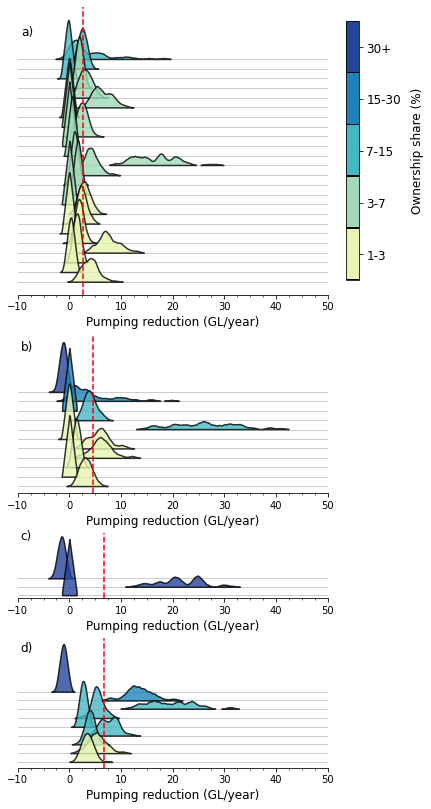

In [47]:
### 4-part figure with district-level AP MC results, 4 example partnerships
import matplotlib.gridspec as gridspec

solns = ['soln196', 'soln1224', 'soln2', 'soln599']
labels = ['a)', 'b)', 'c)','d)']
fig = plt.figure(figsize=(7,14))
gs = gridspec.GridSpec(nrows=4, ncols=2, height_ratios=[20,11,4.5,9], width_ratios=[5,1], hspace=0.25, wspace=0.1)
for row, soln in enumerate(solns):
    ax0 = fig.add_subplot(gs[row, 0])
    results_soln = results.loc[results['label'] == soln]
    
    ### get partners with nonzero shares, ordered by share
    sharecols = [c for c in results_soln.columns if 'share' in c]
    partners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] > 0]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in partners]
    order = np.argsort(shares)[::-1]
    shares = [shares[o] for o in order]
    partners = [partners[o] for o in order]
    
    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_baseline - mc_soln, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])

    ## filter for cwg
    df_mc = df_mc.loc[:, [f'{d}_avg_pumping' for d in partners]] * kaf_to_gl
    df_mc.columns = [f'{d}_ap' for d in partners]
    
    ridgesep = 0.1
    xmin = -10
    xmax = 50
    for i,d in enumerate(partners):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax0.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_ap'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax0.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ax0.axvline(results_soln['ap_p'].iloc[0] / len(partners), color='r', ls='--')
    ax0.set_yticks([])
    ax0.xaxis.set_major_locator(MultipleLocator(10))
    ax0.xaxis.set_minor_locator(MultipleLocator(2.5))

    ax0.set_xlim([xmin, xmax])
#     ax0.set_ylabel('Districts')#\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
#     if row == 3:
    ax0.set_xlabel('Pumping reduction (GL/year)', fontsize=fontsize)
    ax0.spines[['top', 'left', 'right']].set_visible(False)

    
    ### label subfigs
    ax0.annotate(labels[row], xy=(0.01,0.9), xycoords='axes fraction', fontsize=fontsize)

### add colorbar 
ax2 = fig.add_subplot(gs[0,1])
ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
cb = plt.colorbar(mappable_even, ax=ax2, ticks=[3/12,5/12,7/12,9/12,11/12], shrink=0.9, fraction=1)
_ = cb.ax.set_yticklabels(['1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)
_ = cb.ax.set_ylim([2/12,1])

plt.savefig(f'{fig_dir}partners_ap_pdfs.png', bbox_inches='tight', dpi=300)


NameError: name 'baseline' is not defined

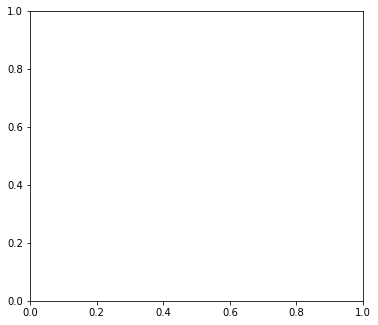

In [32]:
### 4-part figure with district-level AP MC results, for both partners & non-partnes, 4 example partnerships
import matplotlib.gridspec as gridspec

solns = ['soln196', 'soln1224', 'soln2', 'soln599']
labels = ['a)', 'b)', 'c)','d)']
fig = plt.figure(figsize=(14,12))
gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1,1,], width_ratios=[5,5,1], hspace=0.25, wspace=0.1)
for count, soln in enumerate(solns):
    row = int(count/2)
    col = count % 2
    ax0 = fig.add_subplot(gs[row, col])
    results_soln = results.loc[results['label'] == soln]
    
    ### order all districts (partners + non-partners) by share
    sharecols = [c for c in results_soln.columns if 'share' in c]
    partners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] > 0]
    districts = [c.split('_')[1] for c in sharecols]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in districts]
    order = np.argsort(shares)[::-1]
    shares = [shares[o] for o in order]
    districts = [districts[o] for o in order]
    
    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])

    ## filter for cwg
    df_mc = df_mc.loc[:, [f'{d}_avg_captured_water' for d in districts]] * kaf_to_gl
    df_mc.columns = [f'{d}_cwg' for d in districts]
    
    ridgesep = 0.1
    xmin = -55
    xmax = 55
    for i,d in enumerate(districts):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax0.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_cwg'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax0.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ax0.axvline(results_soln['cwg_p'].iloc[0] / len(partners), color='r', ls='--')
    ax0.axvline((df_mc.sum(axis=1).mean() - results_soln['cwg_p'].iloc[0]) / (len(districts) - len(partners)), color='r', ls=':')
    
    ax0.set_yticks([])
    ax0.xaxis.set_major_locator(MultipleLocator(10))
    ax0.xaxis.set_minor_locator(MultipleLocator(2.5))

    ax0.set_xlim([xmin, xmax])
#     ax0.set_ylabel('Districts')#\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
#     if row == 3:
    ax0.set_xlabel('Captured water gain (GL/year)', fontsize=fontsize)
    ax0.spines[['top', 'left', 'right']].set_visible(False)

    
    ### label subfigs
    ax0.annotate(labels[count], xy=(0.01,0.9), xycoords='axes fraction', fontsize=fontsize)

### add colorbar 
ax2 = fig.add_subplot(gs[0,2])
ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
cb = plt.colorbar(mappable_even, ax=ax2, ticks=[1/12,3/12,5/12,7/12,9/12,11/12], shrink=0.9, fraction=1)
_ = cb.ax.set_yticklabels(['0', '1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)

plt.savefig(f'{fig_dir}alldistricts_cwg_pdfs.png', bbox_inches='tight', dpi=300)


In [ ]:
### 4-part figure with district-level AP MC results, for both partners & non-partnes, 4 example partnerships
import matplotlib.gridspec as gridspec

solns = ['soln196', 'soln1224', 'soln2', 'soln599']
labels = ['a)', 'b)', 'c)','d)']
fig = plt.figure(figsize=(14,12))
gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1,1,], width_ratios=[5,5,1], hspace=0.25, wspace=0.1)
for count, soln in enumerate(solns):
    row = int(count/2)
    col = count % 2
    ax0 = fig.add_subplot(gs[row, col])
    results_soln = results.loc[results['label'] == soln]
    
    ### order all districts (partners + non-partners) by share
    sharecols = [c for c in results_soln.columns if 'share' in c]
    districts = [c.split('_')[1] for c in sharecols]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in districts]
    order = np.argsort(shares)[::-1]
    shares = [shares[o] for o in order]
    districts = [districts[o] for o in order]
    
    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_baseline - mc_soln, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])

    ## filter for cwg
    df_mc = df_mc.loc[:, [f'{d}_avg_pumping' for d in districts]] * kaf_to_gl
    df_mc.columns = [f'{d}_ap' for d in districts]
    
    ridgesep = 0.1
    xmin = -15
    xmax = 55
    for i,d in enumerate(districts):
        ### set bottom of "ridge" in decreasing order (smallest share at bottom)
        bottom = (-i * ridgesep)
        ax0.axhline(bottom, color='0.8', zorder=1, lw=1)

        ### evaluate & plot kde
        c = f'{d}_ap'
        kde_district = sm.nonparametric.KDEUnivariate(df_mc[c])
        kde_district.fit(kernel='tri', fft=False, bw=1.5)
        x = np.arange(xmin, xmax, 0.1)
        y = []
        for xx in x:
            yy = kde_district.evaluate(xx)
            if np.isnan(yy):
                y.append(0.)
            else:
                y.append(yy[0])
        y = np.array(y)
        color = cmap_class(shares[i])
        ax0.fill_between(x, y + bottom, bottom, where=(y > 0.00005), lw=1.5, alpha=0.8, zorder=2, fc = color, ec = 'k')

    ax0.axvline(results_soln['ap_p'].iloc[0] / len(partners), color='r', ls='--')
    ax0.axvline((df_mc.sum(axis=1).mean() - results_soln['ap_p'].iloc[0]) / (len(districts) - len(partners)), color='r', ls=':')
        
    ax0.set_yticks([])
    ax0.xaxis.set_major_locator(MultipleLocator(10))
    ax0.xaxis.set_minor_locator(MultipleLocator(2.5))

    ax0.set_xlim([xmin, xmax])
#     ax0.set_ylabel('Districts')#\n' + r'(increasing ownership share $\rightarrow$)', fontsize=fontsize)
#     if row == 3:
    ax0.set_xlabel('Averted pumping (GL/year)', fontsize=fontsize)
    ax0.spines[['top', 'left', 'right']].set_visible(False)

    
    ### label subfigs
    ax0.annotate(labels[count], xy=(0.01,0.9), xycoords='axes fraction', fontsize=fontsize)

### add colorbar 
ax2 = fig.add_subplot(gs[0,2])
ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
cb = plt.colorbar(mappable_even, ax=ax2, ticks=[1/12,3/12,5/12,7/12,9/12,11/12], shrink=0.9, fraction=1)
_ = cb.ax.set_yticklabels(['0', '1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize, labelpad=10)

plt.savefig(f'{fig_dir}alldistricts_ap_pdfs.png', bbox_inches='tight', dpi=300)


soln1224, n_p, 11.0, 11.0 (1.0), 11.0 (1.0
soln1224, cwg_p, 116.08832722461901, 158.94961643810325 (1.369212738594743), 70.8065221706482 (0.6099366220829837
soln1224, ap_p, 50.02690969671455, 74.76034666076367 (1.4944026547710874), 23.21822254823123 (0.4641146672658866
soln1224, cwg_np, -25.97615084025641, -2.481739262514213 (0.0955391458024701), -85.05114683604103 (3.2742012994563243
soln1224, cog_wp_p90, 129.87373624581724, 1000.0 (7.699786183922974), 103.75855128282502 (0.7989186596313596
soln2, n_p, 3.0, 3.0 (1.0), 3.0 (1.0
soln2, cwg_p, 48.817379743080494, 65.1049763883724 (1.3336434018173735), 30.630489936168473 (0.627450512448082
soln2, ap_p, 19.822239002246, 30.915073189904646 (1.559615600760426), 10.83211128231302 (0.5464625505264903
soln2, cwg_np, -14.34381984388425, -1.1239709987818312 (0.07835925234804568), -36.85026258972257 (2.569068978193724
soln2, cog_wp_p90, 62.21733007564514, 153.73846487529391 (2.4709910355904934), 44.31282817618086 (0.7122264507702981
soln375, n_p, 

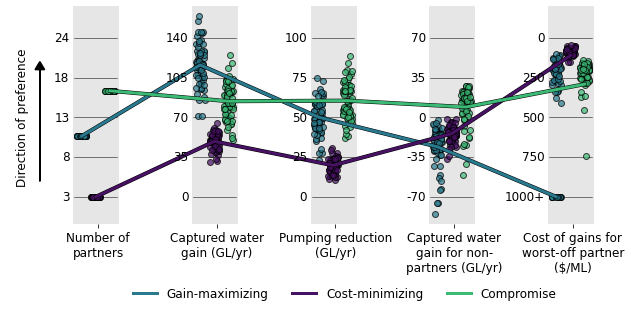

In [131]:
### remake parallel axis plot with individual states of the world as dots
from statistics import quantiles

# solns = ['soln1293', 'soln196', 'soln1224', 'soln2', 'soln599']
solns = ['soln1224', 'soln2', 'soln375'] #'soln599', soln196


### get MC objectives for different solns, compare across objectives
with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
    mc_baseline = f[baseline][...].transpose()

    ### now get cwg_p
    for count, soln in enumerate(solns):
        dvnames = f[soln].attrs['dv_names'][1:]
        dvs = f[soln].attrs['dvs'][1:]
        partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
        nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
        mc_soln = f[soln][...].transpose()
        df_mc_soln = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])
        cwg_p_soln = pd.DataFrame(df_mc_soln[[d + '_avg_captured_water' for d in partners]].sum(axis=1) * kaf_to_gl)
        cwg_p_soln['soln'] = soln
        cwg_p_soln['obj'] = 'cwg_p'
        if count == 0:
            df_overall = cwg_p_soln
        else:
            df_overall = df_overall.append(cwg_p_soln)
            
    ### now do ap_p
    for count, soln in enumerate(solns):
        dvnames = f[soln].attrs['dv_names'][1:]
        dvs = f[soln].attrs['dvs'][1:]
        partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
        nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
        mc_soln = f[soln][...].transpose()
        df_mc_soln = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])
        ap_p_soln = pd.DataFrame(-df_mc_soln[[d + '_avg_pumping' for d in partners]].sum(axis=1) * kaf_to_gl)
        ap_p_soln['soln'] = soln
        ap_p_soln['obj'] = 'ap_p'
        df_overall = df_overall.append(ap_p_soln)
        
    ### now do cwg_np
    for count, soln in enumerate(solns):
        dvnames = f[soln].attrs['dv_names'][1:]
        dvs = f[soln].attrs['dvs'][1:]
        partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
        nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
        mc_soln = f[soln][...].transpose()
        df_mc_soln = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])
        cwg_np_soln = pd.DataFrame(df_mc_soln[[d + '_avg_captured_water' for d in nonpartners]].sum(axis=1) * kaf_to_gl)
        cwg_np_soln['soln'] = soln
        cwg_np_soln['obj'] = 'cwg_np'
        df_overall = df_overall.append(cwg_np_soln)
    
    ### now do cog_p_p90
    for count, soln in enumerate(solns):
        dvnames = f[soln].attrs['dv_names'][1:]
        dvs = f[soln].attrs['dvs'][1:]
        partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
        nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
        mc_soln = f[soln][...].transpose()
        df_mc_soln = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])
        cwg_p_soln = pd.DataFrame(df_mc_soln[[d + '_avg_captured_water' for d in partners]].sum(axis=1) * kaf_to_gl)   
        cap = 1000
        project = projects[int(f[soln].attrs['dvs'][0])]
        annual_debt_payment = annual_debt_payment_dict[project]
        cog_p_p90_soln = (annual_debt_payment) / (cwg_p_soln) / 1000
        cog_p_p90_soln[cog_p_p90_soln > cap] = cap
        cog_p_p90_soln[cog_p_p90_soln < 0] = cap
        cog_p_p90_soln['soln'] = soln
        cog_p_p90_soln['obj'] = 'cog_p_p90'
        df_overall = df_overall.append(cog_p_p90_soln)
        
    ### now do cog_wp_p90
    for count, soln in enumerate(solns):
        dvnames = f[soln].attrs['dv_names'][1:]
        dvs = f[soln].attrs['dvs'][1:]
        partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
        nonpartners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) == 0]
        cap = 1000
        project = projects[int(f[soln].attrs['dvs'][0])]
        annual_debt_payment = annual_debt_payment_dict[project]
        partner_shares = [dvs[i] for i in range(len(dvs)) if (dvs[i]) > 0]
        for i,d in enumerate(partners):
            df_mc_soln[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / (df_mc_soln[d + '_avg_captured_water'] * kaf_to_gl) / 1000
            df_mc_soln[f'{d}_cog'].loc[df_mc_soln[f'{d}_cog'] > cap] = cap
            df_mc_soln[f'{d}_cog'].loc[df_mc_soln[f'{d}_cog'] < 0] = cap
        cog_wp_p90_soln = pd.DataFrame(df_mc_soln[[d + '_cog' for d in partners]].max(axis=1))
        cog_wp_p90_soln['soln'] = soln
        cog_wp_p90_soln['obj'] = 'cog_wp_p90'
        df_overall = df_overall.append(cog_wp_p90_soln)
    
    ### now do n_p
    for count, soln in enumerate(solns):
        dvnames = f[soln].attrs['dv_names'][1:]
        dvs = f[soln].attrs['dvs'][1:]
        partners = [dvnames[i] for i in range(len(dvs)) if (dvs[i]) > 0]
        n_p_soln = cog_wp_p90_soln
        n_p_soln[0] = len(partners)
        n_p_soln['obj'] = 'n_p'
        n_p_soln['soln'] = soln
        df_overall = df_overall.append(n_p_soln)
        
### rescale so y height is common
df_overall.columns = ['value', 'soln', 'obj']
df_overall['value_scaled'] = df_overall['value']

objs = ['n_p','cwg_p','ap_p','cwg_np','cog_wp_p90']
objmins = [3, 0, 0, -70, 0]
objmaxs = [24, 140, 100, 70, 1000]

for o,obj in enumerate(objs):
    if obj not in ['cog_p_p90', 'cog_wp_p90']:
        df_overall['value_scaled'].loc[df_overall['obj'] == obj] = (df_overall['value_scaled'].loc[df_overall['obj'] == obj] - objmins[o]) / (objmaxs[o] - objmins[o])
    else:
        df_overall['value_scaled'].loc[df_overall['obj'] == obj] = (objmaxs[o] - df_overall['value_scaled'].loc[df_overall['obj'] == obj]) / (objmaxs[o] - objmins[o])
        objmins[o], objmaxs[o] = objmaxs[o], objmins[o]
        
### remake parallel axis plot with individual states of the world as dots
fig, ax = plt.subplots(1,1,figsize=(11,4))
fontsize=12
cmap_vir = cm.get_cmap('viridis')
for s, soln in enumerate(solns):
    vals_exp, vals_scaled_exp = [], []
    for o, obj in enumerate(objs):
        vals = list(df_overall['value'].loc[np.logical_and(df_overall['obj'] == obj, df_overall['soln'] == soln)])
        vals_scaled = list(df_overall['value_scaled'].loc[np.logical_and(df_overall['obj'] == obj, df_overall['soln'] == soln)])
        color = cmap_vir((results.loc[results['label'] == soln, 'n_p'].iloc[0] -2) / 22)
        x = [o + 0.12*s] * len(vals_scaled) + np.random.uniform(-0.04,0.04, len(vals_scaled))
        ax.scatter([x], vals_scaled, color=color, edgecolor='k', alpha=0.7,)
        if 'cog' in obj:
            vals_scaled_exp.append(quantiles(vals_scaled, n=10)[0])
            vals_exp.append(quantiles(vals, n=10)[0])
        else:
            vals_scaled_exp.append(np.mean(vals_scaled))
            vals_exp.append(np.mean(vals))
            
        ### print range of values relative to metric
        print(f'{soln}, {obj}, {vals_exp[-1]}, {np.max(vals)} ({np.max(vals)/vals_exp[-1]}), {np.min(vals)} ({np.min(vals)/vals_exp[-1]}')

    ax.plot(np.arange(0.12*s, 0.12*s+len(objs)), vals_scaled_exp, color='k', lw=4, alpha=1)
    ax.plot(np.arange(0.12*s, 0.12*s+len(objs)), vals_scaled_exp, color=color, lw=3, alpha=1)
### add objective ranges etc
ax.set_xticks([])
ax.set_yticks([])
for i in range(len(objs)):
    ax.axvspan(i-0.07,i+0.31, color='0.9', zorder=-20)
    for y in np.arange(0,1.01, 0.25):
        ax.plot([i-0.06,i+0.3], [y,y], color='k', zorder=-19, lw=0.5)
        renorm = objmins[i] + y * (objmaxs[i] - objmins[i])
        renorm = str(int(renorm))
        if renorm == '1000':
            renorm = '1000+'
        ax.annotate(renorm,[i-0.1,y],ha='right', va='center', fontsize=fontsize)#, zorder=-19)
labels = ['Number of\npartners', 'Captured water\ngain (GL/yr)', 'Pumping reduction\n(GL/yr)', 
          'Captured water\ngain for non-\npartners (GL/yr)',#'Cost of gains\nfor whole\npartnership\n($/ML)',
          'Cost of gains for\nworst-off partner\n($/ML)']

for spine in ['top','bottom','left','right']:
    ax.spines[spine].set_visible(False)

if ideal == 'top':
    ax.arrow(-0.35,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
elif ideal == 'bottom':
    ax.arrow(-0.35,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
ax.annotate('Direction of preference', xy=(-0.5,0.5), ha='center', va='center', rotation=90, fontsize=fontsize)

_ = ax.set_xticks(np.arange(0.14, len(objs) - 0.85), labels, fontsize=fontsize)

### legend
leg = [Line2D([0], [0], color= cmap_vir((results.loc[results['label'] == solns[0], 'n_p'].iloc[0]-2) / 22), lw=3, label='Gain-maximizing'),
      Line2D([0], [0], color= cmap_vir((results.loc[results['label'] == solns[1], 'n_p'].iloc[0]-2) / 22), lw=3, label='Cost-minimizing'),
      Line2D([0], [0], color= cmap_vir((results.loc[results['label'] == solns[2], 'n_p'].iloc[0]-2) / 22), lw=3, label='Compromise')]
_ = ax.legend(handles=leg, loc='lower center', ncol=3, bbox_to_anchor=[0.55,-0.4], frameon=False, fontsize=fontsize)

plt.savefig(f'{fig_dir}paraxis_examples_MC.png', bbox_inches='tight', dpi=300)


### Maps

In [16]:
import geopandas as gpd
import contextily as cx
from generativepy.color import Color
from PIL import ImageColor
from matplotlib.colors import rgb2hex


#local data folder name
project_folder = 'maps/ca_geo'
projection_string = 'EPSG:4326'#project raster to data projection
projection_num = 4326
point_location_filename = project_folder + '/CALFEWS_RESERVOIRS.csv'#coordinates of map 'points'
shapefile_folder = project_folder + '/CALFEWS_shapes/'
districts_folder = project_folder + '/CALFEWS_shapes/Water_Districts/'
canal_folder = project_folder + '/CALFEWS_shapes/Canals_and_Aqueducts_local/'
raster_folder = project_folder + '/ca_satellite/'
outline_name = project_folder + '/CALFEWS_shapes/states.shp'#state outline
id4_name = project_folder + '/ZOB7_ID4_WGS1984/ZOB7_WGS1984.shp'

In [17]:
ag_keys = {
           'BDM': ['berrendamesawaterdistrict'], 'BLR': ['belridgewaterstoragedistrict'], 'BVA': ['buenavistawaterstoragedistrict'], 
           'CWO': ['cawelowaterdistrict'], 'HML': ['henrymillerwaterdistrict'], 'KND': ['kerndeltawaterdistrict'], 'LHL': ['losthillswaterdistrict'],
           'RRB': ['rosedale-riobravowaterstoragedistrict'], 'SMI': ['semitropicwaterservicedistrict'], 'THC': ['tehachapi-cummingscountywaterdistrict'], 
           'TJC': ['tejon-castacwaterdistrict'], 'WKN': ['westkernwaterdistrict'], 'WRM': ['wheelerridge-maricopawaterstoragedistrict'],
           'COB': ['bakersfieldcityof'], 'NKN': ['northkernwaterstoragedistrict'], 'ARV': ['arvin-edisonwaterstoragedistrict'],
           'PIX': ['pixleyirrigationdistrict'], 'DLE': ['delano-earlimartirrigationdistrict'], 'EXE': ['exeterirrigationdistrict'],
           'KRT': ['kern-tulare'], 'LND': ['lindmore'], 'LDS': ['lindsay-strathmoreirrigationdistric'],
           'LWT': ['lowertule'], 'PRT': ['portervilleirrigationdistrict'], 'SAU': ['saucelito'], 'SFW': ['shafter-wascoirrigationdistrict'],
           'SSJ': ['southernsanjoaquinmunicipalutilitydistrict'], 'TPD': ['teapot'], 'TBA': ['terrabellairrigationdistrict'], 'TUL': ['tulareirrigationdistrict'],
           'COF': ['fresnocityof'], 'FRS': ['fresnoirrigation'], 
           'DLR': ['dudleyridge'], 'TLB': ['tularelake'], 'KWD': ['kaweahdelta'], 'WSL': ['westlands'], 'SNL': ['sanluiswater'], 
           'PNC': ['panoche'], 'DLP': ['delpuerto'], 'CWC': ['chowchillawaterdistrict'], 'MAD': ['maderairrigationdistrict'], 
           'CNS': ['consolidated'], 'ALT': ['altairrigationdistrict'],  
           'KWB': ['kernwaterbank'],
         
          # 'OFK': ['hillsvalley', 'orangecoveirrigationdistrict','lewiscreek','lindsaycityof','stonecorral' ,
           #        'ivanhoeirrigationdistrict', 'orangecovecityof', 'tri-valleywaterdistrict', 'internationalwaterdistrict', 
            #       'garfield', 'hiddenlakes', 'fresnocountywaterworksdistrictno18'], #'gravely'
           'KRWA': ['kingsriverwaterdistrict'],#, 'kingsriverconservationdistrict'],
           #'OEX': ['sanluiscanalcompany', 'centralcalifornia', 'firebaughcanalcompany', 'columbiacanalcompany'],
           #'OCD': ['bantacarbonairrigationdistrict, byronbethanyirrigationdistrict', 'eaglefield', 'mercysprings',
            #       'oralomawaterdistrict', 'pajarovalleywatermanagementagency', 'pattersonwaterdistrict', 'westsidewaterdistrict',
             #      'weststanislaus', 'coelho','fresnoslough', 'jamesirrigationdistrict', 'lagunawaterdistrict',
              #     '1606', 'tranquilityirrigationdistrict', 'avenal', 'coalingacityof', 'huroncityof', 'pacheco', 
               #    'tranquilitypublicutilitydistrict']#, 'tracycityof'
          }

#                   'OXV': ['hillsvalley', 'tri-valleywaterdistrict']
#,                  'KCWA': 'kerncountywateragency', }
#                   'ID4': '4', 
#                   'OKW': 'otherkaweah',
            #       'OTL': 'othertule', 
#                  'OSW': 'otherswp', 

#                  'SOC': 'socal', 'SOB': 'southbay', 'CCA': 'centralcoast', 
          

In [18]:
districts_MOO = ["FRS","COF","TUL","KWD","EXE","LDS", "LND","PRT","LWT","TPD","SAU","TBA","PIX","DLE","KRT","SSJ", 
                 "SFW","NKN","ARV", "DLR","SMI","TJC","BLR","LHL","BDM","WRM","COB","BVA","CWO","HML",
                        "KND","RRB","CNS","ALT","CWC","MAD"] #"ID4","SOC","SOB","CCA"
ag_keys = {k: ag_keys[k] for k in districts_MOO}

In [19]:
def district_match(shp_names, name):
    shp_names_lc = [k.lower().strip().replace(' ','') for k in shp_names]
    is_match = [name in k for k in shp_names_lc]
    return [i for i in range(len(is_match)) if is_match[i]], [shp_names_lc[i] for i in range(len(is_match)) if is_match[i]]

### read in shapefile of all water districts
ags = gpd.read_file(districts_folder + 'Water_Districts.shp')
ags = ags.to_crs(crs=26944)  ### California Zone 4 NAD83 projection

ags.sort_values('AGENCYNAME', inplace=True)

### filter to only keep districts in study area
idxs = []
names = []
keys = []
for k,vs in ag_keys.items():
    for v in vs:
        idx, name = district_match(ags.AGENCYNAME, v)
        idxs += idx
        names += name
        for i in range(len(idx)):
            keys.append(k)
            
ags = ags.iloc[idxs,:]
ags.reset_index(drop=True, inplace=True)
ags['area'] = ags.geometry.area
ags['district'] = keys
ags

,OBJECTID,AGENCYNAME,SOURCE,AGENCYUNIQ,LASTMODIFI,MODIFIEDBY,SOURCECOMM,Date_Data_,GlobalID,geometry,area,district
0,32,Fresno Irrigation District,SCRO,961.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{0EA9AE2A-51F2-4E0B-B3AA-E84D50D0DD42},"MULTIPOLYGON (((1934206.451 672662.007, 193422...",1.002697e+09,FRS
1,180,Fresno City Of Service area,SCRO,934.0,2016-05-23T14:09:59.000Z,SERYSIAN,None,2013-11-07T00:00:00.000Z,{AA6B6103-329A-4605-A308-E734192C2597},"POLYGON ((1929741.292 673633.250, 1929742.629 ...",3.656156e+08,COF
2,66,Tulare Irrigation District,SCRO,2518.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{21D33668-AA85-4E44-BBE6-A1F051A1003A},"MULTIPOLYGON (((1966446.075 605033.731, 196661...",2.745212e+08,TUL
3,298,Kaweah Delta Water Conservation District,USBR-Federal,1278.0,2010-08-31T00:00:00.000Z,source,None,2010-08-31T00:00:00.000Z,{D6F406C5-16E7-433B-9287-1031BFF9232E},"POLYGON ((1980653.968 617522.656, 1980648.215 ...",1.376700e+09,KWD
4,76,Exeter Irrigation District,SCRO,864.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{2F22D595-2D84-4D01-849A-FFCA293922D8},"POLYGON ((1994403.411 614896.984, 1994385.233 ...",6.058793e+07,EXE
5,75,Lindsay - Strathmore Irrigation District,SCRO,1433.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{2684C64C-8EAA-46A5-851A-4C561C4A3EC2},"MULTIPOLYGON (((1992456.959 596578.363, 199258...",6.512974e+07,LDS
6,77,Lindmore Irrigation District,SCRO,1431.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{D15D4F24-D4D2-4136-8F8E-B6DF68186085},"MULTIPOLYGON (((1989353.313 600896.419, 198935...",1.104778e+08,LND
7,78,Porterville Irrigation District,SCRO,1958.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{40209707-9397-432C-B79D-67B8A8CD2502},"POLYGON ((1995796.228 578061.462, 1995591.805 ...",6.929171e+07,PRT
8,70,Lower Tule River Irrigation District,SCRO,1500.0,2017-01-10T10:03:55.000Z,SERYSIAN,None,2013-11-07T00:00:00.000Z,{C13BDBF9-E8BB-4C8C-9DD5-6D99198A939D},"POLYGON ((1987133.815 586900.607, 1987128.593 ...",4.149441e+08,LWT
9,79,Tea Pot Dome Water District,SCRO,2450.0,2013-11-07T00:00:00.000Z,source,None,2013-11-07T00:00:00.000Z,{A864C43D-79F2-4462-A1D0-FEAE51E08155},"MULTIPOLYGON (((1997989.927 574435.459, 199799...",1.405271e+07,TPD


In [20]:
# ### get id4 and add to ags
# id4 = gpd.read_file(id4_name)
# id4 = id4.to_crs(ags.crs)
# id4['district'] = 'ID4'

# ags = ags.append(id4)

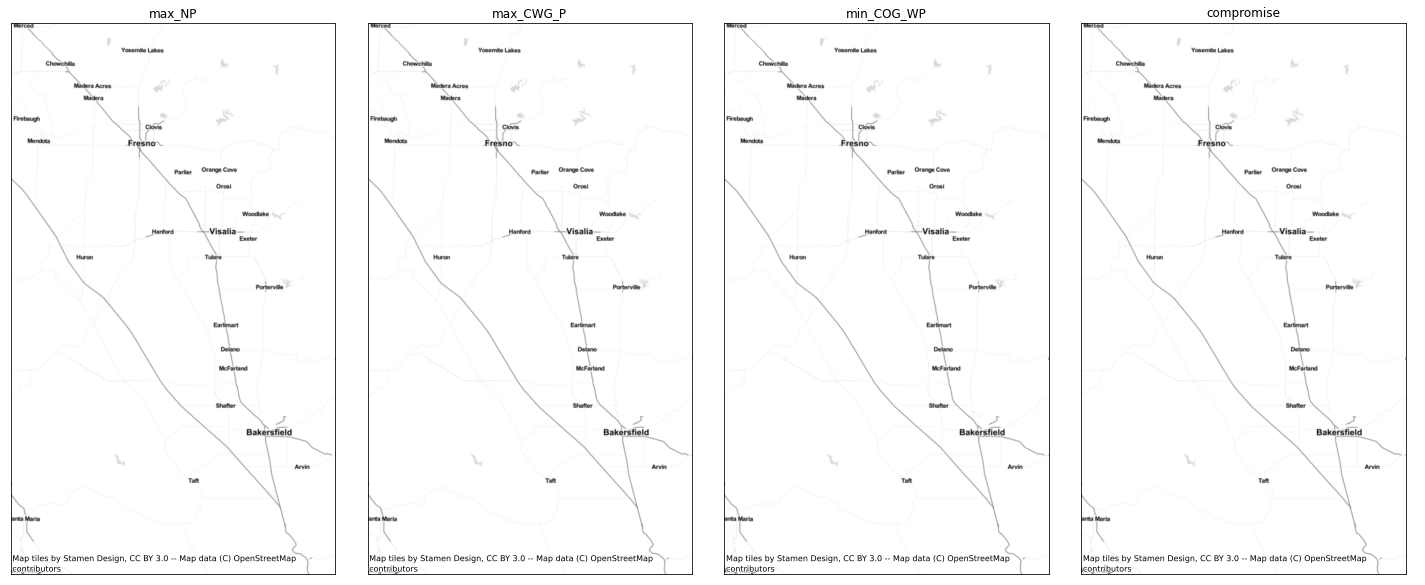

In [81]:
### share-colored maps for 4 example partnerships
fig = plt.figure(figsize=(25,25))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0.1)
for count, soln in enumerate(solns):
    ax0 = fig.add_subplot(gs[count])
    results_soln = results.loc[results['label'] == soln]
    
    ### order all districts (partners + non-partners) by share
    sharecols = [c for c in results_soln.columns if 'share' in c]
    districts = [c.split('_')[1] for c in sharecols]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in districts]
    share_dict = {k: v for k,v in zip(districts, shares)}
    
    ### get shares for districts in gpd
    def get_share(d):
        try:
            share = share_dict[d]
        except:
            share = 0
        return share
            
    ags['share'] = [get_share(d) for d in ags['district']]
    ags['color_share'] = [cmap_class(s) for s in ags['share']]

    ### first, plot districts with zero participation except COF&TUL, with no color but outlined in black
    condition = np.logical_and(ags['share'] == 0, [d not in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('share', ax=ax0, color='0.9', edgecolor='k', alpha=alpha)
    ### now plot districts with non-zero participation, except COF & TUL
    condition = np.logical_and(ags['share'] > 0, [d not in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('share', ax=ax0, color=ags.loc[condition, 'color_share'], edgecolor='k', alpha=alpha)
    ### lastly plot COF & TUL, which are overlapping and need to be on top
    condition = [d in ('COF', 'TUL') for d in ags['district']]
    ags.loc[condition, :].plot('share', ax=ax0, color=ags.loc[condition, 'color_share'], edgecolor='k', alpha=alpha)


    ### basemap
    cx.add_basemap(ax = ax0, crs=ags.crs, source=cx.providers.Stamen.TonerLite)

    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_title(label_dict[soln])
    
# plt.savefig(f'{fig_dir}exPartnership_shares.jpg', bbox_inches='tight', dpi=300)


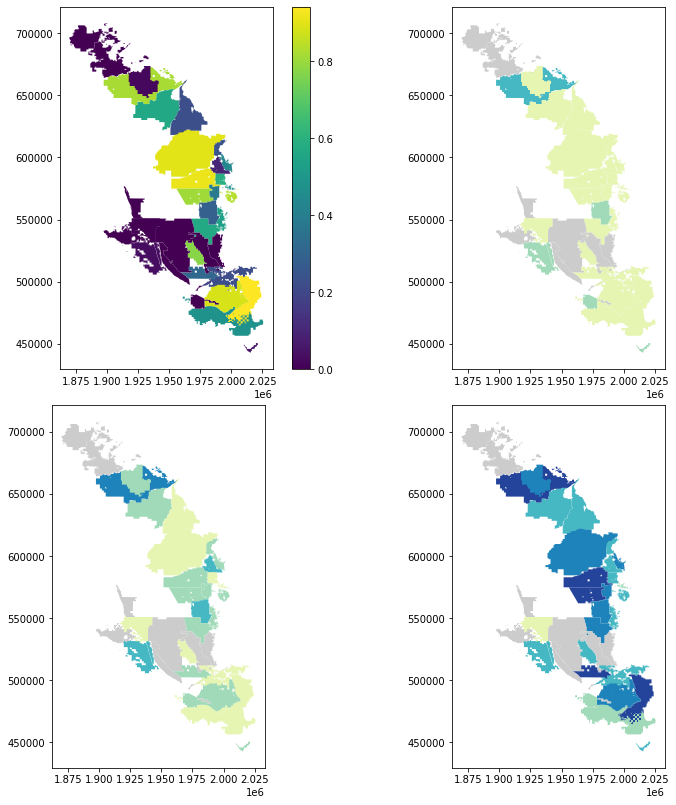

In [82]:
### maps showing the fraction of time each district is a partner, and its min/median/max share across all pareto partnerships 
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1,1], width_ratios=[1,1], hspace=0.1, wspace=0.05)

### plot fraction inclusion for each district
ax = fig.add_subplot(gs[0, 0])
def get_inclusion_frac(d):
    try:
        frac = np.mean(df_shares['share_'+d] > 0)
    except:
        frac = 0
    return frac

ags['inclusion_frac'] = [get_inclusion_frac(d) for d in ags['district']]
ags.plot('inclusion_frac', ax=ax, legend=True)
ags.head()

### plot min share when included
ax = fig.add_subplot(gs[0, 1])
def get_min_share(d):
    try:
        share = np.min(df_shares['share_'+d].loc[df_shares['share_'+d] > 0])
    except:
        share = 0
    return share

ags['min_share'] = [get_min_share(d) for d in ags['district']]
ags['color_min_share'] = [cmap_class(s) for s in ags['min_share']]
ags.plot('min_share', ax=ax, color=ags['color_min_share'], legend=True)
ags.head()

### plot median share when included
ax = fig.add_subplot(gs[1, 0])
def get_median_share(d):
    try:
        share = np.median(df_shares['share_'+d].loc[df_shares['share_'+d] > 0])
    except:
        share = 0
    return share

ags['median_share'] = [get_median_share(d) for d in ags['district']]
ags['color_median_share'] = [cmap_class(s) for s in ags['median_share']]
ags.plot('median_share', ax=ax, color=ags['color_median_share'], legend=True)
ags.head()

### plot max share when included
ax = fig.add_subplot(gs[1, 1])
def get_max_share(d):
    try:
        share = np.max(df_shares['share_'+d].loc[df_shares['share_'+d] > 0])
    except:
        share = 0
    return share

ags['max_share'] = [get_max_share(d) for d in ags['district']]
ags['color_max_share'] = [cmap_class(s) for s in ags['max_share']]
ags.plot('max_share', ax=ax, color=ags['color_max_share'], legend=True)
ags.head()

plt.savefig(f'{fig_dir}district_share_distributions.png', bbox_inches='tight', dpi=300)


In [127]:
# # https://chart-studio.plotly.com/~empet/15191/texas-bivariate-choropleth-assoc/#/
# jstevens = ["#e8e8e8", "#ace4e4", "#5ac8c8", "#dfb0d6", "#a5add3", 
#             "#5698b9", "#be64ac", "#8c62aa", "#3b4994"]  # second example, pink/aqua

# # jstevens = ["#e8e8e8", "#e4acac", "#c85a5a", "#b0d5df", "#ad9ea5", 
# #             "#985356", "#64acbe", "#627f8c", "#574249"]  # first example, blue/red

# # jstevens = ["#e8e8e8", "#b0d5df",  "#64acbe", "#e4acac", "#ad9ea5", 
# #             "#627f8c", "#c85a5a", "#985356","#574249"]  # first example, but transpose

# share_bounds = [0.05, 0.1, 1]
# inclusion_bounds = [0.25, 0.75, 1]

# jstevens = ['#E8E8E8', '#C5E0E0', '#A1D8D8', '#7ED0D0', '#5AC8C8',
#             '#DEC7D9', '#BBBFD2', '#98B8CA', '#75B0C3', '#52A8BB',
#             '#D3A6CA', '#B19FC3', '#8F98BC', '#6D90B5', '#4B89AE',
#             '#C985BB', '#A87EB5', '#8677AE', '#6570A8', '#4369A1',
#             '#BE64AC', '#9D5DA6', '#7D57A0', '#5C509A', '#3B4994']
# share_bounds = [0.01, 0.03, 0.07, 0.15, 1]
# inclusion_bounds = [0.01, 0.25, 0.5, 0.75, 1]

share_bounds = [0.03, 0.07, 0.15, 0.6]
share_bound_labels = ['1-3', '3-7', '7-15', '15+']

inclusion_bounds = [0.25, 0.5, 0.75, 1]
inclusion_bound_labels = ['0-25', '25-50', '50-75', '75-100']
assert len(share_bounds) == len(inclusion_bounds)


### function to convert hex color to rgb to Color object (generativepy package)
def hex_to_Color(hexcode):
    rgb = ImageColor.getcolor(hexcode, 'RGB')
    rgb = [v/256 for v in rgb]
    rgb = Color(*rgb)
    return rgb

### get corner colors from https://www.joshuastevens.net/cartography/make-a-bivariate-choropleth-map/
# c00 = hex_to_Color('#e8e8e8')
# c10 = hex_to_Color('#be64ac')
# c01 = hex_to_Color('#5ac8c8')
# c11 = hex_to_Color('#000000')

c00 = hex_to_Color('#ffffcb')    ### maybe
c10 = hex_to_Color('#be64ac')
c01 = hex_to_Color('#5ac8c8')
c11 = hex_to_Color('#3b4994')

# c00 = hex_to_Color('#e8e8e8')
# c10 = hex_to_Color('#64acbe')
# c01 = hex_to_Color('#c85a5a')
# c11 = hex_to_Color('#574249')

# c00 = hex_to_Color('#e8e8e8')
# c10 = hex_to_Color('#9972af')
# c01 = hex_to_Color('#c8b35a')
# c11 = hex_to_Color('#804d36')

# c00 = hex_to_Color('#e8e8e8')
# c10 = hex_to_Color('#d8b365')
# c01 = hex_to_Color('#5ab4ac')
# c11 = hex_to_Color('#000000')

# c00 = hex_to_Color('#ffffbf')
# c10 = hex_to_Color('#fc8d59')
# c01 = hex_to_Color('#91bfdb')
# c11 = hex_to_Color('#000000')

# c00 = hex_to_Color('#ffffbf')
# c10 = hex_to_Color('#d7191c')
# c01 = hex_to_Color('#2c7bb6')
# c11 = hex_to_Color('#000000')

# c00 = hex_to_Color('#ffffbf')  ## maybe
# c10 = hex_to_Color('#2c7bb6')
# c01 = hex_to_Color('#d7191c')
# c11 = hex_to_Color('#000000')

# c00 = hex_to_Color('#ffffbf')  ## maybe
# c01 = hex_to_Color('#2c7bb6')
# c10 = hex_to_Color('#d7191c')
# c11 = hex_to_Color('#000000')

# c00 = hex_to_Color('#dbd7d2')  
# c10 = hex_to_Color('#be64ac')
# c01 = hex_to_Color('#5ac8c8')
# c11 = hex_to_Color('#000000')

# c00 = hex_to_Color('#e8fa5bff')
# c10 = hex_to_Color('#f68f46ff')
# c01 = hex_to_Color('#593d9cff')
# c11 = hex_to_Color('#042333ff')

# c00 = hex_to_Color('#f68f46ff')
# c10 = hex_to_Color('#e8fa5bff')
# c01 = hex_to_Color('#593d9cff')
# c11 = hex_to_Color('#042333ff')

# c00 = hex_to_Color('#7ad151ff')
# c10 = hex_to_Color('#fde725ff')
# c01 = hex_to_Color('#39568cff')
# c11 = hex_to_Color('#440154ff')

# c10 = hex_to_Color('#7ad151ff')
# c00 = hex_to_Color('#fde725ff')
# c11 = hex_to_Color('#39568cff')
# c01 = hex_to_Color('#440154ff')

# c00 = hex_to_Color('#dbd7d2')
# c10 = hex_to_Color('#a6611a')
# c01 = hex_to_Color('#018571')
# c11 = hex_to_Color('#000000')

c00 = hex_to_Color('#ffffcb')    ### this one
c10 = hex_to_Color('#a6611a')
c01 = hex_to_Color('#018571')
c11 = hex_to_Color('#000000')

# c00 = hex_to_Color('#ffffcb')
# c10 = hex_to_Color('#0343df')
# c01 = hex_to_Color('#e50000')
# c11 = hex_to_Color('#580f41')

# c00 = hex_to_Color('#ffffcb')
# c10 = hex_to_Color('#1e90ff')
# c01 = hex_to_Color('#32cd32')
# c11 = hex_to_Color('#001a1a')

# c00 = hex_to_Color(rgb2hex(cmap_class(0.02)))    ### maybe
# c10 = hex_to_Color('#be64ac')
# c01 = hex_to_Color(rgb2hex(cmap_class(0.08)))
# c11 = hex_to_Color(rgb2hex(cmap_class(0.5)))

# c00 = hex_to_Color(rgb2hex(cmap_class(0.02)))  ## maybe
# c01 = hex_to_Color(rgb2hex(cmap_class(0.2)))
# c10 = hex_to_Color('#d7191c')
# c11 = hex_to_Color('#000000')

### now create square grid of colors, using color interpolation from generativepy package
num_grps = len(share_bounds)
c00_to_c10 = []
c01_to_c11 = []
colorlist = []
for i in range(num_grps):
    c00_to_c10.append(c00.lerp(c10, 1/(num_grps-1) * i))
    c01_to_c11.append(c01.lerp(c11, 1/(num_grps-1) * i))
for i in range(num_grps):
    for j in range(num_grps):
        colorlist.append(c00_to_c10[i].lerp(c01_to_c11[i], 1/(num_grps-1) * j))

### convert back to hex color
colorlist = [rgb2hex([c.r, c.g, c.b]) for c in colorlist]


# ####################################
# ### method 2: qualitative/diverging + fade to white

# c_left = hex_to_Color('#dbd7d2')
# c03 = hex_to_Color('#d7191c')
# c13 = hex_to_Color('#fdae61')
# c23 = hex_to_Color('#abd9e9')
# c33 = hex_to_Color('#2c7bb6')

# c03_to_c33 = [c03, c13, c23, c33]

# ### now create square grid of colors, using color interpolation from generativepy package
# num_grps = len(share_bounds)
# colorlist = []
# for i in range(num_grps):
#     for j in range(num_grps):
#         colorlist.append(c_left.lerp(c03_to_c33[j], 1/(num_grps+1) * (i + 2)))

# ### convert back to hex color
# colorlist = [rgb2hex([c.r, c.g, c.b]) for c in colorlist]


# ####################################
# ### method 3: starting with rgb from colorpalette
# cmap = cm.get_cmap('RdYlBu')

# ### function to convert hex color to rgb to Color object (generativepy package)
# def cmap_to_Color(v):
#     rgb = cmap(v)
#     rgb = Color(*rgb)
#     return rgb

# c00 = cmap_to_Color(0.5)
# c10 = cmap_to_Color(.99)
# c01 = cmap_to_Color(0.01)
# c11 = hex_to_Color('#000000')

# ### now create square grid of colors, using color interpolation from generativepy package
# num_grps = len(share_bounds)
# c00_to_c10 = []
# c01_to_c11 = []
# colorlist = []
# for i in range(num_grps):
#     c00_to_c10.append(c00.lerp(c10, 1/(num_grps-1) * i))
#     c01_to_c11.append(c01.lerp(c11, 1/(num_grps-1) * i))
# for i in range(num_grps):
#     for j in range(num_grps):
#         colorlist.append(c00_to_c10[i].lerp(c01_to_c11[i], 1/(num_grps-1) * j))

# ### convert back to hex color
# colorlist = [rgb2hex([c.r, c.g, c.b]) for c in colorlist]

In [22]:
### get other shapefiles
from shapely.geometry import Point, Polygon, LineString, MultiLineString

states = gpd.read_file(shapefile_folder + 'states.shp')
states = states.to_crs(ags.crs)

canals = gpd.read_file(shapefile_folder + 'drawings-line.shp')
canals = canals.to_crs(ags.crs)
canals_fkc = canals.loc[canals['Name'] == 'fkc']
canals_other = canals.loc[canals['Name'] != 'fkc']

tlb = gpd.read_file(shapefile_folder + 'Tulare_Basin-line.shp')
tlb = tlb.to_crs(ags.crs)

sjr = gpd.read_file(shapefile_folder + 'San_Joaquin-line.shp')
sjr = sjr.to_crs(ags.crs)

kings = gpd.read_file(shapefile_folder + 'kings_ext.shp')
kings = kings.to_crs(ags.crs)

res = pd.read_csv(point_location_filename)
geometry = [Point(xy) for xy in zip(res['LONG'], res['LAT'])]
res_gdf = gpd.GeoDataFrame(res, crs = 4326, geometry = geometry)
res_gdf = res_gdf.to_crs(ags.crs)
res_gdf = res_gdf.loc[[name in ['MILLERTON','PINE FLAT','KAWEAH','SUCCESS','ISABELLA','SAN LUIS'] for name in res_gdf['NAME']]]
res_gdf

,Unnamed: 0,BASIN,LAT,LONG,NAME,STATION,geometry
7,7,SAN JOAQUIN RIVER,37.0000,-119.7030,MILLERTON,MIL,POINT (1937427.730 685167.275)
8,8,KINGS RIVER,36.8316,-119.3250,PINE FLAT,PFT,POINT (1971009.121 666299.808)
9,9,KAWEAH RIVER,36.4166,-119.0030,KAWEAH,KWH,POINT (1999730.953 620200.583)
10,10,TULE RIVER,36.0583,-118.9180,SUCCESS,TLR,POINT (2007387.898 580446.926)
11,11,KERN RIVER,35.6466,-118.4789,ISABELLA,ISB,POINT (2047196.834 534889.598)
12,12,CALIFORNIA AQUEDUCT,37.0980,-121.0510,SAN LUIS,SNL,POINT (1817690.109 697760.580)


ConnectionError: HTTPSConnectionPool(host='stamen-tiles-a.a.ssl.fastly.net', port=443): Max retries exceeded with url: /terrain/9/83/198.png (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fa3ec10d8b0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

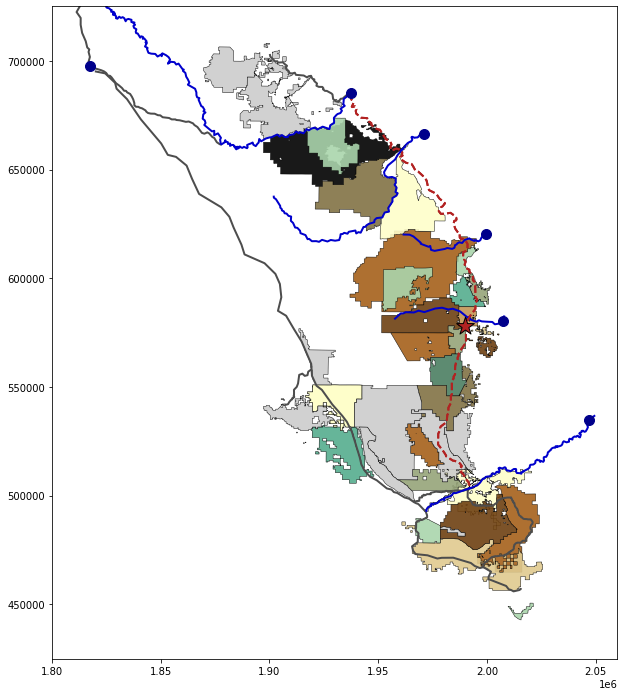

In [23]:
### test bivariate choropleth 
alpha = 0.9
fontsize = 14
figtype = 'Median' # 'Median','Min','Max'
satisfice_only = False

if satisfice_only:
    results_fig = results.loc[satisfice, :]
else:
    results_fig = results   
    
fig, ax = plt.subplots(1,1, figsize=(12,12))#, gridspec_kw={'width_ratios': [0.75,0.25], 'wspace':0.3})

### plot fraction inclusion for each district
# nonpartnercolor = '0.9'
def get_bivariate_choropleth_color(district, inclusion_frac, median_share):
    d = 'share_' + district
    try:
        count = 0
        for inclusion_bound in inclusion_bounds:
            for share_bound in share_bounds:
                if inclusion_frac == 0:
                    return nonpartnercolor
                if inclusion_frac <= inclusion_bound:
                    if median_share <= share_bound:
                        return colorlist[count]
                count += 1
    except:
        return nonpartnercolor
    
def get_inclusion_frac(d, df_solutions):
    try:
        frac = np.mean(df_solutions['share_'+d] > 0)
    except:
        frac = 0
    return frac

ags['inclusion_frac'] = [get_inclusion_frac(d, results_fig) for d in ags['district']]

### plot median share when included
def get_median_share(d, df_solutions):
    try:
        share = np.median(df_solutions['share_'+d].loc[df_solutions['share_'+d] > 0])
    except:
        share = 0
    return share

### plot min share when included
def get_min_share(d, df_solutions):
    try:
        share = np.min(df_solutions['share_'+d].loc[df_solutions['share_'+d] > 0])
    except:
        share = 0
    return share

### plot max share when included
def get_max_share(d, df_solutions):
    try:
        share = np.max(df_solutions['share_'+d].loc[df_solutions['share_'+d] > 0])
    except:
        share = 0
    return share
            


if figtype == 'Median':
    ags['median_share'] = [get_median_share(d, results_fig) for d in ags['district']]
    ags['color_bivariate'] = [get_bivariate_choropleth_color(d, ags['inclusion_frac'].loc[ags['district'] == d].values[0], 
                                                              ags['median_share'].loc[ags['district'] == d].values[0]) for d in ags['district']]
elif figtype == 'Min':
    ags['min_share'] = [get_min_share(d, results_fig) for d in ags['district']]
    ags['color_bivariate'] = [get_bivariate_choropleth_color(d, ags['inclusion_frac'].loc[ags['district'] == d].values[0], 
                                                          ags['min_share'].loc[ags['district'] == d].values[0]) for d in ags['district']]
elif figtype == 'Max':
    ags['max_share'] = [get_max_share(d, results_fig) for d in ags['district']]
    ags['color_bivariate'] = [get_bivariate_choropleth_color(d, ags['inclusion_frac'].loc[ags['district'] == d].values[0], 
                                                          ags['max_share'].loc[ags['district'] == d].values[0]) for d in ags['district']]

### first plot districts with non-zero participation, except COF & TUL
condition = np.logical_and(ags['color_bivariate'] != nonpartnercolor, [d not in ('COF', 'TUL') for d in ags['district']])
ags.loc[condition, :].plot('color_bivariate', ax=ax, color=ags.loc[condition, 'color_bivariate'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
### now plot COF & TUL, which are overlapping and need to be on top
condition = np.logical_and(ags['color_bivariate'] != nonpartnercolor, [d in ('COF', 'TUL') for d in ags['district']])
ags.loc[condition, :].plot('color_bivariate', ax=ax, color=ags.loc[condition, 'color_bivariate'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
### lastly, plot districts with zero participation, with no color but outlined in black
condition = ags['color_bivariate'] == nonpartnercolor
ags.loc[condition, :].plot('color_bivariate', ax=ax, color=nonpartnercolor, edgecolor='k', lw=0.5, legend=True, alpha=alpha, zorder=1)

riverblue = 'mediumblue'
reservoirblue = 'darkblue'
canalgrey = '0.2'
### plot other shapefiles, eg rivers & canals
def add_tlb_shapes(ax, labels=True, show_fkc=True, show_cfwb=True, show_other=True):

    if show_other:
        canals_fkc.plot(color='firebrick', ax=ax, lw=2, ls='--', zorder=2)
        canals_other.plot(color='0.3', ax=ax, lw=2, ls='-', zorder=2)
        tlb.plot(color=riverblue, ax=ax, lw=2, zorder=2)
        sjr.plot(color=riverblue, ax=ax, lw=2, zorder=2)
        kings.plot(color=riverblue, ax=ax, lw=2, zorder=2)
        res_gdf.plot(color=reservoirblue, ax=ax, markersize=100, zorder=3)
    if show_fkc:
        canals_fkc.plot(color='firebrick', ax=ax, lw=2, ls='--', zorder=2)
    if show_cfwb:
        ax.scatter((1.99e6), (5.78e5), color='firebrick', edgecolor='k', marker='*', s=350, zorder=3)
    if labels:
        ax.annotate('Millerton Lake', (1.95e6, 6.91e5), ha='center', va='center', fontsize=fontsize, color=reservoirblue)
        ax.annotate('Pine Flat Lake', (1.975e6, 6.72e5), ha='center', va='center', fontsize=fontsize, color=reservoirblue)
        ax.annotate('Lake Kaweah', (2.017e6, 6.27e5), ha='center', va='center', fontsize=fontsize, color=reservoirblue)
        ax.annotate('Lake Success', (2.025e6, 5.88e5), ha='center', va='center', fontsize=fontsize, color=reservoirblue)
        ax.annotate('Lake Isabella', (2.03e6, 5.42e5), ha='center', va='center', fontsize=fontsize, color=reservoirblue)
        ax.annotate('San\nLuis\nReservoir', (1.818e6, 6.82e5), ha='center', va='center', fontsize=fontsize, color=reservoirblue)
        ax.annotate('$San\ Joaquin\ River$', (1.9e6, 6.75e5), ha='center', va='center', fontsize=fontsize, color=riverblue)
        ax.annotate('$Kings$'+'\n'+'$River$', (1.925e6, 6.28e5), ha='center', va='center', fontsize=fontsize, color=riverblue)
        ax.annotate('$Kaweah\ River$', (1.949e6, 6.13e5), ha='center', va='center', fontsize=fontsize, color=riverblue)
        ax.annotate('$Tule\ River$', (1.94e6, 5.8e5), ha='center', va='center', fontsize=fontsize, color=riverblue)
        ax.annotate('$Kern\ River$', (2.013e6, 5.23e5), ha='center', va='center', fontsize=fontsize, color=riverblue)
        ax.annotate('$Madera$'+'\n'+'$Canal$', (1.918e6, 7.05e5), ha='center', va='center', fontsize=fontsize, color=canalgrey)
        ax.annotate('$Friant$' + '-\n' + '$Kern$'+'\n'+'$Canal$', (1.99e6, 6.5e5), ha='center', va='center', fontsize=fontsize, color='firebrick')
        ax.annotate('$Arvin$' + '-\n' + '$Edison$'+'\n'+'$Canal$', (2.035e6, 4.85e5), ha='center', va='center', fontsize=fontsize, color=canalgrey)
        ax.annotate('$California$' +'\n'+'$Aqueduct$', (1.86e6, 6.25e5), ha='center', va='center', fontsize=fontsize, color=canalgrey)
        ax.annotate('$Delta$' + '-\n' + '$Mendota$'+'\n'+'$Canal$', (1.847e6, 6.9e5), ha='center', va='center', fontsize=fontsize, color=canalgrey)
        ax.annotate('$Cross$' + '-\n      ' + '$Valley$'+'\n            '+'$Canal$', (1.96e6, 5.15e5), ha='center', va='center', fontsize=fontsize, color=canalgrey)

add_tlb_shapes(ax, labels=False)
    
### add basemap
# ax.set_xlim([1.7e6, 2.1e6])
# ax.set_ylim([3.5e5, 8e5])
ax.set_xlim([1.8e6, 2.06e6])
ax.set_ylim([4.25e5, 7.25e5])
cx.add_basemap(ax = ax, crs=ags.crs)#, source=cx.providers.Stamen.TonerLite)
ax.set_xticks([])
ax.set_yticks([])

# ### add separate inset with boxes for ID4 & coastal
other_districts = ['ID4','SOB','SOC','CCC']
inclusion_fracs = [get_inclusion_frac(d, results_fig) for d in other_districts]
if figtype == 'Median':
    m_shares = [get_median_share(d, results_fig) for d in other_districts]
elif figtype == 'Min':
    m_shares = [get_min_share(d, results_fig) for d in other_districts]
elif figtype == 'Max':
    m_shares = [get_max_share(d, results_fig) for d in other_districts]
bivariate_colors = [get_bivariate_choropleth_color(d, i, m) for d, i, m in zip(other_districts, inclusion_fracs, m_shares)]

ax.add_collection(PatchCollection([Rectangle((1.905e6, 4.45e5), 0.04e6, 0.51e5)], facecolor='w', edgecolor='k', alpha=1))
ax.annotate('Other\nDistricts', (1.925e6, 4.85e5), ha='center',va='center', zorder=5, fontsize=fontsize)
for i,d in enumerate(other_districts):
    box = [Rectangle((1.915e6, 4.7e5 - i * 0.07e5),0.02e6, 0.05e5)]
    pc = PatchCollection(box, facecolor=bivariate_colors[i], edgecolor='k', alpha=alpha)
    ax.add_collection(pc)
# ### now add arrows
# ax.arrow(1.935e6, 4.725e5, 0.062e6 * 0.9, 0.32e5 * 0.9, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'ID4'
# ax.arrow(1.915e6, 4.655e5, -0.195e6 * 0.55, 2.77e5 * 0.55, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'SOB'
# ax.arrow(1.935e6, 4.585e5, 0.115e6 * 0.25, -0.96e5 * 0.25, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'SOC'
# ax.arrow(1.925e6, 4.49e5, 0.015e6 * 0.3, -0.49e5 * 0.3, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'CCC'


# ### add separate inset with larger area & zoom box
axin = ax.inset_axes([0.76,0.77,0.2,0.2])
axin.set_xlim([1.5e6, 2.5e6])
axin.set_ylim([1e5, 13e5])
states.plot(facecolor='none', edgecolor='k', ax=axin)
axin.add_collection(PatchCollection([Rectangle((1.83e6, 4.25e5), 2.05e6-1.83e6, 7.25e5-4.25e5)], facecolor='0.5', edgecolor='k', alpha=0.5))

axin.set_xticks([])
axin.set_yticks([])


### add color grid legend
# ax = axs[1]
axin2 = ax.inset_axes([0.13,0.13,0.2,0.2])
axin2.set_aspect('equal', adjustable='box')
count = 0
for i,inclusion_bound in enumerate(inclusion_bounds):
    for j,share_bound in enumerate(share_bounds):
        shareboxes = [Rectangle((i,j), 1, 1)]
        pc = PatchCollection(shareboxes, facecolor=colorlist[count], alpha=alpha)
        count += 1
        axin2.add_collection(pc)   
_=axin2.set_xlim([0,len(share_bounds)])
_=axin2.set_ylim([0,len(inclusion_bounds)])
_=axin2.set_xticks(list(np.arange(0, len(inclusion_bounds)+1)), [0]+[int(b*100) for b in inclusion_bounds], fontsize=fontsize)
_=axin2.set_xlabel('Partnership\ninclusion (%)', fontsize=fontsize)
_=axin2.set_yticks(list(np.arange(0, len(share_bounds)+1)), [1]+[int(b*100) for b in share_bounds], fontsize=fontsize)
_=axin2.set_ylabel(f'{figtype} ownership\nshare (%)', fontsize=fontsize)


axin3 = ax.inset_axes([0.13,0.43,0.2,0.2])
x = np.linspace(0,100,results_fig.shape[0])
for d in districts:
    try:
        shares_d = results_fig[f'share_{d}'] * 100
        shares_sort = shares_d.sort_values().values
        inclusion_frac = get_inclusion_frac(d, results_fig)
        median_share = get_median_share(d, results_fig)
        bivariate_color = get_bivariate_choropleth_color(d, inclusion_frac, median_share) 
        axin3.plot(x, shares_sort, color='k', alpha=alpha, zorder = -int(inclusion_frac * 100), lw=2.5)
        axin3.plot(x, shares_sort, color=bivariate_color, alpha=alpha, zorder = -int(inclusion_frac * 100), lw=2)

    except:
        pass

_=axin3.set_xlim([0,100])
_=axin3.set_ylim([1,60])
_=axin3.semilogy()
_=axin3.set_xticks(range(0, 101, 25), range(0, 101, 25), fontsize=fontsize)
_=axin3.set_yticks([1,3,7,15,30,60],[1,3,7,15,30,60], fontsize=fontsize)
_=axin3.set_xlabel('Non-Exceedance (%)', fontsize=fontsize)
_=axin3.set_ylabel('Ownership\nshare (%)', fontsize=fontsize)
_=axin3.patch.set_alpha(0.)



# plt.savefig(f'{fig_dir}district_share_distributions_bivariateChloropleth_{figtype}_satOnly{satisfice_only}.png', bbox_inches='tight', dpi=300)



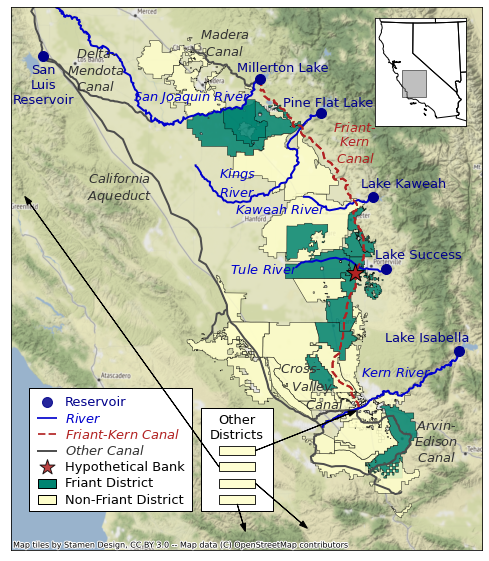

In [89]:
### base map with labels, etc
alpha = 0.85
fontsize = 13
fig, ax = plt.subplots(1,1, figsize=(10,10))#, gridspec_kw={'width_ratios': [0.75,0.25], 'wspace':0.3})

### plot min share when included
def get_friant_color(d):
    friant_dict = {'BDM':False, 'BLR':False, 'BVA':False, 'CWO':False, 'HML':False, 'ID4':False, 'KND':False, 'LHL':False,
                         'RRB':False, 'SMI':False, 'THC':False, 'TJC':False, 'WKN':False, 'WRM':False, 'KCWA':False, 'COB':False,
                         'NKN':False, 'ARV':True, 'PIX':False, 'DLE':True, 'EXE':True, 'OKW':False, 'KRT':False, 'LND':True,
                         'LDS':True, 'LWT':True, 'PRT':True, 'SAU':True, 'SFW':True, 'SSJ':True, 'TPD':True, 'TBA':True,
                         'TUL':True, 'COF':True, 'FRS':True, 'SOC':False, 'SOB':False, 'CCA':False, 'DLR':False, 'TLB':False,
                         'KWD':False, 'WSL':False, 'SNL':False, 'PNC':False, 'DLP':False, 'CWC':False, 'MAD':False, 'OTL':False,
                         'OFK':True, 'OCD':False, 'OEX':False, 'OXV':False, 'OSW':False, 'CNS':False, 'ALT':False, 'KRWA':False, 'KWB':False}
    if d in friant_dict:
        is_friant = friant_dict[d]
    else:
        is_friant = False
    if is_friant:
        return rgb2hex((c01.r, c01.g, c01.b))
    else:
        return rgb2hex((c00.r, c00.g, c00.b))
                
        
ags['color_friant'] = [get_friant_color(d) for d in ags['district']]
### first plot districts with non-zero participation, except COF & TUL
condition = [d not in ('COF', 'TUL') for d in ags['district']]
ags.loc[condition, :].plot(ax=ax, color=ags.loc[condition, 'color_friant'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
### now plot COF & TUL, which are overlapping and need to be on top
condition = [d in ('COF', 'TUL') for d in ags['district']]
ags.loc[condition, :].plot(ax=ax, color=ags.loc[condition, 'color_friant'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)

### plot other shapefiles, eg rivers & canals
add_tlb_shapes(ax, labels=True)


### add basemap
# ax.set_xlim([1.7e6, 2.1e6])
# ax.set_ylim([3.5e5, 8e5])
map_lims = ([1.8e6, 2.06e6], [4.25e5, 7.25e5])
ax.set_xlim(map_lims[0])
ax.set_ylim(map_lims[1])
cx.add_basemap(ax = ax, crs=ags.crs)#, source=cx.providers.Stamen.TonerLite)
ax.set_xticks([])
ax.set_yticks([])

# ### add separate inset with boxes for ID4 & coastal
other_districts = ['ID4','SOB','SOC','CCC']
inclusion_fracs = [get_inclusion_frac(d, results) for d in other_districts]
median_shares = [get_median_share(d, results) for d in other_districts]
bivariate_colors = [get_bivariate_choropleth_color(d, i, m) for d, i, m in zip(other_districts, inclusion_fracs, median_shares)]
ax.add_collection(PatchCollection([Rectangle((1.905e6, 4.465e5), 0.04e6, 0.57e5)], facecolor='w', edgecolor='k', alpha=1))
ax.annotate('Other\nDistricts', (1.925e6, 4.925e5), ha='center',va='center', zorder=5, fontsize=fontsize)
for i,d in enumerate(other_districts):
    box = [Rectangle((1.915e6, 4.775e5 - i * 0.09e5),0.02e6, 0.05e5)]
    pc = PatchCollection(box, facecolor=get_friant_color(d), edgecolor='k', alpha=alpha)
    ax.add_collection(pc)
# ### now add arrows
ax.arrow(1.935e6, 4.8e5, 0.062e6 * 0.9, 0.245e5 * 0.9, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'ID4'
ax.arrow(1.915e6, 4.71e5, -0.195e6 * 0.55, 2.715e5 * 0.55, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'SOB'
ax.arrow(1.935e6, 4.62e5, 0.115e6 * 0.25, -0.995e5 * 0.25, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'SOC'
ax.arrow(1.925e6, 4.505e5, 0.015e6 * 0.3, -0.505e5 * 0.3, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'CCC'


# ### add separate inset with legend
ax.add_collection(PatchCollection([Rectangle((1.81e6, 4.465e5), 0.09e6, 0.68e5)], facecolor='w', edgecolor='k', alpha=1))
# ax.annotate('Legend', (1.815e6, 4.89e5), ha='left',va='center', zorder=5, fontsize=fontsize)

ax.scatter([1.82e6], [5.07e5], color=reservoirblue, s=100, alpha=alpha)
ax.annotate('Reservoir', (1.83e6, 5.07e5), ha='left',va='center', zorder=5, fontsize=fontsize, color=reservoirblue)

ax.plot([1.815e6, 1.825e6], [4.98e5, 4.98e5], color=riverblue, lw=2, alpha=alpha)
ax.annotate('$River$', (1.83e6, 4.98e5), ha='left',va='center', zorder=5, fontsize=fontsize, color=riverblue)

ax.plot([1.815e6, 1.825e6], [4.89e5, 4.89e5], color='firebrick', ls = '--', lw=2, alpha=alpha)
ax.annotate('$Friant$' + '-' + '$Kern$' + ' ' + '$Canal$', (1.83e6, 4.89e5), ha='left',va='center', zorder=5, 
            fontsize=fontsize, color='firebrick')

ax.plot([1.815e6, 1.825e6], [4.8e5, 4.8e5], color='0.2', ls='-', lw=2, alpha=alpha)
ax.annotate('$Other$' + ' ' + '$Canal$', (1.83e6, 4.8e5), ha='left',va='center', zorder=5, fontsize=fontsize, color='0.2')

ax.scatter([1.82e6], [4.71e5], color='firebrick', edgecolor='k', marker='*', s=250, alpha=alpha)
ax.annotate('Hypothetical Bank', (1.83e6, 4.71e5), ha='left',va='center', zorder=5, fontsize=fontsize, color='k')

ax.add_collection(PatchCollection([Rectangle((1.815e6, 4.595e5), 0.01e6, 0.05e5)], 
                                  facecolor=get_friant_color('LWT'), edgecolor='k', alpha=1))
ax.annotate('Friant District', (1.83e6, 4.62e5), ha='left',va='center', zorder=5, fontsize=fontsize, color='k')

ax.add_collection(PatchCollection([Rectangle((1.815e6, 4.505e5), 0.01e6, 0.05e5)], 
                                  facecolor=get_friant_color('LHL'), edgecolor='k', alpha=1))
ax.annotate('Non-Friant District', (1.83e6, 4.53e5), ha='left',va='center', zorder=5, fontsize=fontsize, color='k')


# ### add separate inset with larger area & zoom box
axin = ax.inset_axes([0.77,0.78,0.2,0.2])
axin.set_xlim([1.5e6, 2.5e6])
axin.set_ylim([1e5, 13e5])
states.plot(facecolor='none', edgecolor='k', ax=axin)
axin.add_collection(PatchCollection([Rectangle([map_lims[0][0], map_lims[1][0]], 
                                                map_lims[0][1] - map_lims[0][0], 
                                                map_lims[1][1] - map_lims[1][0])],
                                    facecolor='0.5', edgecolor='k', alpha=0.5))
axin.set_xticks([])
axin.set_yticks([])


plt.savefig(f'{fig_dir}district_map_friant.png', bbox_inches='tight', dpi=300)



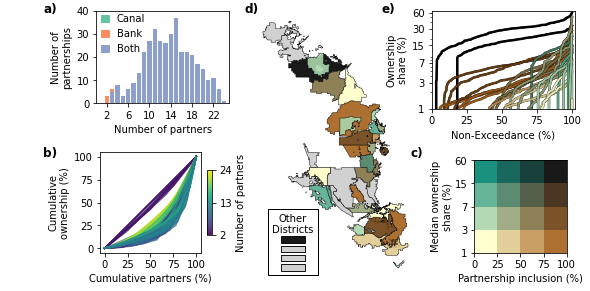

In [130]:
### test bivariate choropleth 
alpha = 0.9
fontsize = 10
figtype = 'Median' # 'Median','Min','Max'
satisfice_only = False
labels = ('a)','b)','c)','d)','e)')


if satisfice_only:
    results_fig = results.loc[satisfice, :]
else:
    results_fig = results   
    
fig, ax = plt.subplots(1,1, figsize=(10,5))#, gridspec_kw={'width_ratios': [0.75,0.25], 'wspace':0.3})

### plot fraction inclusion for each district
# nonpartnercolor = '0.9'
def get_bivariate_choropleth_color(district, inclusion_frac, median_share):
    d = 'share_' + district
    try:
        count = 0
        for inclusion_bound in inclusion_bounds:
            for share_bound in share_bounds:
                if inclusion_frac == 0:
                    return nonpartnercolor
                if inclusion_frac <= inclusion_bound:
                    if median_share <= share_bound:
                        return colorlist[count]
                count += 1
    except:
        return nonpartnercolor
    
def get_inclusion_frac(d, df_solutions):
    try:
        frac = np.mean(df_solutions['share_'+d] > 0)
    except:
        frac = 0
    return frac

ags['inclusion_frac'] = [get_inclusion_frac(d, results_fig) for d in ags['district']]

### plot median share when included
def get_median_share(d, df_solutions):
    try:
        share = np.median(df_solutions['share_'+d].loc[df_solutions['share_'+d] > 0])
    except:
        share = 0
    return share

### plot min share when included
def get_min_share(d, df_solutions):
    try:
        share = np.min(df_solutions['share_'+d].loc[df_solutions['share_'+d] > 0])
    except:
        share = 0
    return share

### plot max share when included
def get_max_share(d, df_solutions):
    try:
        share = np.max(df_solutions['share_'+d].loc[df_solutions['share_'+d] > 0])
    except:
        share = 0
    return share
            


if figtype == 'Median':
    ags['median_share'] = [get_median_share(d, results_fig) for d in ags['district']]
    ags['color_bivariate'] = [get_bivariate_choropleth_color(d, ags['inclusion_frac'].loc[ags['district'] == d].values[0], 
                                                              ags['median_share'].loc[ags['district'] == d].values[0]) for d in ags['district']]
elif figtype == 'Min':
    ags['min_share'] = [get_min_share(d, results_fig) for d in ags['district']]
    ags['color_bivariate'] = [get_bivariate_choropleth_color(d, ags['inclusion_frac'].loc[ags['district'] == d].values[0], 
                                                          ags['min_share'].loc[ags['district'] == d].values[0]) for d in ags['district']]
elif figtype == 'Max':
    ags['max_share'] = [get_max_share(d, results_fig) for d in ags['district']]
    ags['color_bivariate'] = [get_bivariate_choropleth_color(d, ags['inclusion_frac'].loc[ags['district'] == d].values[0], 
                                                          ags['max_share'].loc[ags['district'] == d].values[0]) for d in ags['district']]

### first plot districts with non-zero participation, except COF & TUL
condition = np.logical_and(ags['color_bivariate'] != nonpartnercolor, [d not in ('COF', 'TUL') for d in ags['district']])
ags.loc[condition, :].plot('color_bivariate', ax=ax, color=ags.loc[condition, 'color_bivariate'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
### now plot COF & TUL, which are overlapping and need to be on top
condition = np.logical_and(ags['color_bivariate'] != nonpartnercolor, [d in ('COF', 'TUL') for d in ags['district']])
ags.loc[condition, :].plot('color_bivariate', ax=ax, color=ags.loc[condition, 'color_bivariate'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
### lastly, plot districts with zero participation, with no color but outlined in black
condition = ags['color_bivariate'] == nonpartnercolor
ags.loc[condition, :].plot('color_bivariate', ax=ax, color=nonpartnercolor, edgecolor='k', lw=0.5, legend=True, alpha=alpha, zorder=1)

### axes
ax.set_xlim([1.68e6, 2.21e6])
ax.set_ylim([4.3e5, 7.22e5])
ax.set_xticks([])
ax.set_yticks([])
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)


# ### add separate inset with boxes for ID4 & coastal
other_districts = ['ID4','SOB','SOC','CCC']
inclusion_fracs = [get_inclusion_frac(d, results_fig) for d in other_districts]
if figtype == 'Median':
    m_shares = [get_median_share(d, results_fig) for d in other_districts]
elif figtype == 'Min':
    m_shares = [get_min_share(d, results_fig) for d in other_districts]
elif figtype == 'Max':
    m_shares = [get_max_share(d, results_fig) for d in other_districts]
bivariate_colors = [get_bivariate_choropleth_color(d, i, m) for d, i, m in zip(other_districts, inclusion_fracs, m_shares)]
ax.add_collection(PatchCollection([Rectangle((1.875e6, 4.35e5), 0.054e6, 0.71e5)], facecolor='w', edgecolor='k', alpha=1))
ax.annotate('Other\nDistricts', (1.902e6, 4.9e5), ha='center',va='center', zorder=5, fontsize=fontsize)
for i,d in enumerate(other_districts):
    box = [Rectangle((1.889e6, 4.7e5 - i * 0.1e5),0.026e6, 0.07e5)]
    pc = PatchCollection(box, facecolor=bivariate_colors[i], edgecolor='k', alpha=alpha)
    ax.add_collection(pc)



### add color grid legend
# ax = axs[1]
axin2 = ax.inset_axes([0.76,0.1,0.24,0.34])
axin2.set_aspect('equal', adjustable='box')
count = 0
for i,inclusion_bound in enumerate(inclusion_bounds):
    for j,share_bound in enumerate(share_bounds):
        shareboxes = [Rectangle((i,j), 1, 1)]
        pc = PatchCollection(shareboxes, facecolor=colorlist[count], alpha=alpha)
        count += 1
        axin2.add_collection(pc)   
_=axin2.set_xlim([0,len(share_bounds)])
_=axin2.set_ylim([0,len(inclusion_bounds)])
_=axin2.set_xticks(list(np.arange(0, len(inclusion_bounds)+1)), [0]+[int(b*100) for b in inclusion_bounds], fontsize=fontsize)
_=axin2.set_xlabel('Partnership inclusion (%)', fontsize=fontsize)
_=axin2.set_yticks(list(np.arange(0, len(share_bounds)+1)), [1]+[int(b*100) for b in share_bounds], fontsize=fontsize)
_=axin2.set_ylabel(f'{figtype} ownership\nshare (%)', fontsize=fontsize, labelpad=2)

### add exceedance plots for ownership shares
axin3 = ax.inset_axes([0.7,0.63,0.29,0.36])
x = np.linspace(0,100,results_fig.shape[0])
for d in districts:
    try:
        shares_d = results_fig[f'share_{d}'] * 100
        shares_sort = shares_d.sort_values().values
        inclusion_frac = get_inclusion_frac(d, results_fig)
        median_share = get_median_share(d, results_fig)
        bivariate_color = get_bivariate_choropleth_color(d, inclusion_frac, median_share) 
        axin3.plot(x, shares_sort, color='k', alpha=alpha, zorder = -int(300 * median_share + 100 * inclusion_frac), lw=2.5)
        axin3.plot(x, shares_sort, color=bivariate_color, alpha=alpha, zorder = -int(300 * median_share + 100 * inclusion_frac), lw=2)    
    except:
        pass
    
_=axin3.set_xlim([0,102])
_=axin3.set_ylim([1,65])
_=axin3.semilogy()
_=axin3.set_xticks(range(0, 101, 25), range(0, 101, 25), fontsize=fontsize)
_=axin3.set_yticks([1,3,7,15,30,60],[1,3,7,15,30,60], fontsize=fontsize)
_=axin3.set_xlabel('Non-Exceedance (%)', fontsize=fontsize)
_=axin3.set_ylabel('Ownership\nshare (%)', fontsize=fontsize)
_=axin3.patch.set_alpha(0.)


### add distribution of project type by n_p
axin4 = ax.inset_axes([0.02,0.65,0.27,0.34])
cols_cbrewer = ['#66c2a5','#fc8d62','#8da0cb']
for i in range(1,25):
    subresults = results.loc[results['n_p'] == i]
    count = 0
    for proj in range(3,0,-1):
        newcount = (subresults['proj'] == proj).sum()
        axin4.add_collection(PatchCollection([Rectangle((i-0.4, count), 0.8, newcount)], facecolor=cols_cbrewer[proj-1]))
        count += newcount
axin4.set_xlim([0,25])
axin4.set_ylim([0,40])
_ = axin4.set_xticks(range(2,25,4), fontsize=fontsize)
_=axin4.set_xlabel('Number of partners', fontsize=fontsize)
_=axin4.set_ylabel('Number of\npartnerships', fontsize=fontsize)
leg = [Patch(color= cols_cbrewer[0], label='Canal'),
       Patch(color= cols_cbrewer[1], label='Bank'),
       Patch(color= cols_cbrewer[2], label='Both')]
_ = axin4.legend(handles=leg, loc='center', bbox_to_anchor=[0.2,0.75], ncol=1, frameon=False, fontsize=fontsize, handlelength=0.8)

### add cumulative ownership plot
axin5 = ax.inset_axes([0.01,0.1,0.24,0.37])
axin5.set_aspect('equal')
alpha=0.7
for count, soln in enumerate(results['label']):
    results_soln = results.loc[results['label'] == soln]
    color = cmap_vir((results_soln['n_p'].iloc[0]-2) / 22)
    partner_shares = [0] + [get_share(d, results_soln) for d in districts if get_share(d, results_soln)>0]
    partner_shares = np.sort(partner_shares)
    partners_cum_norm = np.arange(0, len(partner_shares))/(len(partner_shares)-1) * 100
    shares_cum_norm = np.cumsum(np.array(partner_shares)) * 100
    axin5.plot(partners_cum_norm, shares_cum_norm, color=color, alpha=alpha, zorder=np.random.choice([1,2,3]))
    axin5.set_xlabel('Cumulative partners (%)', fontsize=fontsize)
    axin5.set_ylabel('Cumulative\nownership (%)', fontsize=fontsize)
    axin5.set_xticks(range(0,101,25), fontsize=fontsize)
    axin5.set_yticks(range(0,101,25), fontsize=fontsize)
### create colorbar
axin6 = fig.add_axes([0.295,0.23,0.05,0.22])
axin6.patch.set_alpha(0)
axin6.set_xticks([])
axin6.set_yticks([])
axin6.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_clim(vmin=2, vmax=24)
cb = plt.colorbar(mappable, ax=axin6, orientation='vertical', shrink=1, label='Number of partners', alpha=0.9, aspect=12)
_ = cb.ax.set_yticks([2,13,24], fontsize=fontsize)



### label subplots
ax.annotate(labels[0], (0.06,0.8), ha='left', va='top', fontsize=fontsize+2, weight='bold', xycoords='figure fraction')
ax.annotate(labels[1], (0.06,0.4), ha='left', va='top', fontsize=fontsize+2, weight='bold', xycoords='figure fraction')
ax.annotate(labels[3], (0.34,0.8), ha='left', va='top', fontsize=fontsize+2, weight='bold', xycoords='figure fraction')
ax.annotate(labels[4], (0.53,0.8), ha='left', va='top', fontsize=fontsize+2, weight='bold', xycoords='figure fraction')
ax.annotate(labels[2], (0.57,0.4), ha='left', va='top', fontsize=fontsize+2, weight='bold', xycoords='figure fraction')



plt.savefig(f'{fig_dir}district_share_distributions_bivariateChloropleth_{figtype}_satOnly{satisfice_only}.png', bbox_inches='tight', dpi=300)



In [126]:
### distributional info for num partners & project type
print(f'mean size: {results["n_p"].mean()}')
print(f'lower quantile: {np.quantile(results["n_p"], 0.25)}')
print(f'upper quantile: {np.quantile(results["n_p"], 0.75)}')
print(f'fraction between lower & upper quantiles: {np.logical_and(results["n_p"] >= np.quantile(results["n_p"], 0.25), results["n_p"] <= np.quantile(results["n_p"], 0.75)).mean()}')
print()
print(f'canal-only: {(results["proj"] == 1).sum()} ({(results["proj"] == 1).mean()})')
print(f'bank-only: {(results["proj"] == 2).sum()} ({(results["proj"] == 2).mean()})')
print(f'canal+bank: {(results["proj"] == 3).sum()} ({(results["proj"] == 3).mean()})')
print(f'max share: {(results[["share_"+d for d in districts]].max().max())}')

mean size: 13.561497326203208
lower quantile: 10.0
upper quantile: 17.0
fraction between lower & upper quantiles: 0.5962566844919787

canal-only: 0 (0.0)
bank-only: 4 (0.0106951871657754)
canal+bank: 370 (0.9893048128342246)
max share: 0.5968086586403366


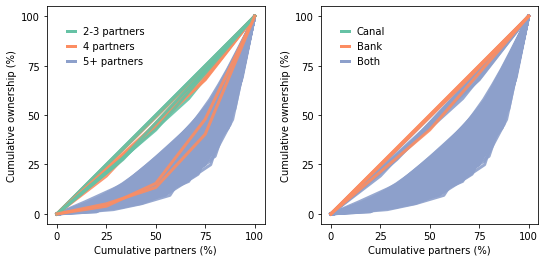

In [123]:
### cumulative ownership plot for groundwater banks vs both projects, then separated by size classes
fig,axs=plt.subplots(1,2,figsize=(9,4))
alpha=0.9
ax = axs[1]
ax.set_aspect('equal')
for count, soln in enumerate(results['label']):
    results_soln = results.loc[results['label'] == soln]
    proj = int(results_soln['proj'].iloc[0])
    color = cols_cbrewer[proj-1]
    partner_shares = [0] + [get_share(d, results_soln) for d in districts if get_share(d, results_soln)>0]
    partner_shares = np.sort(partner_shares)
    partners_cum_norm = np.arange(0, len(partner_shares))/(len(partner_shares)-1) * 100
    shares_cum_norm = np.cumsum(np.array(partner_shares)) * 100
    ax.plot(partners_cum_norm, shares_cum_norm, color=color, alpha=alpha, zorder=-results_soln['proj'].iloc[0], lw=3)
    ax.set_xlabel('Cumulative partners (%)', fontsize=fontsize)
    ax.set_ylabel('Cumulative ownership (%)', fontsize=fontsize)
    ax.set_xticks(range(0,101,25), fontsize=fontsize)
    ax.set_yticks(range(0,101,25), fontsize=fontsize)
leg = [Line2D([0],[0], color= cols_cbrewer[0], label='Canal', lw=3),
       Line2D([0],[0], color= cols_cbrewer[1], label='Bank', lw=3),
       Line2D([0],[0], color= cols_cbrewer[2], label='Both', lw=3)]
_ = ax.legend(handles=leg, loc='upper left', bbox_to_anchor=[0.05,0.95], ncol=1, frameon=False, fontsize=fontsize, handlelength=0.8)


ax = axs[0]
ax.set_aspect('equal')
for count, soln in enumerate(results['label']):
    results_soln = results.loc[results['label'] == soln]
    c = int(results_soln['n_p'].iloc[0] > 3) + int(results_soln['n_p'].iloc[0] > 4)
    color = cols_cbrewer[c]
    partner_shares = [0] + [get_share(d, results_soln) for d in districts if get_share(d, results_soln)>0]
    partner_shares = np.sort(partner_shares)
    partners_cum_norm = np.arange(0, len(partner_shares))/(len(partner_shares)-1) * 100
    shares_cum_norm = np.cumsum(np.array(partner_shares)) * 100
    ax.plot(partners_cum_norm, shares_cum_norm, color=color, alpha=alpha, zorder=int(c<2), lw=3)
    ax.set_xlabel('Cumulative partners (%)', fontsize=fontsize)
    ax.set_ylabel('Cumulative ownership (%)', fontsize=fontsize)
    ax.set_xticks(range(0,101,25), fontsize=fontsize)
    ax.set_yticks(range(0,101,25), fontsize=fontsize)
leg = [Line2D([0],[0], color= cols_cbrewer[0], label='2-3 partners', lw=3),
       Line2D([0],[0], color= cols_cbrewer[1], label='4 partners', lw=3),
       Line2D([0],[0], color= cols_cbrewer[2], label='5+ partners', lw=3)]
_ = ax.legend(handles=leg, loc='upper left', bbox_to_anchor=[0.05,0.95], ncol=1, frameon=False, fontsize=fontsize, handlelength=0.8)

plt.savefig(f'{fig_dir}cumulative_ownership_byNumAndProj.png', bbox_inches='tight', dpi=300)


In [35]:
solns = ['soln1224', 'soln2', 'soln375'] #soln196

In [137]:
# ### plot map with district shares for each partnership of interset
# alpha = 0.9
# fontsize = 20

# for soln in solns:
#     results_soln = results.loc[results['label'] == soln]

#     fig, ax = plt.subplots(1,1, figsize=(12,12))#, gridspec_kw={'width_ratios': [0.75,0.25], 'wspace':0.3})

#     ### get shares for districts in gpd
#     def get_share(d, singleresult):
#         try:
#             share = singleresult[f'share_{d}'].iloc[0]
#         except:
#             share = 0
#         return share

#     ags['share'] = [get_share(d, results_soln) for d in ags['district']]
#     ags['color_share'] = [cmap_class(s) for s in ags['share']]
#     # ags.plot(ags['color_share'], ax = ax, color=ags['color_share'])

#     ### first plot districts with non-zero participation, except COF & TUL
#     condition = np.logical_and(ags['color_share'] != nonpartnercolor, [d not in ('COF', 'TUL') for d in ags['district']])
#     ags.loc[condition, :].plot('color_share', ax=ax, color=ags.loc[condition, 'color_share'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
#     ### now plot COF & TUL, which are overlapping and need to be on top
#     condition = np.logical_and(ags['color_share'] != nonpartnercolor, [d in ('COF', 'TUL') for d in ags['district']])
#     ags.loc[condition, :].plot('color_share', ax=ax, color=ags.loc[condition, 'color_share'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
#     ### lastly, plot districts with zero participation, with no color but outlined in black
#     condition = ags['color_share'] == nonpartnercolor
#     ags.loc[condition, :].plot('color_share', ax=ax, color=nonpartnercolor, edgecolor='k', lw=0.5, legend=True, alpha=alpha, zorder=1)

#     if results_soln['proj'].iloc[0] == 1:
#         add_tlb_shapes(ax, labels=False, show_fkc=True, show_cfwb=False, show_other=False)
#     elif results_soln['proj'].iloc[0] == 2:
#         add_tlb_shapes(ax, labels=False, show_fkc=False, show_cfwb=True, show_other=False)
#     elif results_soln['proj'].iloc[0] == 3:
#         add_tlb_shapes(ax, labels=False, show_fkc=True, show_cfwb=True, show_other=False)
        
#     ### add basemap
#     # ax.set_xlim([1.7e6, 2.1e6])
#     # ax.set_ylim([3.5e5, 8e5])
#     map_lims = ([1.85e6, 2.035e6], [4.3e5, 7.15e5])
#     ax.set_xlim(map_lims[0])
#     ax.set_ylim(map_lims[1])
#     cx.add_basemap(ax = ax, crs=ags.crs)#, source=cx.providers.Stamen.TonerLite)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     # ### add separate inset with boxes for ID4 & coastal
#     other_districts = ['ID4','SOB','SOC','CCC']
#     inclusion_fracs = [get_inclusion_frac(d, results) for d in other_districts]
#     m_shares = [get_share(d, results_soln) for d in other_districts]
#     bivariate_colors = [cmap_class(s) for s in m_shares]
#     ax.add_collection(PatchCollection([Rectangle((1.857e6, 4.5e5), 0.046e6, 0.53e5)], facecolor='w', edgecolor='k', alpha=1))
#     ax.annotate('Other\nDistricts', (1.88e6, 4.9e5), ha='center',va='center', zorder=5, fontsize=fontsize)
#     for i,d in enumerate(other_districts):
#         box = [Rectangle((1.87e6, 4.75e5 - i * 0.07e5),0.02e6, 0.05e5)]
#         pc = PatchCollection(box, facecolor=bivariate_colors[i], edgecolor='k', alpha=alpha)
#         ax.add_collection(pc)
#     # ### now add arrows
#     # ax.arrow(1.935e6, 4.725e5, 0.062e6 * 0.9, 0.32e5 * 0.9, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'ID4'
#     # ax.arrow(1.915e6, 4.655e5, -0.195e6 * 0.55, 2.77e5 * 0.55, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'SOB'
#     # ax.arrow(1.935e6, 4.585e5, 0.115e6 * 0.25, -0.96e5 * 0.25, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'SOC'
#     # ax.arrow(1.925e6, 4.49e5, 0.015e6 * 0.3, -0.49e5 * 0.3, color='k', lw=1, head_width=3e3, length_includes_head=True, zorder=5)  #'CCC'


#     # ### add separate inset with larger area & zoom box
#     axin = ax.inset_axes([0.76,0.77,0.2,0.2])
#     axin.set_xlim([1.5e6, 2.5e6])
#     axin.set_ylim([1e5, 13e5])
#     states.plot(facecolor='none', edgecolor='k', ax=axin)
#     axin.add_collection(PatchCollection([Rectangle([map_lims[0][0], map_lims[1][0]], 
#                                                     map_lims[0][1] - map_lims[0][0], 
#                                                     map_lims[1][1] - map_lims[1][0])],
#                                         facecolor='0.5', edgecolor='k', alpha=0.5))

#     axin.set_xticks([])
#     axin.set_yticks([])


# #     ### add colorbar 
# #     axin2 = ax.inset_axes([0.3,0.05,0.24,0.24])
# #     axin2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
# #     axin2.set_xticks([])
# #     axin2.set_yticks([])
# #     cb = plt.colorbar(mappable_even, ax=axin2, ticks=[1/12,3/12,5/12,7/12,9/12,11/12], shrink=0.9, fraction=1)
# #     _ = cb.ax.set_yticklabels(['0', '1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
# #     _ = cb.set_label('Share in partnership (%)', fontsize=fontsize, labelpad=-80)
# #     axin2.patch.set_alpha(0.)

#     plt.savefig(f'{fig_dir}district_shares_exSoln{soln}.png', bbox_inches='tight', dpi=300)



In [26]:
# ### plot map with district shares for each partnership of interset - combined, simple
# alpha = 0.9
# fontsize = 10
# labels = ('a)','b)','c)')
# fig = plt.figure(figsize=(10,6))
# gs = gridspec.GridSpec(nrows=2, ncols=3, wspace=0.1, hspace=0.1, height_ratios=[5,1])
    
# for count, soln in enumerate(solns):
#     ax = fig.add_subplot(gs[0, count])
#     ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

#     results_soln = results.loc[results['label'] == soln]

#     ### get shares for districts in gpd
#     def get_share(d, singleresult):
#         try:
#             share = singleresult[f'share_{d}'].iloc[0]
#         except:
#             share = 0
#         return share

#     ags['share'] = [get_share(d, results_soln) for d in ags['district']]
#     ags['color_share'] = [cmap_class(s) for s in ags['share']]
#     # ags.plot(ags['color_share'], ax = ax, color=ags['color_share'])
    
#     ### first plot districts with non-zero participation, except COF & TUL
#     condition = np.logical_and(ags['color_share'] != nonpartnercolor, [d not in ('COF', 'TUL') for d in ags['district']])
#     ags.loc[condition, :].plot('color_share', ax=ax, color=ags.loc[condition, 'color_share'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
#     ### now plot COF & TUL, which are overlapping and need to be on top
#     condition = np.logical_and(ags['color_share'] != nonpartnercolor, [d in ('COF', 'TUL') for d in ags['district']])
#     ags.loc[condition, :].plot('color_share', ax=ax, color=ags.loc[condition, 'color_share'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
#     ### lastly, plot districts with zero participation, with no color but outlined in black
#     condition = ags['color_share'] == nonpartnercolor
#     ags.loc[condition, :].plot('color_share', ax=ax, color=nonpartnercolor, edgecolor='k', lw=0.5, legend=True, alpha=alpha, zorder=1)

#     ### add infra investments
#     if results_soln['proj'].iloc[0] == 1:
#         add_tlb_shapes(ax, labels=False, show_fkc=True, show_cfwb=False, show_other=False)
#     elif results_soln['proj'].iloc[0] == 2:
#         add_tlb_shapes(ax, labels=False, show_fkc=False, show_cfwb=True, show_other=False)
#     elif results_soln['proj'].iloc[0] == 3:
#         add_tlb_shapes(ax, labels=False, show_fkc=True, show_cfwb=True, show_other=False)
        
#     ### fig limits
#     map_lims = ([1.85e6, 2.035e6], [4.3e5, 7.15e5])
#     ax.set_xlim(map_lims[0])
#     ax.set_ylim(map_lims[1])
#     ax.set_xticks([])
#     ax.set_yticks([])
    
#     ### label subplots
#     ax.annotate(labels[count], (1.851e6, 7.13e5), ha='left', va='top', fontsize=fontsize+2, weight='bold')

#     # ### add separate inset with boxes for ID4 & coastal
#     other_districts = ['ID4','SOB','SOC','CCC']
#     inclusion_fracs = [get_inclusion_frac(d, results) for d in other_districts]
#     m_shares = [get_share(d, results_soln) for d in other_districts]
#     bivariate_colors = [cmap_class(s) for s in m_shares]
#     ax.add_collection(PatchCollection([Rectangle((1.875e6, 4.35e5), 0.054e6, 0.71e5)], facecolor='w', edgecolor='k', alpha=1))
#     ax.annotate('Other\nDistricts', (1.902e6, 4.9e5), ha='center',va='center', zorder=5, fontsize=fontsize)
    
#     for i,d in enumerate(other_districts):
#         box = [Rectangle((1.889e6, 4.7e5 - i * 0.1e5),0.026e6, 0.07e5)]
#         pc = PatchCollection(box, facecolor=bivariate_colors[i], edgecolor='k', alpha=alpha)
#         ax.add_collection(pc)

# ### colorbar 
# ax2 = fig.add_subplot(gs[1,:-1])
# ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
# ax2.set_xticks([])
# ax2.set_yticks([])
# cb = plt.colorbar(mappable_even, ax=ax2, ticks=[1/12,3/12,5/12,7/12,9/12,11/12], shrink=0.75, fraction=1, orientation='horizontal')
# _ = cb.ax.set_xticklabels(['0', '1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
# _ = cb.set_label('Ownership share (%)', fontsize=fontsize)#, labelpad=10)
# ### infra project legend
# ax3 = fig.add_subplot(gs[1,-1])
# ax3.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
# ax3.set_xticks([])
# ax3.set_yticks([])
# leg = [Line2D([0], [0], color= 'firebrick', lw=2, ls='--', label='Canal expansion investment'),
#       Line2D([0], [0], color= 'w', marker='*', markeredgecolor='k', markerfacecolor='firebrick', ms=15, label='Groundwater banking investment')]
# _ = ax3.legend(handles=leg, loc='center', bbox_to_anchor=[0.35,0.75], ncol=1, frameon=False, fontsize=fontsize)


# plt.savefig(f'{fig_dir}district_shares_ExSolnsCombined.png', bbox_inches='tight', dpi=300)


soln1224 [0.01155545 0.01462572 0.01549846 0.0158645  0.0176394  0.01874883
 0.07107528 0.08759166 0.20073428 0.23154332 0.3151231 ]
soln2 [0.32589826 0.32921745 0.34488429]
soln375 [0.01323599 0.01539104 0.01967402 0.01973544 0.0201125  0.02079037
 0.02463326 0.02875194 0.0327997  0.03447896 0.03762452 0.07034194
 0.07934129 0.08155173 0.08269357 0.1962086  0.22263515]


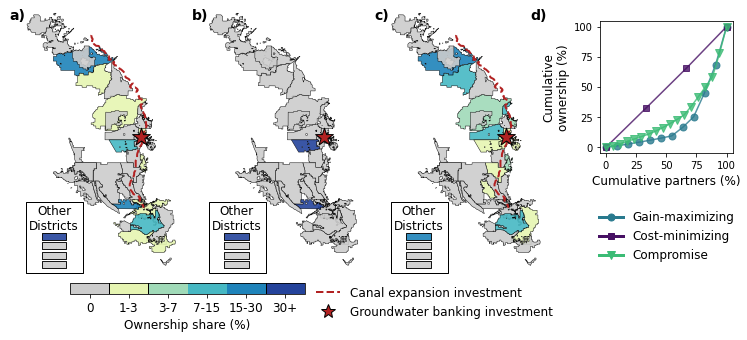

In [160]:
### plot map with district shares for each partnership of interset - combined, simple. add ownership cdfs as well.
solns = ['soln1224', 'soln2', 'soln375'] #soln196
alpha = 0.9
fontsize = 12
labels = ('a)','b)','c)','d)')
fig = plt.figure(figsize=(13,6))
gs = gridspec.GridSpec(nrows=6, ncols=16, wspace=0.1, hspace=0.1)
    
for count, soln in enumerate(solns):
    ax = fig.add_subplot(gs[:5, count*4:(4*(count+1))])
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

    results_soln = results.loc[results['label'] == soln]

    ### get shares for districts in gpd
    def get_share(d, singleresult):
        try:
            share = singleresult[f'share_{d}'].iloc[0]
        except:
            share = 0
        return share

    ags['share'] = [get_share(d, results_soln) for d in ags['district']]
    ags['color_share'] = [cmap_class(s) for s in ags['share']]
    
    partner_shares = [get_share(d, results_soln) for d in districts if get_share(d, results_soln)>0]
    print(soln, np.sort(partner_shares))
    
    ### first plot districts with non-zero participation, except COF & TUL
    condition = np.logical_and(ags['color_share'] != nonpartnercolor, [d not in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('color_share', ax=ax, color=ags.loc[condition, 'color_share'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
    ### now plot COF & TUL, which are overlapping and need to be on top
    condition = np.logical_and(ags['color_share'] != nonpartnercolor, [d in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('color_share', ax=ax, color=ags.loc[condition, 'color_share'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
    ### lastly, plot districts with zero participation, with no color but outlined in black
    condition = ags['color_share'] == nonpartnercolor
    ags.loc[condition, :].plot('color_share', ax=ax, color=nonpartnercolor, edgecolor='k', lw=0.5, legend=True, alpha=alpha, zorder=1)

    ### add infra investments
    if results_soln['proj'].iloc[0] == 1:
        add_tlb_shapes(ax, labels=False, show_fkc=True, show_cfwb=False, show_other=False)
    elif results_soln['proj'].iloc[0] == 2:
        add_tlb_shapes(ax, labels=False, show_fkc=False, show_cfwb=True, show_other=False)
    elif results_soln['proj'].iloc[0] == 3:
        add_tlb_shapes(ax, labels=False, show_fkc=True, show_cfwb=True, show_other=False)
        
    ### fig limits
    map_lims = ([1.85e6, 2.035e6], [4.3e5, 7.15e5])
    ax.set_xlim(map_lims[0])
    ax.set_ylim(map_lims[1])
    ax.set_xticks([])
    ax.set_yticks([])
    
    ### label subplots
    ax.annotate(labels[count], (1.851e6, 7.13e5), ha='left', va='top', fontsize=fontsize+2, weight='bold')

    # ### add separate inset with boxes for ID4 & coastal
    other_districts = ['ID4','SOB','SOC','CCC']
    inclusion_fracs = [get_inclusion_frac(d, results) for d in other_districts]
    m_shares = [get_share(d, results_soln) for d in other_districts]
    bivariate_colors = [cmap_class(s) for s in m_shares]
    ax.add_collection(PatchCollection([Rectangle((1.869e6, 4.35e5), 0.06e6, 0.75e5)], facecolor='w', edgecolor='k', alpha=1))
    ax.annotate('Other\nDistricts', (1.898e6, 4.92e5), ha='center',va='center', zorder=5, fontsize=fontsize)
    
    for i,d in enumerate(other_districts):
        box = [Rectangle((1.885e6, 4.7e5 - i * 0.1e5),0.026e6, 0.07e5)]
        pc = PatchCollection(box, facecolor=bivariate_colors[i], edgecolor='k', alpha=alpha)
        ax.add_collection(pc)

### colorbar 
ax2 = fig.add_subplot(gs[5,:8])
ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
cb = plt.colorbar(mappable_even, ax=ax2, ticks=[1/12,3/12,5/12,7/12,9/12,11/12], shrink=0.65, fraction=1, orientation='horizontal')
_ = cb.ax.set_xticklabels(['0', '1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize)#, labelpad=10)

### infra project legend
ax3 = fig.add_subplot(gs[5,8:12])
ax3.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax3.set_xticks([])
ax3.set_yticks([])
leg = [Line2D([0], [0], color= 'firebrick', lw=2, ls='--', label='Canal expansion investment'),
      Line2D([0], [0], color= 'w', marker='*', markeredgecolor='k', markerfacecolor='firebrick', ms=15, label='Groundwater banking investment')]
_ = ax3.legend(handles=leg, loc='center', bbox_to_anchor=[0.35,0.6], ncol=1, frameon=False, fontsize=fontsize)

### add cumulative ownership plot
ax4 = fig.add_subplot(gs[:3,13:])
ax4.set_aspect('equal')
colors = [cmap_vir((results.loc[results['label'] == solns[i], 'n_p'].iloc[0]-2) / 22) for i in range(3)]
markers = ['o','s','v']
ms = [7,6,8]
alpha=0.8
for count, soln in enumerate(solns):
    results_soln = results.loc[results['label'] == soln]
    partner_shares = [0] + [get_share(d, results_soln) for d in districts if get_share(d, results_soln)>0]
    partner_shares = np.sort(partner_shares)
    partners_cum_norm = np.arange(0, len(partner_shares))/(len(partner_shares)-1) * 100
    shares_cum_norm = np.cumsum(np.array(partner_shares)) * 100
    ax4.plot(partners_cum_norm, shares_cum_norm, color=colors[count], alpha=alpha, marker=markers[count], ms=ms[count])
    ax4.set_xlabel('Cumulative partners (%)', fontsize=fontsize)
    ax4.set_ylabel('Cumulative\nownership (%)', fontsize=fontsize)
    ax4.set_xticks(range(0,101,25), fontsize=fontsize)
    ax4.set_yticks(range(0,101,25), fontsize=fontsize)
leg = [Line2D([0], [0], color= colors[0], marker=markers[0], ms=ms[0], lw=3, label='Gain-maximizing'),
      Line2D([0], [0], color= colors[1], marker=markers[1], ms=ms[1], lw=3, label='Cost-minimizing'),
      Line2D([0], [0], color= colors[2], marker=markers[2], ms=ms[2], lw=3, label='Compromise')]
_ = ax4.legend(handles=leg, loc='lower center', ncol=1, bbox_to_anchor=[0.5,-0.9], frameon=False, fontsize=fontsize)
ax.annotate(labels[-1], (2.015e6, 7.13e5), ha='left', va='top', fontsize=fontsize+2, weight='bold')


plt.savefig(f'{fig_dir}district_shares_ExSolnsCombined.png', bbox_inches='tight', dpi=300)


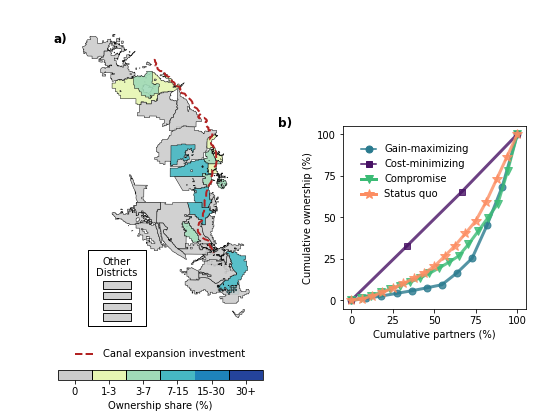

In [171]:
### same simple map for status quo friant16 soln
alpha = 0.9
fontsize = 10
labels = ('a)','b)','c)')
fig,axs = plt.subplots(1,2,figsize=(9,7), gridspec_kw={'width_ratios':(3,2)})
    
soln = 'friant16'

ax = axs[0]
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

results_soln = ef_results.loc[ef_results['label'] == soln]

### get shares for districts in gpd
def get_share(d, singleresult):
    try:
        share = singleresult[f'share_{d}'].iloc[0]
    except:
        share = 0
    return share

ags['share'] = [get_share(d, results_soln) for d in ags['district']]
ags['color_share'] = [cmap_class(s) for s in ags['share']]
# ags.plot(ags['color_share'], ax = ax, color=ags['color_share'])

### first plot districts with non-zero participation, except COF & TUL
condition = np.logical_and(ags['color_share'] != nonpartnercolor, [d not in ('COF', 'TUL') for d in ags['district']])
ags.loc[condition, :].plot('color_share', ax=ax, color=ags.loc[condition, 'color_share'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
### now plot COF & TUL, which are overlapping and need to be on top
condition = np.logical_and(ags['color_share'] != nonpartnercolor, [d in ('COF', 'TUL') for d in ags['district']])
ags.loc[condition, :].plot('color_share', ax=ax, color=ags.loc[condition, 'color_share'], edgecolor='k', lw=0.5, alpha=alpha, legend=True, zorder=1)
### lastly, plot districts with zero participation, with no color but outlined in black
condition = ags['color_share'] == nonpartnercolor
ags.loc[condition, :].plot('color_share', ax=ax, color=nonpartnercolor, edgecolor='k', lw=0.5, legend=True, alpha=alpha, zorder=1)

### add infra investments
if results_soln['proj'].iloc[0] == 1:
    add_tlb_shapes(ax, labels=False, show_fkc=True, show_cfwb=False, show_other=False)
elif results_soln['proj'].iloc[0] == 2:
    add_tlb_shapes(ax, labels=False, show_fkc=False, show_cfwb=True, show_other=False)
elif results_soln['proj'].iloc[0] == 3:
    add_tlb_shapes(ax, labels=False, show_fkc=True, show_cfwb=True, show_other=False)

### fig limits
map_lims = ([1.85e6, 2.035e6], [4.3e5, 7.15e5])
ax.set_xlim(map_lims[0])
ax.set_ylim(map_lims[1])
ax.set_xticks([])
ax.set_yticks([])

# ### add separate inset with boxes for ID4 & coastal
other_districts = ['ID4','SOB','SOC','CCC']
inclusion_fracs = [get_inclusion_frac(d, results) for d in other_districts]
m_shares = [get_share(d, results_soln) for d in other_districts]
bivariate_colors = [cmap_class(s) for s in m_shares]
ax.add_collection(PatchCollection([Rectangle((1.875e6, 4.35e5), 0.054e6, 0.71e5)], facecolor='w', edgecolor='k', alpha=1))
ax.annotate('Other\nDistricts', (1.902e6, 4.9e5), ha='center',va='center', zorder=5, fontsize=fontsize)

for i,d in enumerate(other_districts):
    box = [Rectangle((1.889e6, 4.7e5 - i * 0.1e5),0.026e6, 0.07e5)]
    pc = PatchCollection(box, facecolor=bivariate_colors[i], edgecolor='k', alpha=alpha)
    ax.add_collection(pc)

### colorbar 
cb = plt.colorbar(mappable_even, ax=ax, ticks=[1/12,3/12,5/12,7/12,9/12,11/12], shrink=0.75, fraction=0.1,
                  orientation='horizontal', pad=0.1)
_ = cb.ax.set_xticklabels(['0', '1-3', '3-7','7-15','15-30','30+',], fontsize=fontsize)
_ = cb.set_label('Ownership share (%)', fontsize=fontsize)#, labelpad=10)

### infra project legend
leg = [Line2D([0], [0], color= 'firebrick', lw=2, ls='--', label='Canal expansion investment')]
_ = ax.legend(handles=leg, loc='lower center', bbox_to_anchor=[0.5,-0.12], ncol=1, frameon=False, fontsize=fontsize)

ax.annotate(labels[0], (0.1,0.92), xycoords='subfigure fraction', ha='left', va='top', fontsize=fontsize+2, weight='bold')


### now add ownership concentration fig, comparing friant16 to Pareto set
ax = axs[1]
ax.set_aspect('equal')
colors = [cmap_vir((results.loc[results['label'] == solns[i], 'n_p'].iloc[0]-2) / 22) for i in range(3)]
markers = ['o','s','v','*']
ms = [7,6,8,10]
alpha=0.8
for count, soln in enumerate(solns):
    results_soln = results.loc[results['label'] == soln]
    partner_shares = [0] + [get_share(d, results_soln) for d in districts if get_share(d, results_soln)>0]
    partner_shares = np.sort(partner_shares)
    partners_cum_norm = np.arange(0, len(partner_shares))/(len(partner_shares)-1) * 100
    shares_cum_norm = np.cumsum(np.array(partner_shares)) * 100
    ax.plot(partners_cum_norm, shares_cum_norm, marker=markers[count], ms=ms[count], lw=3, color=colors[count], alpha=alpha)
    ax.set_xlabel('Cumulative partners (%)', fontsize=fontsize)
    ax.set_ylabel('Cumulative\nownership (%)', fontsize=fontsize)
    ax.set_xticks(range(0,101,25), fontsize=fontsize)
    ax.set_yticks(range(0,101,25), fontsize=fontsize)
    
for count, soln in enumerate(['friant16']):
    results_soln = ef_results.loc[ef_results['label'] == soln]
    color = cols_cbrewer[1]
    partner_shares = [0] + [get_share(d, results_soln) for d in districts if get_share(d, results_soln)>0]
    partner_shares = np.sort(partner_shares)
    partners_cum_norm = np.arange(0, len(partner_shares))/(len(partner_shares)-1) * 100
    shares_cum_norm = np.cumsum(np.array(partner_shares)) * 100
    ax.plot(partners_cum_norm, shares_cum_norm, color=color, marker=markers[3], ms=ms[3], lw=3, alpha=alpha)
    ax.set_xlabel('Cumulative partners (%)', fontsize=fontsize)
    ax.set_ylabel('Cumulative ownership (%)', fontsize=fontsize)
    ax.set_xticks(range(0,101,25), fontsize=fontsize)
    ax.set_yticks(range(0,101,25), fontsize=fontsize)
    
leg = [Line2D([0], [0], color= colors[0], marker=markers[0], ms=ms[0], label='Gain-maximizing'),
      Line2D([0], [0], color= colors[1], marker=markers[1], ms=ms[1], label='Cost-minimizing'),
      Line2D([0], [0], color= colors[2], marker=markers[2], ms=ms[2], lw=3, label='Compromise'),
      Line2D([0], [0], color= color, marker=markers[3], ms=ms[3], lw=3, label='Status quo')]
_ = ax.legend(handles=leg, loc='upper left', bbox_to_anchor=[0.05,0.95], ncol=1, frameon=False, fontsize=fontsize, handlelength=1.5)

ax.annotate(labels[1], (0.52,0.72), xycoords='subfigure fraction', ha='left', va='top', fontsize=fontsize+2, weight='bold')

plt.savefig(f'{fig_dir}district_shares_ExSolnsFriant16.png', bbox_inches='tight', dpi=300)


In [172]:
ef_results

,label,proj,share_FRS,share_COF,share_TUL,share_KWD,share_EXE,share_LDS,share_LND,share_PRT,...,share_OTL,share_OFK,cwg_p,ap_p,cwg_np,cog_wp_p90,n_p,cog_wp_p50,cog_p_p90,cog_p_p50
96,friant16,1.0,0.02289,0.061623,0.073846,0.0,0.017611,0.028244,0.040608,0.025589,...,0.000000,0.075813,50.793163,40.140243,-0.592862,1000.000000,16,1000.000000,71.834523,50.754024
97,alt3,3.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,77.502383,40.984979,6.211429,113.757334,3,86.769882,84.238906,66.701589
98,alt8,3.0,0.00000,0.000000,0.022338,0.0,0.000000,0.000000,0.000000,0.000000,...,0.149274,0.000000,44.914626,25.288021,2.640060,1000.000000,8,300.739962,243.816583,105.374187


In [ ]:
### patches plot, showing shares in different solutions. use custom scale
vmax_cwg = 32
cmap = cm.get_cmap('RdYlBu')
oldcolors = cmap(np.linspace(0., 1, 5))
# cmap = cm.get_cmap('viridis_r')
# oldcolors = cmap(np.linspace(0, 1, 6))
newcolors = cmap(np.linspace(0, 1, 2560))
breaks = [int(2560 * b) for b in [0, 2/32, 4/32, 8/32, 16/32, 1]]
for i , b in enumerate(breaks[:-1]):
    newcolors[b:breaks[i+1]] = oldcolors[i]
cmap_class_cwg = ListedColormap(newcolors)
mappable_cwg = cm.ScalarMappable(cmap=cmap_class_cwg)

# ### separate cmap class with even intervals for colorbar
breaks_even = [int(2560 * b) for b in [0, 1/5, 2/5, 3/5, 4/5, 1]]
newcolors_even = cmap(np.linspace(0, 1, 2560))
for i , b in enumerate(breaks_even[:-1]):
    newcolors_even[b:b+10] = [0,0,0,1]
    newcolors_even[b+10:breaks_even[i+1]] = oldcolors[i]
cmap_class_even_cwg = ListedColormap(newcolors_even)
mappable_even_cwg = cm.ScalarMappable(cmap=cmap_class_even_cwg)



### patches plot, showing shares in different solutions. use custom scale
vmax_cog = 1000
cmap = cm.get_cmap('RdYlBu_r')
oldcolors = cmap(np.linspace(0., 1, 5))
# cmap = cm.get_cmap('viridis_r')
# oldcolors = cmap(np.linspace(0, 1, 6))
newcolors = cmap(np.linspace(0, 1, 2560))
breaks = [int(2560 * b) for b in [0, 2/32, 4/32, 8/32, 16/32, 1]]
for i , b in enumerate(breaks[:-1]):
    newcolors[b:breaks[i+1]] = oldcolors[i]
cmap_class_cog = ListedColormap(newcolors)
mappable_cog = cm.ScalarMappable(cmap=cmap_class_cog)

# ### separate cmap class with even intervals for colorbar
breaks_even = [int(2560 * b) for b in [0, 1/5, 2/5, 3/5, 4/5, 1]]
newcolors_even = cmap(np.linspace(0, 1, 2560))
for i , b in enumerate(breaks_even[:-1]):
    newcolors_even[b:b+10] = [0,0,0,1]
    newcolors_even[b+10:breaks_even[i+1]] = oldcolors[i]
cmap_class_even_cog = ListedColormap(newcolors_even)
mappable_even_cog = cm.ScalarMappable(cmap=cmap_class_even_cog)



In [ ]:
### cwg-colored maps for 4 example partnerships
fig = plt.figure(figsize=(10,11))
gs = gridspec.GridSpec(nrows=4, ncols=4, wspace=0.1, height_ratios=[4,1,4,1])
for count, soln in enumerate(solns):
    ax0 = fig.add_subplot(gs[0, count])
    results_soln = results.loc[results['label'] == soln]
    
    sharecols = [c for c in results_soln.columns if 'share' in c]
    districts = [c.split('_')[1] for c in sharecols]
    partners = [c.split('_')[1] for c in sharecols if results_soln[c].iloc[0] > 0]
    shares = [results_soln[f'share_{c}'].iloc[0] for c in districts]
    share_dict = {k: v for k,v in zip(districts, shares)}
    
    ### get shares for districts in gpd
    def get_share(d):
        try:
            share = share_dict[d]
        except:
            share = 0
        return share
            
    ags['share'] = [get_share(d) for d in ags['district']]
    
    with h5py.File('../results/WCU_results_s2/results.hdf5', 'r') as f:
        mc_soln = f[soln][...].transpose()
        mc_baseline = f[baseline][...].transpose()
        df_mc = pd.DataFrame(mc_soln - mc_baseline, index = ['mc' + mc for mc in f[soln].attrs['colnames']], columns = f[soln].attrs['rownames'])

    ## filter for cwg
    cap = 1000
    df_mc = df_mc.loc[:, [f'{d}_avg_captured_water' for d in districts]] * kaf_to_gl
    df_mc.columns = [f'{d}_cwg' for d in districts]
    
    ### get cost of gains in each MC sample for each partner
    project = projects[results_soln['proj'].iloc[0]]
    annual_debt_payment = annual_debt_payment_dict[project]
    partner_shares = [results_soln[f'share_{d}'].iloc[0] for d in partners]
    for i,d in enumerate(partners):
        df_mc[f'{d}_cog'] = (annual_debt_payment * partner_shares[i]) / df_mc[f'{d}_cwg'] / 1000
        df_mc[f'{d}_cog'].loc[df_mc[f'{d}_cog'] > cap] = cap
        df_mc[f'{d}_cog'].loc[df_mc[f'{d}_cog'] < 0] = cap
    
    ### map MC district results to map color
    def get_E_cwg(d):
        try:
            E_cwg = df_mc[f'{d}_cwg'].mean()
#             if ags['share'].loc[ags['district'] == d].values[0] > 0:
#                 print(d, E_cwg)
        except:
            E_cwg = 0
        return E_cwg
    ags['E_cwg'] = [get_E_cwg(d) for d in ags['district']]
    vmax = 32
    ags['E_cwg_color'] = [cmap_class_cwg(v / vmax_cwg) for v in ags['E_cwg']]
    
    ### first, plot districts with zero participation except COF&TUL, with no color but outlined in black
    condition = np.logical_and(ags['share'] == 0, [d not in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('E_cwg', ax=ax0, color='0.9', edgecolor='k', alpha=alpha)
    ### now plot districts with non-zero participation, except COF & TUL
    condition = np.logical_and(ags['share'] > 0, [d not in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('E_cwg', ax=ax0, color=ags.loc[condition, 'E_cwg_color'], edgecolor='k', alpha=alpha)
    ### lastly plot COF & TUL, which are overlapping and need to be on top
    condition = np.logical_and(ags['share'] == 0, [d in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('E_cwg', ax=ax0, color='0.9', edgecolor='k', alpha=alpha)
    ### now plot districts with non-zero participation, except COF & TUL
    condition = np.logical_and(ags['share'] > 0, [d in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('E_cwg', ax=ax0, color=ags.loc[condition, 'E_cwg_color'], edgecolor='k', alpha=alpha)

    ### basemap
    cx.add_basemap(ax = ax0, crs=ags.crs, source=cx.providers.Stamen.TonerLite)

    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_title(label_dict[soln])
    
    
    ### map MC district COG to  color
    ax0 = fig.add_subplot(gs[2, count])
    def get_p90_cog(d):
        try:
            p90_cog = np.quantile(df_mc[f'{d}_cog'], 0.9)
#             if ags['share'].loc[ags['district'] == d].values[0] > 0:
#                 print(d, p90_cog)
        except:
            p90_cog = 0
        return p90_cog
    
    ags['p90_cog'] = [get_p90_cog(d) for d in ags['district']]
    vmax = 1000
    ags['p90_cog_color'] = [cmap_class_cog(v / vmax) for v in ags['p90_cog']]
    
    ### first, plot districts with zero participation except COF&TUL, with no color but outlined in black
    condition = np.logical_and(ags['share'] == 0, [d not in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('p90_cog', ax=ax0, color='0.9', edgecolor='k', alpha=alpha)
    ### now plot districts with non-zero participation, except COF & TUL
    condition = np.logical_and(ags['share'] > 0, [d not in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('p90_cog', ax=ax0, color=ags.loc[condition, 'p90_cog_color'], edgecolor='k', alpha=alpha)
    ### lastly plot COF & TUL, which are overlapping and need to be on top
    condition = np.logical_and(ags['share'] == 0, [d in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('p90_cog', ax=ax0, color='0.9', edgecolor='k', alpha=alpha)
    ### now plot districts with non-zero participation, except COF & TUL
    condition = np.logical_and(ags['share'] > 0, [d in ('COF', 'TUL') for d in ags['district']])
    ags.loc[condition, :].plot('p90_cog', ax=ax0, color=ags.loc[condition, 'p90_cog_color'], edgecolor='k', alpha=alpha)

    ### basemap
    cx.add_basemap(ax = ax0, crs=ags.crs, source=cx.providers.Stamen.TonerLite)

    ax0.set_xticks([])
    ax0.set_yticks([])
    ax0.set_title(label_dict[soln])
    
    
### add colorbar 
ax2 = fig.add_subplot(gs[1, :])
ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
# cb = plt.colorbar(mappable_even_cwg, ax=ax2, ticks=[1/10,3/10,5/10,7/10,9/10], shrink=0.5, orientation='horizontal', fraction=1)
# _ = cb.ax.set_xticklabels(['0-2', '2-4','4-8','8-16','16-32',], fontsize=fontsize)
cb = plt.colorbar(mappable_even_cwg, ax=ax2, ticks=[0,.2,.4,.6,.8,1], shrink=0.3, orientation='horizontal', fraction=1)
_ = cb.ax.set_xticklabels([0,2,4,8,16,32], fontsize=fontsize)
_ = cb.set_label('Expected CWG (GL/year)', fontsize=fontsize, labelpad=10)

### add colorbar 
ax2 = fig.add_subplot(gs[3, :])
ax2.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])
# cb = plt.colorbar(mappable_even_cog, ax=ax2, ticks=[1/10,3/10,5/10,7/10,9/10], shrink=0.5, orientation='horizontal', fraction=1)
# _ = cb.ax.set_xticklabels(['0-62.5', '62.5-125', '125-250','250-500','500-1000+',], fontsize=fontsize)
cb = plt.colorbar(mappable_even_cog, ax=ax2, ticks=[0,.2,.4,.6,.8,1], shrink=0.3, orientation='horizontal', fraction=1)
_ = cb.ax.set_xticklabels([0, 62.5, 125, 250, 500, '1000+'], fontsize=fontsize)
_ = cb.set_label('p90 Cost of gains ($/ML)', fontsize=fontsize, labelpad=10)
    

plt.savefig(f'{fig_dir}exPartnership_cwg_cog.jpg', bbox_inches='tight', dpi=300)


### PCA etc to understand most common districts working together

In [ ]:
# import prince

# pca = prince.PCA( n_components=3)
# pca = pca.fit(df_shares)
# pca.explained_inertia_
# pca.eigenvalues_
# pca.row_coordinates(df_shares)
# colcoords = np.array(pca.column_coordinates(df_shares))
# print(colcoords)

# share_ca = pd.DataFrame(colcoords, columns=['c1','c2','c3'], index=df_shares.columns)
# inclusion_fracs = [get_inclusion_frac(d.split('_')[1], results) for d in share_ca.index]
# median_shares = [get_median_share(d.split('_')[1], results) for d in share_ca.index]
# bivariate_color = [get_bivariate_choropleth_color(d.split('_')[1], i,m) for d, i, m in zip(share_ca.index, inclusion_fracs, median_shares)] 
# share_ca['color'] = bivariate_color

# plt.figure(figsize=(10,10))
# plt.scatter(share_ca['c1'], share_ca['c2'], color=share_ca['color'], edgecolor='k', s=100)
# plt.figure(figsize=(10,10))
# plt.scatter(share_ca['c1'], share_ca['c2'], color=share_ca['color'], edgecolor='k', s=100)
# plt.xlim((-0.5,0.8))
# plt.ylim((-0.4,0.4))

In [ ]:
### repeat, but using correspondence analysis for categorical variables rather than continuous PCA
import prince

df_shares_bin = (df_shares > 0) * 1.

ca = prince.CA( n_components=3)
ca = ca.fit(df_shares_bin)
ca.explained_inertia_
ca.eigenvalues_
ca.row_coordinates(df_shares_bin)
colcoords = np.array(ca.column_coordinates(df_shares_bin))
print(colcoords)

share_ca = pd.DataFrame(colcoords, columns=['c1','c2','c3'], index=df_shares.columns)
inclusion_fracs = [get_inclusion_frac(d.split('_')[1], results) for d in share_ca.index]
median_shares = [get_median_share(d.split('_')[1], results) for d in share_ca.index]
bivariate_color = [get_bivariate_choropleth_color(d.split('_')[1], i,m) for d, i, m in zip(share_ca.index, inclusion_fracs, median_shares)] 
share_ca['color'] = bivariate_color

plt.figure(figsize=(10,10))
plt.scatter(share_ca['c1'], share_ca['c2'], color=share_ca['color'], edgecolor='k', s=100)
plt.figure(figsize=(10,10))
plt.scatter(share_ca['c1'], share_ca['c2'], color=share_ca['color'], edgecolor='k', s=100)
plt.xlim((-0.5,0.5))
plt.ylim((-0.5,0.5))

### Analysis to find most common/important groups

In [ ]:
from itertools import combinations
### first screen out all districts with <50% inclusion
df_shares_bin_screen = df_shares_bin.loc[:, (df_shares_bin > 0).mean(axis=0) > 0.5]
nd = df_shares_bin_screen.shape[1]
### loop over all groups with each number of partners, and find fraction inclusion for each group
groups = []
groupfracs = []
groupsizes = []
for i in range(1,nd + 1):
    groupsi = list(combinations(df_shares_bin_screen.columns, i))
    print(i, len(groupsi))
    for group in groupsi:
        groupfracs.append((df_shares_bin_screen.loc[:,group].sum(axis=1) == i).mean())
    groups += groupsi
    groupsizes += [i]*len(groupsi)
df_groupfracs = pd.DataFrame({'group': groups, 'fracs':groupfracs, 'size':groupsizes})
df_groupfracs

In [ ]:
### now find the group at each size with the largest inclusion fraction
largestids = []
for i in range(1, df_groupfracs['size'].max() + 1):
    df_groupfracs_size = df_groupfracs.loc[df_groupfracs['size'] == i]
    largestids.append(df_groupfracs_size.index[np.argmax(df_groupfracs_size['fracs'])])

largestgroups = df_groupfracs.iloc[largestids,:]
print(largestgroups['group'])
plt.plot(range(1, df_groupfracs['size'].max() + 1), largestgroups['fracs'])

In [ ]:
### plot largest group as grid
a = np.empty([df_groupfracs['size'].max(), df_groupfracs['size'].max()])
districts_ordered = list(df_shares.columns[np.argsort((df_shares > 0).mean(axis=0))])[::-1]

fig, axs = plt.subplots(2,2, figsize=(12,12))

for i in range(a.shape[0]):
    for j in range(a.shape[1]):
#         print(largestgroups['group'])
        if districts_ordered[j] in largestgroups['group'].iloc[i]:
            a[i,j] = 1
        else:
            a[i,j] = 0
axs[1,0].imshow(a)

### plot inclusion fracs of individual districts
axs[0,0].plot((df_shares[districts_ordered] > 0).mean(axis=0)[:a.shape[0]])


### plot inclusion fracs of groups
plt.plot(largestgroups['fracs'], range(df_groupfracs['size'].max() , 0, -1))

### clustering district attributes

In [ ]:
import glob
import json
files = glob.glob('../calfews_src/districts/*')
print(files)

In [ ]:
### first get list of all possible attributes, looping over districts
attrlist = []
# for f in files[:1]:
#     ddict = json.load(open(f))
#     print(ddict)
#     print()


leiu_participants = []

def get_district_attrs(d, leiu_participants):
    ddict = json.load(open(f'../calfews_src/districts/{d}_properties.json'))
    
    attrs = {}
    for k,v in ddict.items():
        is_SOC = False
        
        ### turnouts
        if k == 'turnout_list':
            for turnout in v:
                attrs[f'turnout_{turnout}'] = 1
    
        ### water contracts & rights
        elif k == 'project_contract':
            for contract, amt in v.items():
                if amt > 0:
                    attrs[f'contract_{contract}'] = amt
        elif k == 'rights':
            for right, rightdict in v.items():
                if rightdict['capacity'] > 0:
                    attrs[f'right_{right}'] = rightdict['capacity']
        
        ### water district service
        elif k == 'service':
            for service, amt in v.items():
                attrs[f'service_{service}'] = amt
        
        ### recharge time decline
        elif k == 'recharge_decline':
            attrs[f'{k}_1'] = v[1]
            attrs[f'{k}_2'] = v[1] * v[2]
            attrs[f'{k}_3'] = v[1] * v[2] * v[3]
            attrs[f'{k}_12'] = v[1] * v[2] * v[3] * v[4] * v[5] * v[6] * v[7] * v[8] * v[9] * v[10] * v[11] * v[12]
            
        ### urban profile
        elif k == 'urban_profile':
            attrs[f'{k}_min'] = np.min(v)
            attrs[f'{k}_max'] = np.max(v)
            
        ### other single attributes
        elif k in ['in_leiu_banking', 'leiu_recovery', 'in_district_direct_recharge', 'in_district_storage',
                   'loss_rate', 'recovery_fraction', 'surface_water_sa', 'must_fill', 'seasonal_connection',
                   'seepage', 'inleiuhaircut', 'zone', 'MDD']:
            if isinstance(v, bool):
                attrs[k] = v * 1
            elif k == 'zone':
                attrs[k] = int(v[4:])
            else:
                attrs[k] = v
        
        ### for inleiu bank participants, we actually want to add this as attribute for participants, not bank itself
        elif k == 'participant_list':
            for dd in v:
                if dd in ['MET', 'CCH', 'CTL', 'SOC']:
                    if not is_SOC:
                        leiu_participants += ['SOC']
                        is_SOC = True
                else:
                    leiu_participants += [dd]
        ### attributes to ignore
        elif k in ['contract_list', 'crop_list', 'acreage', 'inleiucap', 'leiu_ownership']:
            pass
        
        else:
            print(f'rule undefined: {k}')
            print(v)
        
    ### now deal with crop list and acreage jointly
    try:
        for wyt, acreages in ddict['acreage'].items():
            acreage_total = 0.
            for ic, crop in enumerate(ddict['crop_list']):
                if crop != 'idle':
                    acreage_total += acreages[ic]
                if wyt == 'AN':
                    attrs[f'acreage_{crop}'] = acreages[ic]
            attrs[f'acreage_{wyt}'] = acreage_total
    except:
        pass
    
    return attrs, leiu_participants
    
    
district_attrs = {}
for d in districts:
     district_attrs[d], leiu_participants = get_district_attrs(d, leiu_participants)

### after cycling through all districts, go back and add attribute for leiu participation
for d in set(leiu_participants):
    if d in ['MET', 'CCH', 'CTL']:
        try:
            district_attrs['SOC']['leiu_partnerships'] += np.sum([1 for dd in leiu_participants if dd == d])
        except:
            district_attrs['SOC']['leiu_partnerships'] = np.sum([1 for dd in leiu_participants if dd == d])
    elif d in ['OXV', 'OFK']:
        pass
    else:
        district_attrs[d]['leiu_partnerships'] = np.sum([1 for dd in leiu_participants if dd == d])

### now loop through banks and get participation 
def get_bank_participants(bank, district_attrs):
    bdict = json.load(open(f'../calfews_src/banks/{bank}_properties.json'))
    is_SOC = False
    for d in bdict['participant_list']:
        if d in ['MET', 'CCH', 'CTL', 'SOC']:
            if not is_SOC:
                d = 'SOC'
                try:
                    district_attrs[d]['bank_partnerships'] += 1
                except:
                    district_attrs[d]['bank_partnerships'] = 1
        elif d == 'WON':
            for dd in ['BLR','LHL','BDM']:
                try:
                    district_attrs[dd]['bank_partnerships'] += 1
                except:
                    district_attrs[dd]['bank_partnerships'] = 1
        elif d in ['KCWA']:
            pass
        else:
            try:
                district_attrs[d]['bank_partnerships'] += 1
            except:
                try:
                    district_attrs[d]['bank_partnerships'] = 1
                except:
                    pass
            
    return district_attrs

for bank in ['AEMWD','B2800','BRM','IVR','KRC','KWB','NKB','PIO','POSO','R21','STOCK','WKB']:
    district_attrs = get_bank_participants(bank, district_attrs)
    
##### Addl steps for bank analysis:
#####    3. add other bank metrics eg recharge capacity, ownership
#####    4. acct for changes in set_regulations - e.g. KWB has zero recovery in properties file, but gets reset in simulation


### now fill in zeros for all missing attributes
atts = []
for d,v in district_attrs.items():
    atts += list(v.keys())
atts = list(set(atts))
print(len(atts))
for d,v in district_attrs.items():
    for att in atts:
        if not att in v:
            district_attrs[d][att] = 0.
district_attrs

In [ ]:
### SET UP DATA FOR ATTRIBUTE IMPORTANCE ANALYSIS
### X = district attributes. 42 rows (districts) by 75 cols (attrs)
df_attrs = pd.DataFrame(district_attrs).transpose()
feature_list = df_attrs.columns
X = np.array(df_attrs)
### Y = inclusion fraction for each district
Y = [get_inclusion_frac(d, results) for d in df_attrs.index]

### fit random forest model to estimate partnership outcomes from district attributes
### follow here https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth=3)
  
# fit the regressor with x and y data
regressor.fit(X,Y)  

# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:20]]

### predict Y given X & compare
Y_p = regressor.predict(X)
plt.scatter(Y,Y_p)
plt.plot([0,max(max(Y), max(Y_p))], [0, max(max(Y), max(Y_p))])

In [ ]:
### SET UP DATA FOR ATTRIBUTE IMPORTANCE ANALYSIS
### X = district attributes. 42 rows (districts) by 75 cols (attrs)
df_attrs = pd.DataFrame(district_attrs).transpose()
feature_list = list(df_attrs.columns)
X = np.array(df_attrs)
### Y = inclusion fraction for each district
Y = np.array([get_inclusion_frac(d, results) for d in df_attrs.index])
# Y = np.array([get_median_share(d) for d in df_attrs.index])

In [ ]:
### fit random forest model to estimate partnership outcomes from district attributes
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X,Y)  

# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:20]]

### predict Y given X & compare
Y_p = regressor.predict(X)
plt.scatter(Y,Y_p)
plt.plot([0,max(max(Y), max(Y_p))], [0, max(max(Y), max(Y_p))])

In [ ]:
### SET UP DATA FOR ATTRIBUTE IMPORTANCE ANALYSIS
### X = district attributes. 42 rows (districts) by 75 cols (attrs)
df_attrs = pd.DataFrame(district_attrs).transpose()
feature_list = list(df_attrs.columns)
features = np.array(df_attrs)
### Y = inclusion fraction for each district
labels = np.array([get_inclusion_frac(d, results) for d in df_attrs.index])
# labels = np.array([get_median_share(d) for d in df_attrs.index])

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# # The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('average')]
# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=3)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / test_labels)
# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:20]];

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
# list of x locations for plotting
x_values = list(range(len([i for i in importances if i > 0.01])))
# Make a bar chart
plt.bar(x_values, [i for i in importances if i > 0.01], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, [f for i,f in zip(importances, feature_list) if i > 0.01], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


# ### predict Y given X & compare
plt.figure()
predict_train_labels = regressor.predict(train_features)
plt.scatter(train_labels, predict_train_labels)
plt.plot([0,max(max(train_labels), max(predict_train_labels))], [0,max(max(train_labels), max(predict_train_labels))])

plt.figure()
predict_test_labels = regressor.predict(test_features)
plt.scatter(test_labels, predict_test_labels)
plt.plot([0,max(max(test_labels), max(predict_test_labels))], [0,max(max(test_labels), max(predict_test_labels))])